In [1]:
import pandas as pd
import numpy as np

In [339]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [340]:
#load dataset
raw_dataset = pd.read_excel('data set for test.xlsx')

In [341]:
raw_dataset.shape

(16066, 76)

In [342]:
raw_dataset.head(2)

billing address,first symbol  billing address,length  \
0                            j                       7   
1                            4                       5   

   billing address,length characters  billing address,length consonants  \
0                                  3                                  3   
1                                  0                                  0   

   billing address,length digits  billing address,length vowels billing city  \
0                              3                              0      j5x 3x3   
1                              5                              0        48093   

  billing country                      billing country,languages  \
0             can       [en-CA, en-ca, en, fr-CA, fr-ca, fr, iu]   
1             usa  [en-US, en-us, en, es-US, es-us, es, haw, fr]   

                         billing country,time zones  \
0  [-210, -420, -180, -150, -360, -300, -240, -480]   
1        [-420, -600, -360, -540, -300, -480, -240]   

  billing first name,first symbol  billing first name,length  \
0                               r                          7   
1                               p                          8   

   billing first name,length consonants  billing first name,length vowels  \
0                                     4                                 3   
1                                     4                                 4   

  billing last name,first symbol  billing last name,length  \
0                              m                         6   
1                              l                         7   

   billing last name,length consonants  billing last name,length vowels  \
0                                    3                                3   
1                                    4                                3   

   billing state billing zip billing zip,first symbol  billing zip,length  \
0            NaN     j5x 3x3                        j                   7   
1            NaN       48093                        4                   5   

   billing zip,length characters  billing zip,length digits  card bin  \
0                              3                          3    551029   
1                              0                          5    469227   

  card bin,brand card bin,country  \
0     mastercard              can   
1           visa              usa   

                      card bin,country languages  \
0       [en-CA, en-ca, en, fr-CA, fr-ca, fr, iu]   
1  [en-US, en-us, en, es-US, es-us, es, haw, fr]   

                        card bin,country time zones card bin,level  \
0  [-210, -420, -180, -150, -360, -300, -240, -480]       standard   
1        [-420, -600, -360, -540, -300, -480, -240]        classic   

  card bin,type  card last4                              country,languages  \
0         debit        2695       [en-CA, en-ca, en, fr-CA, fr-ca, fr, iu]   
1        credit        3704  [en-US, en-us, en, es-US, es-us, es, haw, fr]   

                                 country,time zones  \
0  [-210, -420, -180, -150, -360, -300, -240, -480]   
1        [-420, -600, -360, -540, -300, -480, -240]   

   email,allows changeable part email.domain email,first symbol  email,has mx  \
0                         False  hotmail.com                  x          True   
1                         False      aol.com                  m          True   

   email,length  email,length characters  email,length consonants  \
0            20                       18                       11   
1            18                       14                        8   

   email,length digits  email,length vowels email,tld email,tld country  \
0                    0                    7       com               NaN   
1                    2                    6       com               NaN   

  email,tld country languages email,tld country time zones  \
0                          []                           []   
1               

In [343]:
raw_dataset['transaction status'].value_counts()

not_cb    12502
cb         3564
Name: transaction status, dtype: int64

## Data preparation

In [344]:
types_dict = {k.name: v for k, v in raw_dataset.columns.to_series().groupby(raw_dataset.dtypes).groups.items()}

In [345]:
types_dict

{'bool': Index(['email,allows changeable part', 'email,has mx', 'email,tld repeated',
        'ip,is proxy'],
       dtype='object'),
 'float64': Index(['billing state', 'transaction amount'], dtype='object'),
 'int64': Index(['billing address,length', 'billing address,length characters',
        'billing address,length consonants', 'billing address,length digits',
        'billing address,length vowels', 'billing first name,length',
        'billing first name,length consonants',
        'billing first name,length vowels', 'billing last name,length',
        'billing last name,length consonants',
        'billing last name,length vowels', 'billing zip,length',
        'billing zip,length characters', 'billing zip,length digits',
        'card bin', 'card last4', 'email,length', 'email,length characters',
        'email,length consonants', 'email,length digits', 'email,length vowels',
        'expiration month', 'expiration year', 'first name,length',
        'first name,length consona

In [346]:
types_dict.keys()

dict_keys(['int64', 'float64', 'object', 'bool'])

In [347]:
for col in types_dict.get('bool'):
    print(col, '\n', raw_dataset[col].unique(), '\n')

email,allows changeable part 
 [False  True] 

email,has mx 
 [ True False] 

email,tld repeated 
 [False  True] 

ip,is proxy 
 [False  True] 



In [348]:
#converting boolean values into integer
for col in types_dict.get('bool'):
    raw_dataset[col] = raw_dataset[col].apply(lambda x: 1 if x==True else 0)

In [349]:
#updating dictionary with features data types
types_dict = {k.name: v for k, v in raw_dataset.columns.to_series().groupby(raw_dataset.dtypes).groups.items()}

In [350]:
types_dict.keys()

dict_keys(['int64', 'float64', 'object'])

In [351]:
categorical_features = list(types_dict.get('object'))

In [352]:
ready_features = list(types_dict.get('int64')) + list(types_dict.get('float64'))

In [353]:
raw_dataset[ready_features].shape, raw_dataset[categorical_features].shape

((16066, 40), (16066, 36))

In [298]:
import seaborn as sns
%config InlineBackend.figure_format = 'png' 
%matplotlib inline
import matplotlib.pyplot as plt

In [354]:
#check null values for slice of dataframe with non categorical features
raw_dataset[ready_features][raw_dataset[ready_features].isnull().any(axis=1)].shape

(16066, 40)

In [355]:
for col in ready_features:
    if len(raw_dataset[[col]][raw_dataset[[col]].isnull().any(axis=1)])!=0:
        print(col, '\n', raw_dataset[[col]][raw_dataset[[col]].isnull().any(axis=1)].shape)

billing state 
 (16066, 1)


In [356]:
raw_dataset['billing state'].nunique(), raw_dataset['billing state'].unique()

(0, array([ nan]))

In [357]:
ready_features.remove('billing state')

In [358]:
len(ready_features)

39

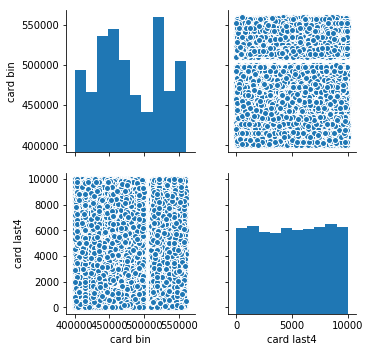

In [304]:
sns.pairplot(raw_dataset[['card bin',
 'card last4']])

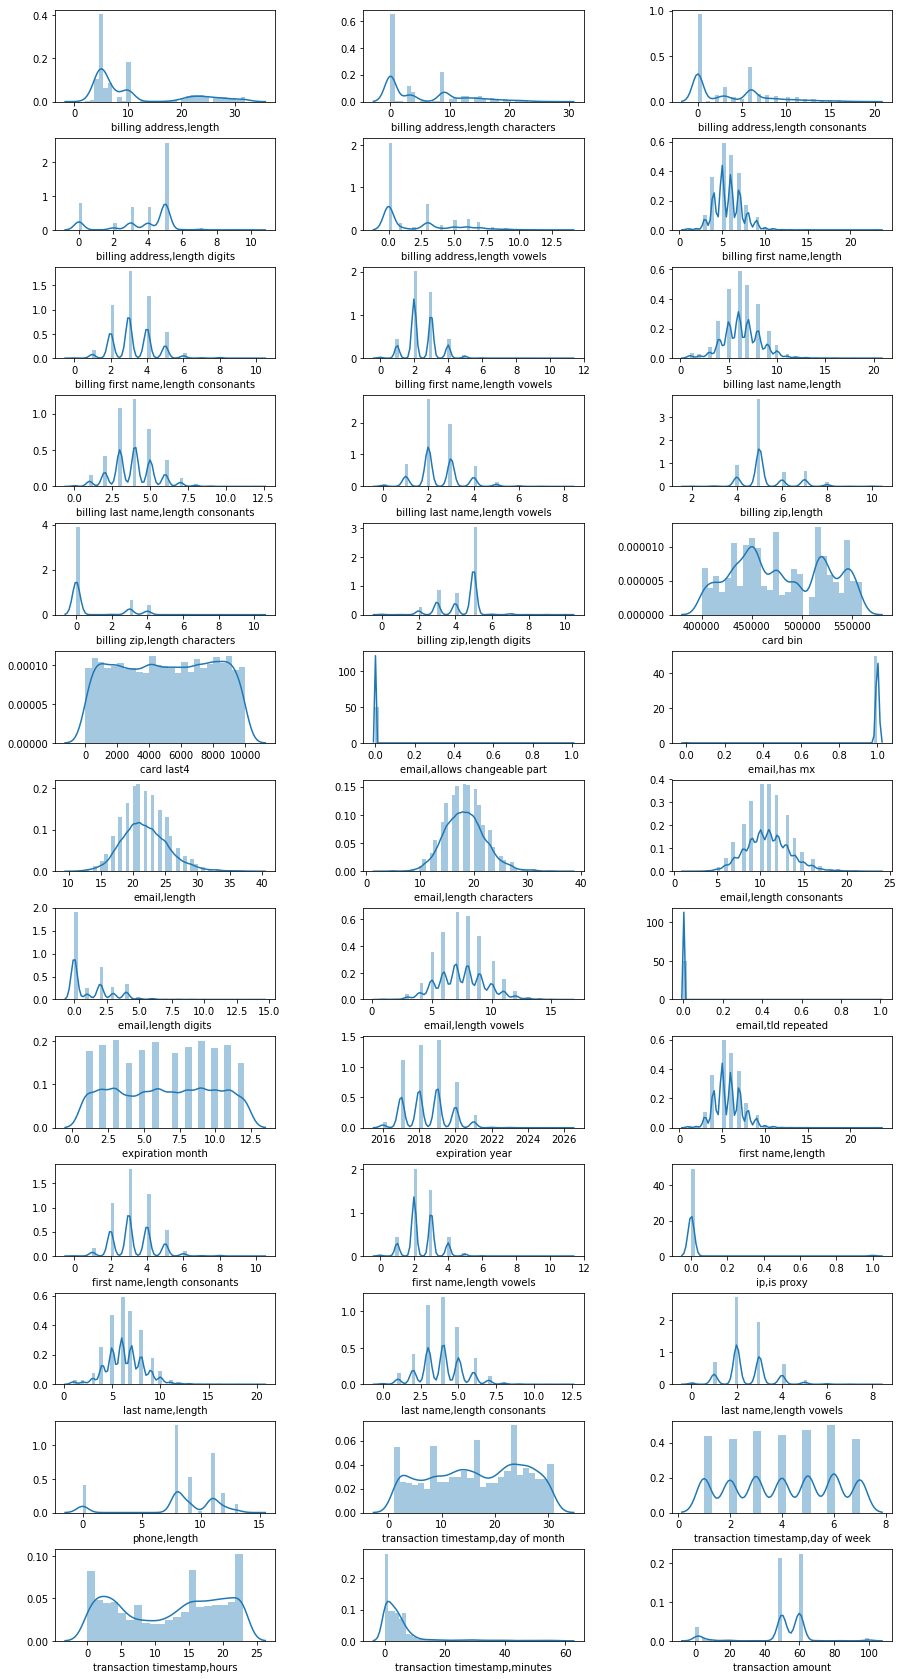

In [305]:
#checkout distribution of values for non-categorical features - define those which can be potentialy excluded from 
#model predictors
fig = plt.figure(figsize=(15, 30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(0, len(ready_features)):    
    j = i + 1
    ax = fig.add_subplot(13, 3, j)
    sns.distplot(raw_dataset[ready_features[i]])

In [359]:
def check_features_uniqueness(df, cols_list, uniqueness_depth):
    not_uniq_enough_cols = []
    cols_uniqueness_list = []
    uniq_vals = []
    uniq_vals_dist = []
    for col in cols_list:
        if df[col].nunique()<=uniqueness_depth:
            not_uniq_enough_cols.append(col)
            cols_uniqueness_list.append(df[col].nunique())
            uniq_vals.append(list(df[col].unique()))
            uniq_vals_dist.append(df[col].value_counts().to_dict())
    cols_uniqueness_dict = {'column_name':not_uniq_enough_cols, 'n_unique_values':cols_uniqueness_list, 
                      'unique_vals':uniq_vals, 'unique_vals_distribution':uniq_vals_dist}
    cols_uniqueness = pd.DataFrame(data=cols_uniqueness_dict)
    
    return cols_uniqueness

In [360]:
check_features_uniqueness(raw_dataset, ready_features, 2)

column_name  n_unique_values unique_vals  \
0  email,allows changeable part                2      [0, 1]   
1                  email,has mx                2      [1, 0]   
2            email,tld repeated                2      [0, 1]   
3                   ip,is proxy                2      [0, 1]   

  unique_vals_distribution  
0         {0: 16059, 1: 7}  
1        {0: 51, 1: 16015}  
2         {0: 16060, 1: 6}  
3       {0: 15835, 1: 231}

In [361]:
raw_dataset['transaction status'] = raw_dataset['transaction status'].apply(lambda x: 
                                                                            1 if x=='cb' else 0)

In [362]:
raw_dataset['transaction status'].value_counts()

0    12502
1     3564
Name: transaction status, dtype: int64

In [365]:
categorical_features.remove('transaction status')
ready_features.append('transaction status')

In [611]:
dataset = pd.DataFrame(raw_dataset[ready_features])

In [612]:
dataset.head()

billing address,length  billing address,length characters  \
0                       7                                  3   
1                       5                                  0   
2                       5                                  0   
3                       5                                  0   
4                       4                                  0   

   billing address,length consonants  billing address,length digits  \
0                                  3                              3   
1                                  0                              5   
2                                  0                              5   
3                                  0                              5   
4                                  0                              4   

   billing address,length vowels  billing first name,length  \
0                              0                          7   
1                              0                          8   
2                              0                          6   
3                              0                          8   
4                              0                          4   

   billing first name,length consonants  billing first name,length vowels  \
0                                     4                                 3   
1                                     4                                 4   
2                                     4                                 2   
3                                     4                                 4   
4                                     2                                 2   

   billing last name,length  billing last name,length consonants  \
0                         6                                    3   
1                         7                                    4   
2                         7                                    4   
3                         5                                    3   
4                         3                                    1   

   billing last name,length vowels  billing zip,length  \
0                                3                   7   
1                                3                   5   
2                                3                   5   
3                                2                   5   
4                                2                   4   

   billing zip,length characters  billing zip,length digits  card bin  \
0                              3                          3    551029   
1                              0                          5    469227   
2                              0                          5    475824   
3                              0                          5    517800   
4                              0                          4    535316   

   card last4  email,allows changeable part  email,has mx  email,length  \
0        2695                             0             1            20   
1        3704                             0             1            18   
2         776                             0             1            23   
3        5797                             0             1            20   
4        7749                             0             1            19   

   email,length characters  email,length consonants  email,length digits  \
0                       18                       11                    0   
1                       14                        8                    2   
2                       21                       13                    0   
3                       18                        8                    0   
4                       17                        8                    0   

   email,length vowels  email,tld repeated  expiration month  expiration year  \
0                    7                   0                11             2020   
1                    6                   0                 4             2018   
2

In [368]:
categorical_features_uniq = check_features_uniqueness(raw_dataset, categorical_features, len(raw_dataset))

In [369]:
categorical_features_uniq.sort_values('n_unique_values')

column_name  n_unique_values  \
9                    card bin,brand                2   
34                 transaction mode                3   
31                    ip,proxy type                3   
14                    card bin,type                3   
30             ip,proxy description                5   
4        billing country,time zones               20   
16               country,time zones               20   
27            ip,country time zones               21   
12      card bin,country time zones               24   
22     email,tld country time zones               25   
5   billing first name,first symbol               28   
23          first name,first symbol               28   
6    billing last name,first symbol               31   
33           last name,first symbol               31   
18               email,first symbol               36   
13                   card bin,level               36   
0      billing address,first symbol               37   
8          billing zip,first symbol               37   
20                email,tld country               41   
21      email,tld country languages               42   
19                        email,tld               47   
2                   billing country               47   
3         billing country,languages               47   
15                country,languages               47   
25                       ip,country               48   
26             ip,country languages               49   
10                 card bin,country               53   
11       card bin,country languages               54   
32                     ip,time zone               95   
17                     email.domain              731   
28                           ip,isp              900   
24                          ip.city             3995   
29                   ip,postal code             5995   
1                      billing city             7556   
7                       billing zip             8717   

                                          unique_vals  \
9                             [mastercard, visa, nan]   
34                               [cc, token, cascade]   
31                  [nan, hosting, corporate, public]   
14                 [debit, credit, nan, credit/debit]   
30  [nan, ?, web-browser, vpn, cloud, cloud-security]   
4   [[-210, -420, -180, -150, -360, -300, -240, -4...   
16  [[-210, -420, -180, -150, -360, -300, -240, -4...   
27  [[-210, -420, -180, -150, -360, -300, -240, -4...   
12  [[-210, -420, -180, -150, -360, -300, -240, -4...   
22  [[], [120, 60], [720, 825, 780, 765], [480], [...   
5   [r, p, m, g, a, c, j, s, n, t, i, l, y, b, d, ...   
23  [r, p, m, g, a, c, j, s, n, t, i, l, y, b, d, ...   
6   [m, l, r, t, a, g, c, p, e, b, s, u, v, f, h, ...   
33  [m, l, r, t, a, g, c, p, e, b, s, u, v, f, h, ...   
18  [x, m, g, a, c, j, p, k, w, s, r, q, b, l, d, ...   
13  [standard, classic, gold, nan, infinite, plati...   
0   [j, 4, 8, 3, f, 9, l, g, s, v, 2, 7, c, 6, m, ...   
8   [j, 4, 8, 3, 9, l, g, 2, 7, 6, m, 5, 0, b, 1, ...   
20  [nan, fra, nzl, sgp, can, nor, bel, aus, swe, ...   
21  [[], [br, eu, oc, frp, fr-FR, fr-fr, fr, co, c...   
19  [com, fr, net, nz, sg, ca, no, be, au, se, ch,...   
2   [can, usa, aus, gbr, mex, swe, nzl, fra, nor, ...   
3   [[en-CA, en-ca, en, fr-CA, fr-ca, fr, iu], [en...   
15  [[en-CA, en-ca, en, fr-CA, fr-ca, fr, iu], [en...   
25  [can, usa, aus, gbr, mex, swe, nzl, fra, nor, ...   
26  [[en-CA, en-ca, en, fr-CA, fr-ca, fr, iu], [en...   
10  [can, usa, aus, gbr, mex, swe, nzl, fra, nor, ...   
11  [[en-CA, en-ca, en, fr-CA, fr-ca, fr, iu], [en...   
32  [america/toronto, america/detroit, america/den...   
17  [hotmail.com, aol.com, yahoo.com, gmail.com, i...   
28  [bell canada, att internet services, qwest com...   
24  [l'assomption, warren, salt lake city, opa-loc...   
29  [j5w, 48092, 84121, 33055, 3141, 46060, j2r, 9...   
1   [j5x 3x3, 48093, 84037, 33055, 3220, fishers, ...   
7   [j5x 3x3

In [378]:
lang_categorical = [x for x in categorical_features_uniq.column_name if x.find('languages')!=-1]
symbol_categorical = [x for x in categorical_features_uniq.column_name if x.find('symbol')!=-1]
time_zones_categorical = [col for col in categorical_features if col.find('time zones')!=-1]
zip_categorical = ['ip,postal code', 'billing city', 'billing zip']

In [387]:
other_categorical = [x for x in categorical_features_uniq.column_name if x not in lang_categorical and 
                     x not in symbol_categorical and x not in time_zones_categorical and x not in zip_categorical]

In [390]:
def encode_simple_categorical(init_df, cols_list, fin_df):
    for col in cols_list:
        fin_df[col] = init_df[col].astype('category').cat.codes
        #to be consistent in nan values substitution - without that nan values are substituted by -1
        fin_df[col] = fin_df[col].apply(lambda x: x+1)
        
    return fin_df

In [613]:
dataset = encode_simple_categorical(raw_dataset, other_categorical, dataset)

In [614]:
dataset.head()

billing address,length  billing address,length characters  \
0                       7                                  3   
1                       5                                  0   
2                       5                                  0   
3                       5                                  0   
4                       4                                  0   

   billing address,length consonants  billing address,length digits  \
0                                  3                              3   
1                                  0                              5   
2                                  0                              5   
3                                  0                              5   
4                                  0                              4   

   billing address,length vowels  billing first name,length  \
0                              0                          7   
1                              0                          8   
2                              0                          6   
3                              0                          8   
4                              0                          4   

   billing first name,length consonants  billing first name,length vowels  \
0                                     4                                 3   
1                                     4                                 4   
2                                     4                                 2   
3                                     4                                 4   
4                                     2                                 2   

   billing last name,length  billing last name,length consonants  \
0                         6                                    3   
1                         7                                    4   
2                         7                                    4   
3                         5                                    3   
4                         3                                    1   

   billing last name,length vowels  billing zip,length  \
0                                3                   7   
1                                3                   5   
2                                3                   5   
3                                2                   5   
4                                2                   4   

   billing zip,length characters  billing zip,length digits  card bin  \
0                              3                          3    551029   
1                              0                          5    469227   
2                              0                          5    475824   
3                              0                          5    517800   
4                              0                          4    535316   

   card last4  email,allows changeable part  email,has mx  email,length  \
0        2695                             0             1            20   
1        3704                             0             1            18   
2         776                             0             1            23   
3        5797                             0             1            20   
4        7749                             0             1            19   

   email,length characters  email,length consonants  email,length digits  \
0                       18                       11                    0   
1                       14                        8                    2   
2                       21                       13                    0   
3                       18                        8                    0   
4                       17                        8                    0   

   email,length vowels  email,tld repeated  expiration month  expiration year  \
0                    7                   0                11             2020   
1                    6                   0                 4             2018   
2

In [594]:
raw_dataset[lang_categorical].head()

billing country,languages card bin,country languages  \
0         ['iu', 'en', 'fr']         ['iu', 'en', 'fr']   
1  ['en', 'haw', 'es', 'fr']  ['en', 'haw', 'es', 'fr']   
2  ['en', 'haw', 'es', 'fr']  ['en', 'haw', 'es', 'fr']   
3  ['en', 'haw', 'es', 'fr']  ['en', 'haw', 'es', 'fr']   
4                     ['en']                     ['en']   

           country,languages email,tld country languages  \
0         ['iu', 'en', 'fr']                      [none]   
1  ['en', 'haw', 'es', 'fr']                      [none]   
2  ['en', 'haw', 'es', 'fr']                      [none]   
3  ['en', 'haw', 'es', 'fr']                      [none]   
4                     ['en']                      [none]   

        ip,country languages  
0         ['iu', 'en', 'fr']  
1  ['en', 'haw', 'es', 'fr']  
2  ['en', 'haw', 'es', 'fr']  
3  ['en', 'haw', 'es', 'fr']  
4                     ['en']

In [469]:
def encode_language_abbrv(init_df, cols, fin_df):
    for col in cols:
        #converting string to list
        init_df[col] = init_df[col].apply(lambda x: None if x=='[]' 
                                                      else str(x).replace('[', '').replace(']', '').split(', ')
                                  ).apply(lambda x: list(set([n[:n.find('-')] if n.find('-')!=-1 
                                                                        else n for n in [st.lower() for st in x]])) 
                                                                        if x!=None 
                                                                        else x)
        res_col = col+' n_uniq'
        fin_df[res_col] = init_df[col].apply(lambda x: len(x) if x!=None else 0)

    return fin_df

In [615]:
dataset = encode_language_abbrv(raw_dataset, lang_categorical, dataset)

In [616]:
dataset.head()

billing address,length  billing address,length characters  \
0                       7                                  3   
1                       5                                  0   
2                       5                                  0   
3                       5                                  0   
4                       4                                  0   

   billing address,length consonants  billing address,length digits  \
0                                  3                              3   
1                                  0                              5   
2                                  0                              5   
3                                  0                              5   
4                                  0                              4   

   billing address,length vowels  billing first name,length  \
0                              0                          7   
1                              0                          8   
2                              0                          6   
3                              0                          8   
4                              0                          4   

   billing first name,length consonants  billing first name,length vowels  \
0                                     4                                 3   
1                                     4                                 4   
2                                     4                                 2   
3                                     4                                 4   
4                                     2                                 2   

   billing last name,length  billing last name,length consonants  \
0                         6                                    3   
1                         7                                    4   
2                         7                                    4   
3                         5                                    3   
4                         3                                    1   

   billing last name,length vowels  billing zip,length  \
0                                3                   7   
1                                3                   5   
2                                3                   5   
3                                2                   5   
4                                2                   4   

   billing zip,length characters  billing zip,length digits  card bin  \
0                              3                          3    551029   
1                              0                          5    469227   
2                              0                          5    475824   
3                              0                          5    517800   
4                              0                          4    535316   

   card last4  email,allows changeable part  email,has mx  email,length  \
0        2695                             0             1            20   
1        3704                             0             1            18   
2         776                             0             1            23   
3        5797                             0             1            20   
4        7749                             0             1            19   

   email,length characters  email,length consonants  email,length digits  \
0                       18                       11                    0   
1                       14                        8                    2   
2                       21                       13                    0   
3                       18                        8                    0   
4                       17                        8                    0   

   email,length vowels  email,tld repeated  expiration month  expiration year  \
0                    7                   0                11             2020   
1                    6                   0                 4             2018   
2

In [499]:
def encode_symbol_categorical(init_df, cols, fin_df):
    for col in cols:
        res_digit_col = col + '_is_digit'
        fin_df[res_digit_col] = init_df[col].apply(lambda x: 1 if str(x).isdigit() else 0)
        res_letter_col = col + '_is_letter'
        fin_df[res_letter_col] = init_df[col].apply(lambda x: 1 if str(x).isalpha() else 0)
        res_other_col = col + '_is_other_symb'
        fin_df[res_other_col] = init_df[col].apply(lambda x: 0 if str(x).isdigit() or str(x).isalpha()
                                                 else 1)
        
    return fin_df

In [618]:
dataset = encode_symbol_categorical(raw_dataset, symbol_categorical, dataset)

In [619]:
dataset.head()

billing address,length  billing address,length characters  \
0                       7                                  3   
1                       5                                  0   
2                       5                                  0   
3                       5                                  0   
4                       4                                  0   

   billing address,length consonants  billing address,length digits  \
0                                  3                              3   
1                                  0                              5   
2                                  0                              5   
3                                  0                              5   
4                                  0                              4   

   billing address,length vowels  billing first name,length  \
0                              0                          7   
1                              0                          8   
2                              0                          6   
3                              0                          8   
4                              0                          4   

   billing first name,length consonants  billing first name,length vowels  \
0                                     4                                 3   
1                                     4                                 4   
2                                     4                                 2   
3                                     4                                 4   
4                                     2                                 2   

   billing last name,length  billing last name,length consonants  \
0                         6                                    3   
1                         7                                    4   
2                         7                                    4   
3                         5                                    3   
4                         3                                    1   

   billing last name,length vowels  billing zip,length  \
0                                3                   7   
1                                3                   5   
2                                3                   5   
3                                2                   5   
4                                2                   4   

   billing zip,length characters  billing zip,length digits  card bin  \
0                              3                          3    551029   
1                              0                          5    469227   
2                              0                          5    475824   
3                              0                          5    517800   
4                              0                          4    535316   

   card last4  email,allows changeable part  email,has mx  email,length  \
0        2695                             0             1            20   
1        3704                             0             1            18   
2         776                             0             1            23   
3        5797                             0             1            20   
4        7749                             0             1            19   

   email,length characters  email,length consonants  email,length digits  \
0                       18                       11                    0   
1                       14                        8                    2   
2                       21                       13                    0   
3                       18                        8                    0   
4                       17                        8                    0   

   email,length vowels  email,tld repeated  expiration month  expiration year  \
0                    7                   0                11             2020   
1                    6                   0                 4             2018   
2

In [620]:
raw_dataset[zip_categorical].head()

ip,postal code billing city billing zip
0            j5w      j5x 3x3     j5x 3x3
1          48092        48093       48093
2          84121        84037       84037
3          33055        33055       33055
4           3141         3220        3220

In [529]:
def encode_zip_categorical(df, cols, fin_df):
    for col in cols:
        df[col] = df[col].apply(lambda x: str(x) if x!=None else x)
        res_all_digits = col + '_all_digits'
        fin_df[res_all_digits] = df[col].apply(lambda x: all([c.isdigit() or c == '/' for c in x])
                                              if x!=None else False).apply(lambda x: 1 if x==True else 0)
        res_all_letters = col + '_all_letters'
        fin_df[res_all_letters] = df[col].apply(lambda x: all([c.isalpha() or c == '/' for c in x])
                                               if x!=None else False).apply(lambda x: 1 if x==True else 0)
        res_some_digits = col + '_some_digits'
        fin_df[res_some_digits] = df[col].apply(lambda x: any([c.isdigit() or c == '/' for c in x])
                                               if x!=None else False).apply(lambda x: 1 if x==True else 0)
        res_some_letters = col + '_some_letters'
        fin_df[res_some_letters] = df[col].apply(lambda x: any([c.isalpha() or c == '/' for c in x])
                                                if x!=None else False).apply(lambda x: 1 if x==True else 0)
        res_lenght = col + '_length'
        fin_df[res_some_letters] = df[col].apply(lambda x: len(x) if x!=None else 0) 
        
    return fin_df

In [621]:
dataset = encode_zip_categorical(raw_dataset, zip_categorical, dataset)

In [622]:
dataset.head()

billing address,length  billing address,length characters  \
0                       7                                  3   
1                       5                                  0   
2                       5                                  0   
3                       5                                  0   
4                       4                                  0   

   billing address,length consonants  billing address,length digits  \
0                                  3                              3   
1                                  0                              5   
2                                  0                              5   
3                                  0                              5   
4                                  0                              4   

   billing address,length vowels  billing first name,length  \
0                              0                          7   
1                              0                          8   
2                              0                          6   
3                              0                          8   
4                              0                          4   

   billing first name,length consonants  billing first name,length vowels  \
0                                     4                                 3   
1                                     4                                 4   
2                                     4                                 2   
3                                     4                                 4   
4                                     2                                 2   

   billing last name,length  billing last name,length consonants  \
0                         6                                    3   
1                         7                                    4   
2                         7                                    4   
3                         5                                    3   
4                         3                                    1   

   billing last name,length vowels  billing zip,length  \
0                                3                   7   
1                                3                   5   
2                                3                   5   
3                                2                   5   
4                                2                   4   

   billing zip,length characters  billing zip,length digits  card bin  \
0                              3                          3    551029   
1                              0                          5    469227   
2                              0                          5    475824   
3                              0                          5    517800   
4                              0                          4    535316   

   card last4  email,allows changeable part  email,has mx  email,length  \
0        2695                             0             1            20   
1        3704                             0             1            18   
2         776                             0             1            23   
3        5797                             0             1            20   
4        7749                             0             1            19   

   email,length characters  email,length consonants  email,length digits  \
0                       18                       11                    0   
1                       14                        8                    2   
2                       21                       13                    0   
3                       18                        8                    0   
4                       17                        8                    0   

   email,length vowels  email,tld repeated  expiration month  expiration year  \
0                    7                   0                11             2020   
1                    6                   0                 4             2018   
2

In [230]:
raw_dataset[time_zones_categorical].head()

billing country,time zones  \
0  [-210, -420, -180, -150, -360, -300, -240, -480]   
1        [-420, -600, -360, -540, -300, -480, -240]   
2        [-420, -600, -360, -540, -300, -480, -240]   
3        [-420, -600, -360, -540, -300, -480, -240]   
4                    [480, 660, 630, 600, 570, 525]   

                        card bin,country time zones  \
0  [-210, -420, -180, -150, -360, -300, -240, -480]   
1        [-420, -600, -360, -540, -300, -480, -240]   
2        [-420, -600, -360, -540, -300, -480, -240]   
3        [-420, -600, -360, -540, -300, -480, -240]   
4                    [480, 660, 630, 600, 570, 525]   

                                 country,time zones  \
0  [-210, -420, -180, -150, -360, -300, -240, -480]   
1        [-420, -600, -360, -540, -300, -480, -240]   
2        [-420, -600, -360, -540, -300, -480, -240]   
3        [-420, -600, -360, -540, -300, -480, -240]   
4                    [480, 660, 630, 600, 570, 525]   

  email,tld country time zones  \
0                           []   
1                           []   
2                           []   
3                           []   
4                           []   

                              ip,country time zones  
0  [-210, -420, -180, -150, -360, -300, -240, -480]  
1        [-420, -600, -360, -540, -300, -480, -240]  
2        [-420, -600, -360, -540, -300, -480, -240]  
3        [-420, -600, -360, -540, -300, -480, -240]  
4                    [480, 660, 630, 600, 570, 525]

In [538]:
#convert string values to lists
for col in time_zones_categorical:
    raw_dataset[col] = raw_dataset[col].apply(lambda x: None if x=='[]' 
                                                      else x.replace('[', '').replace(']', '').split(', '))
    raw_dataset[col] = raw_dataset[col].apply(lambda x: x if x==None else [int(n) for n in x])

In [681]:
def encode_time_zones_categorical(df, col_names, fin_df):
    fin_df = pd.DataFrame()
    for col in col_names:
        max_decompositions = max(df[col].apply(lambda x: len(x) if x!=None else 0))
        res_len = col + '_length'
        fin_df[res_len] = df[col].apply(lambda x: len(x) if x!=None else 0)
        for i in range(0, max_decompositions):
            res_col = col + ' ' + str(i)
            fin_df[res_col] = df[col].apply(lambda x: x[i] if x!=None and len(x)>i else None)
        
    return fin_df

In [682]:
timezones_dataset = encode_time_zones_categorical(raw_dataset, time_zones_categorical, dataset)
#it's also possible to transform several resulting columns corresponding to one initial by reducing dimensionality
#for example using pca

In [626]:
timezones_dataset.shape, dataset.shape

((16066, 48), (16066, 93))

In [629]:
dataset = pd.concat([
    dataset, 
    timezones_dataset
], axis=1).fillna(0)

In [693]:
dataset = dataset.drop(['card bin'], axis=1)

In [694]:
dataset.head()

billing address,length  billing address,length characters  \
0                       7                                  3   
1                       5                                  0   
2                       5                                  0   
3                       5                                  0   
4                       4                                  0   

   billing address,length consonants  billing address,length digits  \
0                                  3                              3   
1                                  0                              5   
2                                  0                              5   
3                                  0                              5   
4                                  0                              4   

   billing address,length vowels  billing first name,length  \
0                              0                          7   
1                              0                          8   
2                              0                          6   
3                              0                          8   
4                              0                          4   

   billing first name,length consonants  billing first name,length vowels  \
0                                     4                                 3   
1                                     4                                 4   
2                                     4                                 2   
3                                     4                                 4   
4                                     2                                 2   

   billing last name,length  billing last name,length consonants  \
0                         6                                    3   
1                         7                                    4   
2                         7                                    4   
3                         5                                    3   
4                         3                                    1   

   billing last name,length vowels  billing zip,length  \
0                                3                   7   
1                                3                   5   
2                                3                   5   
3                                2                   5   
4                                2                   4   

   billing zip,length characters  billing zip,length digits  card last4  \
0                              3                          3        2695   
1                              0                          5        3704   
2                              0                          5         776   
3                              0                          5        5797   
4                              0                          4        7749   

   email,allows changeable part  email,has mx  email,length  \
0                             0             1            20   
1                             0             1            18   
2                             0             1            23   
3                             0             1            20   
4                             0             1            19   

   email,length characters  email,length consonants  email,length digits  \
0                       18                       11                    0   
1                       14                        8                    2   
2                       21                       13                    0   
3                       18                        8                    0   
4                       17                        8                    0   

   email,length vowels  email,tld repeated  expiration month  expiration year  \
0                    7                   0                11             2020   
1                    6                   0                 4             2018   
2                    8                   0                 8 

## Features Selection

In [637]:
import pandas_profiling as pp

/opt/conda/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [695]:
target = 'transaction status'
predictors = dataset.drop([target], axis=1).columns

In [697]:
profile = pp.ProfileReport(dataset[predictors])

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [698]:
profile.to_file(outputfile = "dataset_profile.html")

In [699]:
profile

In [700]:
len(profile.get_rejected_variables(threshold=0.9)), len(predictors)

(63, 139)

In [701]:
rejected_predictors = profile.get_rejected_variables(threshold=0.9)
rejected_predictors.append('billing first name,first symbol_is_other_symb')
rejected_predictors.append('email,tld country time zones 4')

In [702]:
new_predictors = [x for x in predictors if x not in rejected_predictors]

In [703]:
len(new_predictors)

74

## Modelling

In [716]:
from sklearn.ensemble import GradientBoostingClassifier 
from scipy.stats import randint
from sklearn.utils import resample
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import pickle

In [705]:
def output_metrics(model, train, test, predictors, target):
    print('Gini:        ', 2*roc_auc_score(test[target], model.predict(test[predictors]))-1)
    print('Gini (train):', 2*roc_auc_score(train[target], model.predict(train[predictors]))-1)
    print('AUC:         ', roc_auc_score(test[target], model.predict(test[predictors])))
    print('AUC (train):', roc_auc_score(train[target], model.predict(train[predictors])))   
    
def full_metrics(model, train, test, validate, predictors, target):
    print('Gini (test):    ', 2*roc_auc_score(test[target], model.predict(test[predictors]))-1)
    print('Gini (train):   ', 2*roc_auc_score(train[target], model.predict(train[predictors]))-1)
    print('Gini (validate):', 2*roc_auc_score(validate[target], model.predict(validate[predictors]))-1)
    print('AUC (test):    ', roc_auc_score(test[target], model.predict(test[predictors])))
    print('AUC (train):   ', roc_auc_score(train[target], model.predict(train[predictors])))
    print('AUC (validate):', roc_auc_score(validate[target], model.predict(validate[predictors])))      
    

def save_to_pickle(model, pickle_name):
    model_pkl_filename = pickle_name
    model_pkl = open(model_pkl_filename, 'wb')
    pickle.dump(model, model_pkl)
    model_pkl.close()   

In [706]:
predictors = new_predictors

In [707]:
divide = np.random.rand(len(dataset)) < 0.8 
train, test = dataset[divide], dataset[~divide]
divide = np.random.rand(len(train)) < 0.8
train, validate = train[divide], train[~divide]

In [708]:
train.shape, validate.shape, test.shape

((10361, 140), (2510, 140), (3195, 140))

In [709]:
train[target].value_counts() 

0    8064
1    2297
Name: transaction status, dtype: int64

In [710]:
test[target].value_counts()

0    2500
1     695
Name: transaction status, dtype: int64

In [711]:
validate[target].value_counts()

0    1938
1     572
Name: transaction status, dtype: int64

In [712]:
from sklearn.dummy import DummyClassifier

In [713]:
#creating dummy classifier just to check out potential metrics values
dummy_clf = DummyClassifier(strategy='stratified',random_state=0).fit(train[predictors], train[target])

In [714]:
output_metrics(dummy_clf, train, validate, predictors, target)

Gini:         -0.0277681554771
Gini (train): 0.0107984081203
AUC:          0.486115922261
AUC (train): 0.50539920406


In [723]:
#GradientBoostingClassifier analogue of GBM in h2o
base_mdl = GradientBoostingClassifier(learning_rate=0.1).fit(train[predictors], train[target])
output_metrics(base_mdl, train, validate, predictors, target)

Gini:         0.166053245001
Gini (train): 0.19884437776
AUC:          0.5830266225
AUC (train): 0.59942218888


In [725]:
len([x for x in base_mdl.feature_importances_ if x!=0])

50

In [747]:
base_mdl_2 = GradientBoostingClassifier(learning_rate=0.01).fit(train[predictors], train[target])
output_metrics(base_mdl_2, train, validate, predictors, target)

Gini:         0.120513903022
Gini (train): 0.127689627948
AUC:          0.560256951511
AUC (train): 0.563844813974


In [748]:
len([x for x in base_mdl_2.feature_importances_ if x!=0])

13

In [762]:
#searching for the optimal value for max-depth
grid_1 = GridSearchCV(estimator=GradientBoostingClassifier(
    learning_rate=0.1,
    verbose=1, 
    ),
    param_grid={'max_depth':range(2, 8)}, verbose=1, cv=5, scoring='roc_auc')

grid_1.fit(train[predictors], train[target])

print(grid_1.grid_scores_)
print(grid_1.best_score_)
print(grid_1.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
      Iter       Train Loss   Remaining Time 
         1           1.0492            1.98s
         2           1.0418            1.76s
         3           1.0354            1.71s
         4           1.0299            1.65s
         5           1.0250            1.63s
         6           1.0208            1.61s
         7           1.0170            1.58s
         8           1.0136            1.58s
         9           1.0104            1.59s
        10           1.0075            1.58s
        20           0.9875            1.44s
        30           0.9746            1.45s
        40           0.9677            1.32s
        50           0.9616            1.02s
        60           0.9568            0.80s
        70           0.9528            0.59s
        80           0.9486            0.38s
        90           0.9436            0.19s
       100           0.9392            0.00s
      Iter       Train Loss   Remaining

         5           0.9535            2.64s
         6           0.9426            2.57s
         7           0.9334            2.49s
         8           0.9254            2.44s
         9           0.9180            2.38s
        10           0.9121            2.37s
        20           0.8683            2.14s
        30           0.8451            1.89s
        40           0.8302            1.75s
        50           0.8168            1.46s
        60           0.8062            1.21s
        70           0.7977            0.89s
        80           0.7910            0.58s
        90           0.7838            0.28s
       100           0.7765            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.0412            7.05s
         2           1.0281            6.94s
         3           1.0175            7.02s
         4           1.0082            6.61s
         5           1.0011            6.07s
         6           0.9941            5.76s
         

        10           0.8762            5.52s
        20           0.8262            4.83s
        30           0.7909            4.26s
        40           0.7667            3.57s
        50           0.7411            2.96s
        60           0.7195            2.33s
        70           0.7006            1.75s
        80           0.6821            1.15s
        90           0.6625            0.59s
       100           0.6434            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.0137            6.42s
         2           0.9820            8.12s
         3           0.9579            8.63s
         4           0.9381            9.18s
         5           0.9218            8.76s
         6           0.9072            8.24s
         7           0.8942            7.84s
         8           0.8829            7.65s
         9           0.8717            7.39s
        10           0.8626            7.17s
        20           0.8073            5.52s
        3

        30           0.6454            9.84s
        40           0.5951            8.19s
        50           0.5564            6.58s
        60           0.5290            5.04s
        70           0.4994            3.76s
        80           0.4703            2.48s
        90           0.4380            1.25s
       100           0.4155            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.0085           10.67s
         2           0.9728           11.63s
         3           0.9449           12.58s
         4           0.9226           13.67s
         5           0.9008           14.74s
         6           0.8826           15.12s
         7           0.8677           14.30s
         8           0.8536           14.09s
         9           0.8412           14.25s
        10           0.8297           13.87s
        20           0.7482           11.68s
        30           0.6922            9.58s
        40           0.6386            7.98s
        5

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.0min finished


         5           0.9859            1.69s
         6           0.9781            1.67s
         7           0.9719            1.66s
         8           0.9655            1.71s
         9           0.9601            1.68s
        10           0.9553            1.71s
        20           0.9253            1.54s
        30           0.9099            1.39s
        40           0.9008            1.18s
        50           0.8940            0.98s
        60           0.8885            0.78s
        70           0.8840            0.58s
        80           0.8788            0.39s
        90           0.8754            0.19s
       100           0.8716            0.00s
[mean: 0.55512, std: 0.05760, params: {'max_depth': 2}, mean: 0.54579, std: 0.05777, params: {'max_depth': 3}, mean: 0.51446, std: 0.08826, params: {'max_depth': 4}, mean: 0.53921, std: 0.06376, params: {'max_depth': 5}, mean: 0.53802, std: 0.06285, params: {'max_depth': 6}, mean: 0.54611, std: 0.08605, params: {'max_depth'

/home/marianna/.local/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [763]:
grid_1.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=1,
              warm_start=False)

In [764]:
grid_scores = pd.DataFrame(grid_1.grid_scores_)

/home/marianna/.local/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [765]:
grid_scores.head()

parameters  mean_validation_score  \
0  {'max_depth': 2}               0.555121   
1  {'max_depth': 3}               0.545786   
2  {'max_depth': 4}               0.514459   
3  {'max_depth': 5}               0.539214   
4  {'max_depth': 6}               0.538017   

                                cv_validation_scores  
0  [0.451187363541, 0.569674384754, 0.57385121162...  
1  [0.445819294321, 0.546285614167, 0.56335709182...  
2  [0.421937248982, 0.416093425699, 0.57955851624...  
3  [0.476979163859, 0.486782662605, 0.57753249402...  
4  [0.484325723065, 0.500774953503, 0.55408061137...

In [766]:
#difference between the biggest score on fold and minimum score on fold - shows the difference between folds
#if model overfits the difference is noticeable
grid_scores['cv_smooth'] = grid_scores.cv_validation_scores.apply(lambda x: max(x)-min(x))

In [767]:
train_list, validate_list = [], []

for i in range(0, len(grid_scores)):
    tmp_mdl = GradientBoostingClassifier(learning_rate=0.1, max_depth=grid_scores.parameters[i].get('max_depth')
                                 ).fit(train[predictors], train[target])
    train_list.append(roc_auc_score(train[target], tmp_mdl.predict_proba(train[predictors])[:, 1]))
    validate_list.append(roc_auc_score(validate[target], tmp_mdl.predict_proba(validate[predictors])[:, 1]))
    
grid_scores['auc_train'], grid_scores['auc_validate'] = train_list, validate_list
grid_scores['gini_train'] = grid_scores.auc_train.apply(lambda x: 2*x-1)
grid_scores['gini_validate'] = grid_scores.auc_validate.apply(lambda x: 2*x-1)

In [768]:
grid_scores.head()

parameters  mean_validation_score  \
0  {'max_depth': 2}               0.555121   
1  {'max_depth': 3}               0.545786   
2  {'max_depth': 4}               0.514459   
3  {'max_depth': 5}               0.539214   
4  {'max_depth': 6}               0.538017   

                                cv_validation_scores  cv_smooth  auc_train  \
0  [0.451187363541, 0.569674384754, 0.57385121162...   0.176190   0.761283   
1  [0.445819294321, 0.546285614167, 0.56335709182...   0.179854   0.803175   
2  [0.421937248982, 0.416093425699, 0.57955851624...   0.226684   0.851186   
3  [0.476979163859, 0.486782662605, 0.57753249402...   0.168688   0.905372   
4  [0.484325723065, 0.500774953503, 0.55408061137...   0.169934   0.946079   

   auc_validate  gini_train  gini_validate  
0      0.749493    0.522566       0.498985  
1      0.761644    0.606350       0.523288  
2      0.771549    0.702372       0.543098  
3      0.776556    0.810743       0.553111  
4      0.782971    0.892159       0.565941

In [ ]:
grid_2 = GridSearchCV(estimator=GradientBoostingClassifier(
    learning_rate=0.1,
    verbose=1, 
    ),
    param_grid={'max_depth':[2, 5], 'n_estimators':range(91, 997, 21)}, verbose=1, cv=5, scoring='roc_auc')

grid_2.fit(train[predictors], train[target])

print(grid_2.grid_scores_)
print(grid_2.best_score_)
print(grid_2.best_estimator_)

Fitting 5 folds for each of 88 candidates, totalling 440 fits
      Iter       Train Loss   Remaining Time 
         1           1.0492            2.43s
         2           1.0418            2.39s
         3           1.0354            2.36s
         4           1.0299            2.32s
         5           1.0250            2.29s
         6           1.0208            2.15s
         7           1.0170            2.01s
         8           1.0136            1.89s
         9           1.0104            1.84s
        10           1.0075            1.75s
        20           0.9875            1.38s
        30           0.9746            1.14s
        40           0.9677            0.95s
        50           0.9616            0.74s
        60           0.9568            0.58s
        70           0.9528            0.38s
        80           0.9486            0.20s
        90           0.9436            0.02s
      Iter       Train Loss   Remaining Time 
         1           1.0265         

        20           0.8927            1.74s
        30           0.8721            1.52s
        40           0.8614            1.28s
        50           0.8522            1.07s
        60           0.8450            0.89s
        70           0.8387            0.71s
        80           0.8336            0.53s
        90           0.8283            0.37s
       100           0.8239            0.21s
      Iter       Train Loss   Remaining Time 
         1           1.0492            3.07s
         2           1.0418            2.68s
         3           1.0354            2.73s
         4           1.0299            2.73s
         5           1.0250            2.73s
         6           1.0208            2.73s
         7           1.0170            2.75s
         8           1.0136            2.74s
         9           1.0104            2.85s
        10           1.0075            2.83s
        20           0.9875            2.54s
        30           0.9746            2.12s
        4

        40           0.8761            1.80s
        50           0.8684            1.61s
        60           0.8620            1.47s
        70           0.8568            1.30s
        80           0.8515            1.15s
        90           0.8472            0.99s
       100           0.8432            0.82s
      Iter       Train Loss   Remaining Time 
         1           1.0284            2.29s
         2           1.0078            2.22s
         3           0.9911            2.17s
         4           0.9779            2.17s
         5           0.9668            2.15s
         6           0.9573            2.13s
         7           0.9496            2.11s
         8           0.9424            2.08s
         9           0.9369            2.07s
        10           0.9312            2.05s
        20           0.8927            2.08s
        30           0.8721            1.97s
        40           0.8614            1.80s
        50           0.8522            1.64s
        6

        60           0.8491            2.16s
        70           0.8439            1.99s
        80           0.8392            1.83s
        90           0.8349            1.65s
       100           0.8312            1.48s
      Iter       Train Loss   Remaining Time 
         1           1.0306            2.86s
         2           1.0113            2.82s
         3           0.9966            2.78s
         4           0.9849            2.76s
         5           0.9743            2.75s
         6           0.9653            2.74s
         7           0.9583            2.71s
         8           0.9519            2.69s
         9           0.9461            2.67s
        10           0.9414            2.65s
        20           0.9067            2.70s
        30           0.8886            2.62s
        40           0.8761            2.48s
        50           0.8684            2.27s
        60           0.8620            2.14s
        70           0.8568            1.96s
        8

        20           0.8932            3.32s
        30           0.8746            3.22s
        40           0.8622            3.12s
        50           0.8535            3.01s
        60           0.8465            2.99s
        70           0.8407            2.89s
        80           0.8359            2.78s
        90           0.8306            2.71s
       100           0.8258            2.59s
       200           0.7908            0.64s
      Iter       Train Loss   Remaining Time 
         1           1.0292            3.40s
         2           1.0090            3.34s
         3           0.9934            3.32s
         4           0.9800            3.31s
         5           0.9697            3.29s
         6           0.9604            3.27s
         7           0.9525            3.25s
         8           0.9457            3.55s
         9           0.9395            3.78s
        10           0.9330            4.11s
        20           0.8973            4.10s
        3

        20           0.9875            4.25s
        30           0.9746            4.15s
        40           0.9677            3.96s
        50           0.9616            3.69s
        60           0.9568            3.44s
        70           0.9528            3.25s
        80           0.9486            3.07s
        90           0.9436            2.91s
       100           0.9392            2.74s
       200           0.9074            1.19s
      Iter       Train Loss   Remaining Time 
         1           1.0265            7.23s
         2           1.0042            7.04s
         3           0.9872            7.00s
         4           0.9737            6.96s
         5           0.9620            6.93s
         6           0.9529            6.90s
         7           0.9450            6.89s
         8           0.9383            6.60s
         9           0.9326            6.28s
        10           0.9274            6.03s
        20           0.8932            4.95s
        3

         6           0.9573            4.23s
         7           0.9496            4.21s
         8           0.9424            4.22s
         9           0.9369            4.22s
        10           0.9312            4.19s
        20           0.8927            4.40s
        30           0.8721            4.32s
        40           0.8614            4.13s
        50           0.8522            3.99s
        60           0.8450            3.87s
        70           0.8387            3.85s
        80           0.8336            3.94s
        90           0.8283            3.88s
       100           0.8239            3.61s
       200           0.7896            1.74s
       300           0.7641            0.02s
      Iter       Train Loss   Remaining Time 
         1           1.0492            4.96s
         2           1.0418            4.85s
         3           1.0354            4.80s
         4           1.0299            4.74s
         5           1.0250            4.71s
         

        30           0.8777            5.26s
        40           0.8648            5.18s
        50           0.8559            4.92s
        60           0.8491            4.72s
        70           0.8439            4.49s
        80           0.8392            4.31s
        90           0.8349            4.11s
       100           0.8312            3.93s
       200           0.7982            2.27s
       300           0.7721            0.69s
      Iter       Train Loss   Remaining Time 
         1           1.0306            5.12s
         2           1.0113            5.17s
         3           0.9966            5.09s
         4           0.9849            5.11s
         5           0.9743            5.06s
         6           0.9653            5.02s
         7           0.9583            4.98s
         8           0.9519            5.17s
         9           0.9461            5.48s
        10           0.9414            5.73s
        20           0.9067            7.27s
        3

        90           0.9436            4.93s
       100           0.9392            4.70s
       200           0.9074            3.00s
       300           0.8815            1.34s
      Iter       Train Loss   Remaining Time 
         1           1.0265            5.63s
         2           1.0042            5.53s
         3           0.9872            5.44s
         4           0.9737            5.40s
         5           0.9620            5.37s
         6           0.9529            5.34s
         7           0.9450            5.34s
         8           0.9383            5.37s
         9           0.9326            5.35s
        10           0.9274            5.35s
        20           0.8932            5.57s
        30           0.8746            5.51s
        40           0.8622            5.47s
        50           0.8535            5.39s
        60           0.8465            5.21s
        70           0.8407            5.02s
        80           0.8359            4.82s
        9

       300           0.7864            1.71s
       400           0.7653            0.10s
      Iter       Train Loss   Remaining Time 
         1           1.0284            5.83s
         2           1.0078            5.78s
         3           0.9911            5.76s
         4           0.9779            5.75s
         5           0.9668            5.72s
         6           0.9573            5.70s
         7           0.9496            5.68s
         8           0.9424            5.66s
         9           0.9369            5.64s
        10           0.9312            5.62s
        20           0.8927            6.00s
        30           0.8721            5.97s
        40           0.8614            5.75s
        50           0.8522            5.60s
        60           0.8450            5.46s
        70           0.8387            5.29s
        80           0.8336            5.37s
        90           0.8283            5.49s
       100           0.8239            5.21s
       20

       100           0.8258            6.02s
       200           0.7908            4.17s
       300           0.7625            2.49s
       400           0.7386            0.82s
      Iter       Train Loss   Remaining Time 
         1           1.0292            7.01s
         2           1.0090            6.67s
         3           0.9934            6.59s
         4           0.9800            6.49s
         5           0.9697            6.42s
         6           0.9604            6.39s
         7           0.9525            6.39s
         8           0.9457            6.35s
         9           0.9395            6.32s
        10           0.9330            6.90s
        20           0.8973            7.67s
        30           0.8777            7.24s
        40           0.8648            6.95s
        50           0.8559            6.64s
        60           0.8491            6.71s
        70           0.8439            6.41s
        80           0.8392            6.18s
        9

        80           0.8336            6.18s
        90           0.8283            5.99s
       100           0.8239            5.76s
       200           0.7896            4.18s
       300           0.7641            2.67s
       400           0.7415            1.10s
      Iter       Train Loss   Remaining Time 
         1           1.0492            7.36s
         2           1.0418            7.31s
         3           1.0354            7.32s
         4           1.0299            7.40s
         5           1.0250            7.33s
         6           1.0208            7.32s
         7           1.0170            7.25s
         8           1.0136            7.22s
         9           1.0104            7.44s
        10           1.0075            7.39s
        20           0.9875            7.59s
        30           0.9746            7.56s
        40           0.9677            7.35s
        50           0.9616            7.00s
        60           0.9568            6.66s
        7

        40           0.8648            7.48s
        50           0.8559            7.77s
        60           0.8491            7.67s
        70           0.8439            7.37s
        80           0.8392            7.16s
        90           0.8349            6.87s
       100           0.8312            6.64s
       200           0.7982            5.09s
       300           0.7721            3.42s
       400           0.7505            1.82s
       500           0.7319            0.18s
      Iter       Train Loss   Remaining Time 
         1           1.0306            7.37s
         2           1.0113            7.33s
         3           0.9966            7.21s
         4           0.9849            7.15s
         5           0.9743            7.13s
         6           0.9653            7.11s
         7           0.9583            7.07s
         8           0.9519            7.07s
         9           0.9461            7.05s
        10           0.9414            7.02s
        2

        20           0.9875            8.61s
        30           0.9746            8.57s
        40           0.9677            9.14s
        50           0.9616            9.57s
        60           0.9568            8.96s
        70           0.9528            8.53s
        80           0.9486            8.17s
        90           0.9436            7.88s
       100           0.9392            7.60s
       200           0.9074            6.03s
       300           0.8815            4.29s
       400           0.8595            2.55s
       500           0.8389            0.88s
      Iter       Train Loss   Remaining Time 
         1           1.0265            9.49s
         2           1.0042            9.99s
         3           0.9872            9.71s
         4           0.9737            9.57s
         5           0.9620            9.43s
         6           0.9529            9.35s
         7           0.9450            9.35s
         8           0.9383            9.29s
         

        20           0.9067           11.65s
        30           0.8886           11.06s
        40           0.8761           10.35s
        50           0.8684            9.63s
        60           0.8620            9.30s
        70           0.8568            8.86s
        80           0.8515            8.93s
        90           0.8472            8.71s
       100           0.8432            8.61s
       200           0.8103            6.34s
       300           0.7864            4.48s
       400           0.7653            2.92s
       500           0.7470            1.21s
      Iter       Train Loss   Remaining Time 
         1           1.0284            8.32s
         2           1.0078            8.13s
         3           0.9911            8.05s
         4           0.9779            8.05s
         5           0.9668            8.03s
         6           0.9573            8.02s
         7           0.9496            8.03s
         8           0.9424            7.98s
         

      Iter       Train Loss   Remaining Time 
         1           1.0265           12.24s
         2           1.0042           12.18s
         3           0.9872           11.59s
         4           0.9737           11.19s
         5           0.9620           11.36s
         6           0.9529           11.45s
         7           0.9450           11.07s
         8           0.9383           10.75s
         9           0.9326           10.49s
        10           0.9274           10.28s
        20           0.8932           10.01s
        30           0.8746           11.52s
        40           0.8622           12.44s
        50           0.8535           11.72s
        60           0.8465           11.05s
        70           0.8407           10.49s
        80           0.8359           10.05s
        90           0.8306           10.20s
       100           0.8258            9.76s
       200           0.7908            7.33s
       300           0.7625            5.47s
       40

        20           0.9067           12.44s
        30           0.8886           13.86s
        40           0.8761           12.74s
        50           0.8684           12.29s
        60           0.8620           12.20s
        70           0.8568           11.93s
        80           0.8515           11.30s
        90           0.8472           10.79s
       100           0.8432           10.27s
       200           0.8103            7.35s
       300           0.7864            5.61s
       400           0.7653            3.96s
       500           0.7470            2.30s
       600           0.7294            0.62s
      Iter       Train Loss   Remaining Time 
         1           1.0284           13.67s
         2           1.0078           13.62s
         3           0.9911           13.61s
         4           0.9779           14.23s
         5           0.9668           14.46s
         6           0.9573           14.68s
         7           0.9496           14.79s
         

       100           0.9392            9.28s
       200           0.9074            7.35s
       300           0.8815            5.76s
       400           0.8595            4.41s
       500           0.8389            2.90s
       600           0.8223            1.29s
      Iter       Train Loss   Remaining Time 
         1           1.0265            9.66s
         2           1.0042            9.56s
         3           0.9872            9.64s
         4           0.9737            9.56s
         5           0.9620            9.49s
         6           0.9529            9.47s
         7           0.9450            9.45s
         8           0.9383            9.45s
         9           0.9326            9.44s
        10           0.9274           10.06s
        20           0.8932           13.66s
        30           0.8746           12.43s
        40           0.8622           11.84s
        50           0.8535           11.47s
        60           0.8465           11.08s
        7

       600           0.7154            1.60s
       700           0.6995            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.0306           10.06s
         2           1.0113            9.98s
         3           0.9966           10.17s
         4           0.9849           10.20s
         5           0.9743           10.12s
         6           0.9653           10.03s
         7           0.9583            9.95s
         8           0.9519            9.89s
         9           0.9461            9.85s
        10           0.9414            9.81s
        20           0.9067           11.11s
        30           0.8886           12.94s
        40           0.8761           12.78s
        50           0.8684           12.20s
        60           0.8620           12.05s
        70           0.8568           11.50s
        80           0.8515           11.08s
        90           0.8472           11.20s
       100           0.8432           11.46s
       20

       600           0.7052            1.91s
       700           0.6897            0.33s
      Iter       Train Loss   Remaining Time 
         1           1.0492           11.15s
         2           1.0418           11.03s
         3           1.0354           11.00s
         4           1.0299           10.93s
         5           1.0250           10.94s
         6           1.0208           10.89s
         7           1.0170           10.85s
         8           1.0136           10.86s
         9           1.0104           11.19s
        10           1.0075           11.13s
        20           0.9875           11.63s
        30           0.9746           11.65s
        40           0.9677           11.44s
        50           0.9616           11.02s
        60           0.9568           10.58s
        70           0.9528           10.32s
        80           0.9486           10.08s
        90           0.9436           10.47s
       100           0.9392           10.54s
       20

       600           0.7023            2.73s
       700           0.6854            1.05s
      Iter       Train Loss   Remaining Time 
         1           1.0292           11.21s
         2           1.0090           10.96s
         3           0.9934           10.91s
         4           0.9800           10.87s
         5           0.9697           10.77s
         6           0.9604           10.70s
         7           0.9525           10.68s
         8           0.9457           10.67s
         9           0.9395           10.66s
        10           0.9330           10.98s
        20           0.8973           10.86s
        30           0.8777           10.94s
        40           0.8648           11.79s
        50           0.8559           12.62s
        60           0.8491           13.71s
        70           0.8439           14.23s
        80           0.8392           14.27s
        90           0.8349           14.12s
       100           0.8312           13.95s
       20

       600           0.7294            3.09s
       700           0.7124            1.40s
      Iter       Train Loss   Remaining Time 
         1           1.0284           12.51s
         2           1.0078           12.10s
         3           0.9911           12.00s
         4           0.9779           11.90s
         5           0.9668           11.82s
         6           0.9573           11.67s
         7           0.9496           11.57s
         8           0.9424           11.48s
         9           0.9369           11.43s
        10           0.9312           11.37s
        20           0.8927           12.12s
        30           0.8721           12.13s
        40           0.8614           11.82s
        50           0.8522           11.67s
        60           0.8450           11.56s
        70           0.8387           11.36s
        80           0.8336           11.18s
        90           0.8283           10.97s
       100           0.8239           10.71s
       20

       100           0.9392           11.83s
       200           0.9074            9.65s
       300           0.8815            8.24s
       400           0.8595            6.78s
       500           0.8389            5.21s
       600           0.8223            3.69s
       700           0.8063            2.04s
       800           0.7898            0.43s
      Iter       Train Loss   Remaining Time 
         1           1.0265           12.32s
         2           1.0042           11.81s
         3           0.9872           11.62s
         4           0.9737           11.58s
         5           0.9620           11.55s
         6           0.9529           11.53s
         7           0.9450           11.50s
         8           0.9383           11.52s
         9           0.9326           11.49s
        10           0.9274           11.49s
        20           0.8932           12.20s
        30           0.8746           12.25s
        40           0.8622           12.32s
        5

        30           0.8777           16.36s
        40           0.8648           15.41s
        50           0.8559           15.56s
        60           0.8491           16.13s
        70           0.8439           15.55s
        80           0.8392           15.23s
        90           0.8349           14.85s
       100           0.8312           14.36s
       200           0.7982           10.94s
       300           0.7721            9.11s
       400           0.7505            7.26s
       500           0.7319            5.65s
       600           0.7154            4.05s
       700           0.6995            2.46s
       800           0.6855            0.80s
      Iter       Train Loss   Remaining Time 
         1           1.0306           13.08s
         2           1.0113           12.60s
         3           0.9966           12.45s
         4           0.9849           12.75s
         5           0.9743           12.60s
         6           0.9653           12.48s
         

        20           0.8927           13.15s
        30           0.8721           13.29s
        40           0.8614           13.02s
        50           0.8522           12.87s
        60           0.8450           12.79s
        70           0.8387           12.59s
        80           0.8336           12.36s
        90           0.8283           12.18s
       100           0.8239           12.05s
       200           0.7896           10.89s
       300           0.7641            9.88s
       400           0.7415            8.01s
       500           0.7219            6.20s
       600           0.7052            4.46s
       700           0.6897            2.74s
       800           0.6746            1.10s
      Iter       Train Loss   Remaining Time 
         1           1.0492           13.64s
         2           1.0418           13.25s
         3           1.0354           13.29s
         4           1.0299           13.35s
         5           1.0250           13.28s
         

        20           0.8932           17.98s
        30           0.8746           16.56s
        40           0.8622           15.95s
        50           0.8535           15.59s
        60           0.8465           15.13s
        70           0.8407           14.66s
        80           0.8359           14.34s
        90           0.8306           14.71s
       100           0.8258           14.29s
       200           0.7908           12.26s
       300           0.7625           10.40s
       400           0.7386            8.58s
       500           0.7191            6.90s
       600           0.7023            5.24s
       700           0.6854            3.50s
       800           0.6714            1.82s
       900           0.6578            0.17s
      Iter       Train Loss   Remaining Time 
         1           1.0292           18.61s
         2           1.0090           18.49s
         3           0.9934           18.19s
         4           0.9800           18.16s
         

       700           0.6995            3.61s
       800           0.6855            2.06s
       900           0.6709            0.50s
      Iter       Train Loss   Remaining Time 
         1           1.0306           13.35s
         2           1.0113           13.30s
         3           0.9966           13.34s
         4           0.9849           13.20s
         5           0.9743           13.19s
         6           0.9653           13.14s
         7           0.9583           13.07s
         8           0.9519           13.02s
         9           0.9461           12.98s
        10           0.9414           12.94s
        20           0.9067           13.89s
        30           0.8886           14.16s
        40           0.8761           14.12s
        50           0.8684           13.67s
        60           0.8620           13.71s
        70           0.8568           13.41s
        80           0.8515           13.21s
        90           0.8472           13.01s
       10

        20           0.8927           19.09s
        30           0.8721           17.62s
        40           0.8614           16.52s
        50           0.8522           15.87s
        60           0.8450           15.45s
        70           0.8387           15.03s
        80           0.8336           14.61s
        90           0.8283           14.29s
       100           0.8239           13.92s
       200           0.7896           11.66s
       300           0.7641            9.99s
       400           0.7415            8.94s
       500           0.7219            7.29s
       600           0.7052            5.84s
       700           0.6897            4.25s
       800           0.6746            2.56s
       900           0.6615            0.87s
      Iter       Train Loss   Remaining Time 
         1           1.0492           14.77s
         2           1.0418           14.73s
         3           1.0354           14.62s
         4           1.0299           14.53s
         

       700           0.8063            5.07s
       800           0.7898            3.30s
       900           0.7755            1.58s
      Iter       Train Loss   Remaining Time 
         1           1.0265           14.74s
         2           1.0042           14.37s
         3           0.9872           14.26s
         4           0.9737           14.13s
         5           0.9620           14.08s
         6           0.9529           14.06s
         7           0.9450           14.14s
         8           0.9383           14.13s
         9           0.9326           14.08s
        10           0.9274           14.07s
        20           0.8932           14.84s
        30           0.8746           14.98s
        40           0.8622           15.04s
        50           0.8535           15.08s
        60           0.8465           14.85s
        70           0.8407           14.58s
        80           0.8359           14.27s
        90           0.8306           14.09s
       10

        20           0.8262            4.62s
        30           0.7909            4.11s
        40           0.7667            3.67s
        50           0.7411            2.94s
        60           0.7195            2.19s
        70           0.7006            1.42s
        80           0.6821            0.72s
        90           0.6653            0.07s
      Iter       Train Loss   Remaining Time 
         1           1.0137            5.96s
         2           0.9820            5.90s
         3           0.9579            5.83s
         4           0.9381            5.79s
         5           0.9218            5.69s
         6           0.9072            5.60s
         7           0.8942            5.52s
         8           0.8829            5.44s
         9           0.8717            5.38s
        10           0.8626            5.31s
        20           0.8073            4.40s
        30           0.7647            3.88s
        40           0.7363            3.27s
        5

        60           0.6886            4.67s
        70           0.6733            3.88s
        80           0.6553            3.29s
        90           0.6386            2.62s
       100           0.6217            1.99s
      Iter       Train Loss   Remaining Time 
         1           1.0169            7.63s
         2           0.9877            7.63s
         3           0.9656            7.54s
         4           0.9453            7.67s
         5           0.9302            7.61s
         6           0.9155            7.58s
         7           0.9043            7.62s
         8           0.8944            7.67s
         9           0.8845            7.59s
        10           0.8765            7.53s
        20           0.8260            6.84s
        30           0.7903            6.48s
        40           0.7621            5.87s
        50           0.7435            5.06s
        60           0.7241            4.55s
        70           0.7080            3.81s
        8

        80           0.6400            5.65s
        90           0.6198            5.01s
       100           0.6008            4.36s
      Iter       Train Loss   Remaining Time 
         1           1.0149           13.86s
         2           0.9821           13.90s
         3           0.9577           14.35s
         4           0.9363           14.74s
         5           0.9193           14.52s
         6           0.9036           13.83s
         7           0.8911           13.31s
         8           0.8798           12.92s
         9           0.8690           12.62s
        10           0.8595           12.35s
        20           0.8020           10.54s
        30           0.7644            9.52s
        40           0.7375            8.56s
        50           0.7084            7.76s
        60           0.6886            7.23s
        70           0.6733            6.36s
        80           0.6553            5.66s
        90           0.6386            5.02s
       10

       100           0.7366            6.68s
       200           0.5908            0.94s
      Iter       Train Loss   Remaining Time 
         1           1.0120           16.50s
         2           0.9791           15.00s
         3           0.9534           14.55s
         4           0.9331           14.25s
         5           0.9155           14.02s
         6           0.9008           14.72s
         7           0.8882           15.66s
         8           0.8769           16.74s
         9           0.8674           16.41s
        10           0.8585           16.02s
        20           0.7978           13.92s
        30           0.7567           12.63s
        40           0.7281           11.37s
        50           0.6940           10.35s
        60           0.6744            9.47s
        70           0.6560            8.90s
        80           0.6400            8.32s
        90           0.6198            7.64s
       100           0.6008            6.94s
       20

        30           0.7647           16.06s
        40           0.7363           14.19s
        50           0.7119           13.71s
        60           0.6944           12.57s
        70           0.6779           11.28s
        80           0.6556           10.46s
        90           0.6413            9.74s
       100           0.6270            8.96s
       200           0.4848            2.31s
      Iter       Train Loss   Remaining Time 
         1           1.0372           17.34s
         2           1.0212           17.14s
         3           1.0083           17.02s
         4           0.9974           16.74s
         5           0.9880           18.82s
         6           0.9783           19.85s
         7           0.9704           19.21s
         8           0.9638           18.65s
         9           0.9580           18.68s
        10           0.9518           19.05s
        20           0.9080           18.65s
        30           0.8751           16.27s
        4

         7           0.9041           18.88s
         8           0.8930           19.58s
         9           0.8844           19.21s
        10           0.8762           18.79s
        20           0.8262           17.99s
        30           0.7909           16.86s
        40           0.7667           15.46s
        50           0.7411           14.51s
        60           0.7195           13.51s
        70           0.7006           12.52s
        80           0.6821           12.28s
        90           0.6625           11.79s
       100           0.6434           11.13s
       200           0.5048            4.96s
      Iter       Train Loss   Remaining Time 
         1           1.0137           19.10s
         2           0.9820           21.69s
         3           0.9579           23.33s
         4           0.9381           24.45s
         5           0.9218           23.33s
         6           0.9072           22.34s
         7           0.8942           21.61s
         

        60           0.6744           18.43s
        70           0.6560           17.10s
        80           0.6400           16.04s
        90           0.6198           15.09s
       100           0.6008           14.34s
       200           0.4574            7.95s
       300           0.3532            1.40s
      Iter       Train Loss   Remaining Time 
         1           1.0149           20.57s
         2           0.9821           20.30s
         3           0.9577           20.31s
         4           0.9363           20.25s
         5           0.9193           23.42s
         6           0.9036           25.84s
         7           0.8911           26.63s
         8           0.8798           25.75s
         9           0.8690           25.21s
        10           0.8595           24.94s
        20           0.8020           23.10s
        30           0.7644           21.28s
        40           0.7375           19.44s
        50           0.7084           18.05s
        6

       300           0.3791            2.58s
      Iter       Train Loss   Remaining Time 
         1           1.0372           21.97s
         2           1.0212           21.90s
         3           1.0083           21.74s
         4           0.9974           21.80s
         5           0.9880           21.81s
         6           0.9783           21.84s
         7           0.9704           21.88s
         8           0.9638           21.81s
         9           0.9580           21.75s
        10           0.9518           21.80s
        20           0.9080           22.60s
        30           0.8751           21.63s
        40           0.8489           20.90s
        50           0.8298           19.28s
        60           0.8072           18.07s
        70           0.7892           16.83s
        80           0.7714           16.40s
        90           0.7549           15.50s
       100           0.7366           14.79s
       200           0.5908            9.59s
       30

         7           0.9041           27.43s
         8           0.8930           28.34s
         9           0.8844           29.82s
        10           0.8762           30.68s
        20           0.8262           29.09s
        30           0.7909           26.14s
        40           0.7667           25.44s
        50           0.7411           24.14s
        60           0.7195           22.61s
        70           0.7006           21.27s
        80           0.6821           20.25s
        90           0.6625           19.87s
       100           0.6434           18.79s
       200           0.5048           11.60s
       300           0.3919            5.26s
      Iter       Train Loss   Remaining Time 
         1           1.0137           42.18s
         2           0.9820           37.37s
         3           0.9579           33.04s
         4           0.9381           33.01s
         5           0.9218           32.33s
         6           0.9072           32.02s
         

         7           0.8882           28.87s
         8           0.8769           28.69s
         9           0.8674           28.30s
        10           0.8585           28.10s
        20           0.7978           27.94s
        30           0.7567           26.19s
        40           0.7281           24.33s
        50           0.6940           23.22s
        60           0.6744           23.02s
        70           0.6560           22.08s
        80           0.6400           21.29s
        90           0.6198           20.83s
       100           0.6008           20.30s
       200           0.4574           13.82s
       300           0.3532            7.64s
       400           0.2741            1.62s
      Iter       Train Loss   Remaining Time 
         1           1.0149           27.61s
         2           0.9821           27.17s
         3           0.9577           27.13s
         4           0.9363           27.16s
         5           0.9193           27.22s
         

         7           0.8942           30.17s
         8           0.8829           30.87s
         9           0.8717           31.15s
        10           0.8626           31.07s
        20           0.8073           27.78s
        30           0.7647           30.87s
        40           0.7363           29.12s
        50           0.7119           27.05s
        60           0.6944           25.63s
        70           0.6779           23.88s
        80           0.6556           23.77s
        90           0.6413           22.87s
       100           0.6270           21.98s
       200           0.4848           14.98s
       300           0.3791            9.05s
       400           0.3074            2.94s
      Iter       Train Loss   Remaining Time 
         1           1.0372           28.60s
         2           1.0212           28.29s
         3           1.0083           28.23s
         4           0.9974           28.45s
         5           0.9880           28.51s
         

         7           0.8911           32.32s
         8           0.8798           32.22s
         9           0.8690           32.14s
        10           0.8595           32.03s
        20           0.8020           35.16s
        30           0.7644           35.31s
        40           0.7375           32.61s
        50           0.7084           30.62s
        60           0.6886           29.33s
        70           0.6733           28.53s
        80           0.6553           27.14s
        90           0.6386           25.82s
       100           0.6217           25.57s
       200           0.4846           18.23s
       300           0.3771           11.68s
       400           0.3000            5.56s
      Iter       Train Loss   Remaining Time 
         1           1.0169           28.40s
         2           0.9877           28.35s
         3           0.9656           28.65s
         4           0.9453           29.21s
         5           0.9302           29.53s
         

      Iter       Train Loss   Remaining Time 
         1           1.0372           32.32s
         2           1.0212           32.04s
         3           1.0083           31.86s
         4           0.9974           31.98s
         5           0.9880           32.02s
         6           0.9783           32.14s
         7           0.9704           32.12s
         8           0.9638           32.00s
         9           0.9580           31.94s
        10           0.9518           32.01s
        20           0.9080           31.85s
        30           0.8751           31.72s
        40           0.8489           32.50s
        50           0.8298           30.22s
        60           0.8072           28.58s
        70           0.7892           26.92s
        80           0.7714           25.76s
        90           0.7549           25.24s
       100           0.7366           25.42s
       200           0.5908           19.17s
       300           0.4646           13.48s
       40

        50           0.7084           32.50s
        60           0.6886           34.39s
        70           0.6733           32.73s
        80           0.6553           31.34s
        90           0.6386           29.91s
       100           0.6217           29.09s
       200           0.4800           21.56s
       300           0.3757           15.44s
       400           0.3028            9.20s
       500           0.2466            3.17s
      Iter       Train Loss   Remaining Time 
         1           1.0169           32.45s
         2           0.9877           32.08s
         3           0.9656           31.84s
         4           0.9453           32.24s
         5           0.9302           32.28s
         6           0.9155           43.36s
         7           0.9043           46.23s
         8           0.8944           46.89s
         9           0.8845           45.18s
        10           0.8765           43.84s
        20           0.8260           40.82s
        3

         6           0.9783           44.72s
         7           0.9704           43.57s
         8           0.9638           42.52s
         9           0.9580           41.78s
        10           0.9518           41.32s
        20           0.9080           43.30s
        30           0.8751           39.17s
        40           0.8489           36.33s
        50           0.8298           33.92s
        60           0.8072           32.97s
        70           0.7892           31.10s
        80           0.7714           29.83s
        90           0.7549           28.65s
       100           0.7366           27.82s
       200           0.5908           21.65s
       300           0.4646           16.66s
       400           0.3687           11.39s
       500           0.3048            5.52s
      Iter       Train Loss   Remaining Time 
         1           1.0120           52.30s
         2           0.9791           49.53s
         3           0.9534           49.80s
         

        90           0.6386           32.24s
       100           0.6217           31.54s
       200           0.4800           25.71s
       300           0.3757           19.76s
       400           0.3028           13.45s
       500           0.2466            7.18s
       600           0.1986            1.00s
      Iter       Train Loss   Remaining Time 
         1           1.0169           34.88s
         2           0.9877           35.19s
         3           0.9657           35.02s
         4           0.9453           35.60s
         5           0.9302           35.46s
         6           0.9153           35.92s
         7           0.9041           36.26s
         8           0.8930           36.42s
         9           0.8844           36.41s
        10           0.8762           36.18s
        20           0.8262           38.13s
        30           0.7909           38.27s
        40           0.7667           36.64s
        50           0.7411           35.28s
        6

      Iter       Train Loss   Remaining Time 
         1           1.0372           40.28s
         2           1.0212           40.11s
         3           1.0083           39.79s
         4           0.9974           39.97s
         5           0.9880           39.98s
         6           0.9783           41.25s
         7           0.9704           44.72s
         8           0.9638           46.56s
         9           0.9580           46.72s
        10           0.9518           46.14s
        20           0.9080           43.11s
        30           0.8751           42.28s
        40           0.8489           41.33s
        50           0.8298           38.53s
        60           0.8072           36.56s
        70           0.7892           34.59s
        80           0.7714           33.90s
        90           0.7549           33.60s
       100           0.7366           33.52s
       200           0.5908           27.42s
       300           0.4646           22.60s
       40

         7           0.8911           46.89s
         8           0.8797           47.88s
         9           0.8690           47.34s
        10           0.8596           49.19s
        20           0.8019           46.18s
        30           0.7656           46.59s
        40           0.7344           48.52s
        50           0.7069           48.32s
        60           0.6864           45.96s
        70           0.6694           44.27s
        80           0.6507           42.45s
        90           0.6348           40.61s
       100           0.6215           39.06s
       200           0.4881           31.05s
       300           0.3859           23.56s
       400           0.3086           17.77s
       500           0.2483           11.64s
       600           0.2017            5.16s
      Iter       Train Loss   Remaining Time 
         1           1.0169            1.08m
         2           0.9877            1.04m
         3           0.9657           55.77s
         

In [771]:
grid_scores_est = pd.DataFrame(grid_2.grid_scores_)

/home/marianna/.local/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [791]:
grid_scores_est['cv_smooth'] = grid_scores_est.cv_validation_scores.apply(lambda x: max(x)-min(x))
train_list, validate_list, feat_import = [], [], []

for i in range(0, len(grid_scores_est)):
    tmp_mdl = GradientBoostingClassifier(learning_rate=0.1, max_depth=grid_scores_est.parameters[i].get('max_depth'
                                                                                                       ),
                                         n_estimators=grid_scores_est.parameters[i].get('n_estimators')
                                 ).fit(train[predictors], train[target])
    train_list.append(roc_auc_score(train[target], tmp_mdl.predict(train[predictors])))
    validate_list.append(roc_auc_score(validate[target], tmp_mdl.predict(validate[predictors])))
    feat_import.append(len([x for x in tmp_mdl.feature_importances_ if x!=0]))
    
grid_scores_est['auc_train'], grid_scores_est['auc_validate'] = train_list, validate_list
grid_scores_est['gini_train'] = grid_scores_est.auc_train.apply(lambda x: 2*x-1)
grid_scores_est['gini_validate'] = grid_scores_est.auc_validate.apply(lambda x: 2*x-1)
grid_scores_est['n_features_important'] = feat_import

In [792]:
grid_scores_est.head()

parameters  mean_validation_score  \
0   {'n_estimators': 91, 'max_depth': 2}               0.554834   
1  {'n_estimators': 112, 'max_depth': 2}               0.556411   
2  {'n_estimators': 133, 'max_depth': 2}               0.554614   
3  {'n_estimators': 154, 'max_depth': 2}               0.552957   
4  {'n_estimators': 175, 'max_depth': 2}               0.553376   

                                cv_validation_scores  cv_smooth  auc_train  \
0  [0.453222458826, 0.571918380549, 0.57033943976...   0.170999   0.590999   
1  [0.462009757675, 0.568762635111, 0.57092428484...   0.166105   0.592056   
2  [0.45057548721, 0.571032238066, 0.572833473129...   0.176165   0.593238   
3  [0.447901560689, 0.571669721556, 0.57523295878...   0.178225   0.595104   
4  [0.44727216367, 0.571249225046, 0.578088974792...   0.180995   0.596784   

   auc_validate  gini_train  gini_validate  n_features_important  
0      0.579946    0.181998       0.159892                    37  
1      0.582568    0.184111       0.165137                    39  
2      0.581794    0.186475       0.163589                    41  
3      0.584159    0.190209       0.168317                    43  
4      0.583901    0.193567       0.167801                    45

In [793]:
grid_scores_est.sort_values(['cv_smooth', 'n_features_important', 'auc_train', 'auc_validate'], 
                        ascending=[True, False, False, False])

parameters  mean_validation_score  \
1   {'n_estimators': 112, 'max_depth': 2}               0.556411   
0    {'n_estimators': 91, 'max_depth': 2}               0.554834   
44   {'n_estimators': 91, 'max_depth': 5}               0.543154   
2   {'n_estimators': 133, 'max_depth': 2}               0.554614   
3   {'n_estimators': 154, 'max_depth': 2}               0.552957   
45  {'n_estimators': 112, 'max_depth': 5}               0.537343   
4   {'n_estimators': 175, 'max_depth': 2}               0.553376   
9   {'n_estimators': 280, 'max_depth': 2}               0.553695   
7   {'n_estimators': 238, 'max_depth': 2}               0.553720   
8   {'n_estimators': 259, 'max_depth': 2}               0.552784   
5   {'n_estimators': 196, 'max_depth': 2}               0.551865   
6   {'n_estimators': 217, 'max_depth': 2}               0.552572   
12  {'n_estimators': 343, 'max_depth': 2}               0.548205   
10  {'n_estimators': 301, 'max_depth': 2}               0.551267   
38  {'n_estimators': 889, 'max_depth': 2}               0.544301   
16  {'n_estimators': 427, 'max_depth': 2}               0.546738   
11  {'n_estimators': 322, 'max_depth': 2}               0.548796   
13  {'n_estimators': 364, 'max_depth': 2}               0.547251   
18  {'n_estimators': 469, 'max_depth': 2}               0.547092   
20  {'n_estimators': 511, 'max_depth': 2}               0.547685   
23  {'n_estimators': 574, 'max_depth': 2}               0.546145   
31  {'n_estimators': 742, 'max_depth': 2}               0.543680   
40  {'n_estimators': 931, 'max_depth': 2}               0.544669   
25  {'n_estimators': 616, 'max_depth': 2}               0.545470   
46  {'n_estimators': 133, 'max_depth': 5}               0.534896   
39  {'n_estimators': 910, 'max_depth': 2}               0.544148   
17  {'n_estimators': 448, 'max_depth': 2}               0.545987   
30  {'n_estimators': 721, 'max_depth': 2}               0.543947   
24  {'n_estimators': 595, 'max_depth': 2}               0.543555   
29  {'n_estimators': 700, 'max_depth': 2}               0.543371   
19  {'n_estimators': 490, 'max_depth': 2}               0.546690   
21  {'n_estimators': 532, 'max_depth': 2}               0.546715   
22  {'n_estimators': 553, 'max_depth': 2}               0.546152   
27  {'n_estimators': 658, 'max_depth': 2}               0.545360   
37  {'n_estimators': 868, 'max_depth': 2}               0.542092   
15  {'n_estimators': 406, 'max_depth': 2}               0.545020   
26  {'n_estimators': 637, 'max_depth': 2}               0.544417   
43  {'n_estimators': 994, 'max_depth': 2}               0.544549   
28  {'n_estimators': 679, 'max_depth': 2}               0.544901   
41  {'n_estimators': 952, 'max_depth': 2}               0.543966   
35  {'n_estimators': 826, 'max_depth': 2}               0.542601   
34  {'n_estimators': 805, 'max_depth': 2}               0.543243   
14  {'n_estimators': 385, 'max_depth': 2}               0.545592   
42  {'n_estimators': 973, 'max_depth': 2}               0.544272   
36  {'n_estimators': 847, 'max_depth': 2}               0.542170   
33  {'n_estimators': 784, 'max_depth': 2}               0.542290   
47  {'n_estimators': 154, 'max_depth': 5}               0.545320   
32  {'n_estimators': 763, 'max_depth': 2}               0.541963   
48  {'n_estimators': 175, 'max_depth': 5}               0.541082   
49  {'n_estimators': 196, 'max_depth': 5}               0.537621   
50  {'n_estimators': 217, 'max_depth': 5}               0.545824   
51  {'n_estimators': 238, 'max_depth': 5}               0.542750   
53  {'n_estimators': 280, 'max_depth': 5}               0.533635   
52  {'n_estimators': 259, 'max_depth': 5}               0.533488   
80  {'n_estimators': 847, 'max_depth': 5}               0.528477   
86  {'n_estimators': 973, 'max_depth': 5}               0.532968   
76  {'n_estimators': 763, 'max_depth': 5}               0.536424   
84  {'n_estimators': 931, 'max_depth': 5}               0.529313   
87  {'n_estimators'

In [794]:
base_mdl = GradientBoostingClassifier(learning_rate=0.1, max_depth=grid_scores_est.parameters[44].get('max_depth'),
                                         n_estimators=grid_scores_est.parameters[44].get('n_estimators')
                                 ).fit(train[predictors], train[target])
output_metrics(base_mdl, train, validate, predictors, target)

Gini:         0.18671653424
Gini (train): 0.284413147152
AUC:          0.59335826712
AUC (train): 0.642206573576


In [795]:
from sklearn.metrics import confusion_matrix

In [796]:
tn, fp, fn, tp = confusion_matrix(train[target], base_mdl.predict(train[predictors])).ravel()
tn, fp, fn, tp

(8051, 13, 1640, 657)

In [797]:
base_mdl = GradientBoostingClassifier(learning_rate=0.1, max_depth=grid_scores_est.parameters[3].get('max_depth'),
                                         n_estimators=grid_scores_est.parameters[3].get('n_estimators')
                                 ).fit(train[predictors], train[target])
output_metrics(base_mdl, train, validate, predictors, target)

Gini:         0.166569240873
Gini (train): 0.190208631341
AUC:          0.583284620436
AUC (train): 0.595104315671


In [798]:
tn, fp, fn, tp = confusion_matrix(train[target], base_mdl.predict(train[predictors])).ravel()
tn, fp, fn, tp

(8004, 60, 1843, 454)

In [799]:
grid_3 = GridSearchCV(estimator=GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=grid_scores_est.parameters[44].get('n_estimators'), 
    max_depth=grid_scores_est.parameters[44].get('max_depth'),
    verbose=1, 
    ),
    param_grid={'min_weight_fraction_leaf':np.arange(0.02, 0.05, 0.005)}, verbose=1, cv=5, scoring='roc_auc')

grid_3.fit(train[predictors], train[target])

print(grid_3.grid_scores_)
print(grid_3.best_score_)
print(grid_3.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
      Iter       Train Loss   Remaining Time 
         1           1.0423            8.53s
         2           1.0294            6.71s
         3           1.0184            6.12s
         4           1.0095            5.78s
         5           1.0013            5.57s
         6           0.9925            5.52s
         7           0.9866            5.32s
         8           0.9813            5.29s
         9           0.9751            5.24s
        10           0.9702            5.12s
        20           0.9374            4.27s
        30           0.9164            3.47s
        40           0.8990            2.95s
        50           0.8839            2.25s
        60           0.8707            1.67s
        70           0.8573            1.13s
        80           0.8472            0.58s
        90           0.8378            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0196           

        20           0.8505            4.11s
        30           0.8227            3.67s
        40           0.8008            2.95s
        50           0.7840            2.40s
        60           0.7694            1.83s
        70           0.7559            1.22s
        80           0.7439            0.62s
        90           0.7321            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0427            4.65s
         2           1.0301            4.70s
         3           1.0195            4.65s
         4           1.0105            5.14s
         5           1.0030            5.56s
         6           0.9960            5.69s
         7           0.9901            5.57s
         8           0.9848            5.37s
         9           0.9798            5.18s
        10           0.9758            5.02s
        20           0.9444            4.02s
        30           0.9272            3.64s
        40           0.9114            3.07s
        5

         7           0.9269            4.16s
         8           0.9182            4.12s
         9           0.9099            4.06s
        10           0.9035            4.13s
        20           0.8543            3.77s
        30           0.8293            3.13s
        40           0.8112            2.78s
        50           0.7966            2.27s
        60           0.7837            1.66s
        70           0.7723            1.12s
        80           0.7626            0.58s
        90           0.7543            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0431            4.31s
         2           1.0308            4.37s
         3           1.0207            4.28s
         4           1.0121            4.25s
         5           1.0047            4.19s
         6           0.9974            4.14s
         7           0.9918            4.11s
         8           0.9861            4.07s
         9           0.9814            4.03s
        1

        90           0.7921            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0306            5.97s
         2           1.0097            5.91s
         3           0.9928            5.68s
         4           0.9791            5.38s
         5           0.9674            5.16s
         6           0.9577            5.03s
         7           0.9496            4.88s
         8           0.9426            4.74s
         9           0.9332            4.66s
        10           0.9275            4.50s
        20           0.8825            3.84s
        30           0.8524            3.21s
        40           0.8342            2.66s
        50           0.8183            2.24s
        60           0.8071            1.62s
        70           0.7962            1.07s
        80           0.7863            0.55s
        90           0.7766            0.05s
      Iter       Train Loss   Remaining Time 


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.4min finished


         1           1.0291            6.38s
         2           1.0080            6.34s
         3           0.9915            6.25s
         4           0.9779            6.14s
         5           0.9669            5.98s
         6           0.9575            6.16s
         7           0.9493            6.40s
         8           0.9423            6.27s
         9           0.9365            6.10s
        10           0.9309            5.99s
        20           0.8943            5.01s
        30           0.8746            4.16s
        40           0.8610            3.39s
        50           0.8512            2.64s
        60           0.8391            1.99s
        70           0.8302            1.32s
        80           0.8203            0.69s
        90           0.8129            0.06s
[mean: 0.53043, std: 0.06878, params: {'min_weight_fraction_leaf': 0.02}, mean: 0.52713, std: 0.06716, params: {'min_weight_fraction_leaf': 0.025000000000000001}, mean: 0.53632, std: 0.06047

/home/marianna/.local/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [800]:
grid_scores_weight = pd.DataFrame(grid_3.grid_scores_)

/home/marianna/.local/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [807]:
grid_scores_weight['cv_smooth'] = grid_scores_weight.cv_validation_scores.apply(lambda x: max(x)-min(x))
train_list, validate_list, feat_import, conf_matrix = [], [], [], []

for i in range(0, len(grid_scores_weight)):
    tmp_mdl = GradientBoostingClassifier(learning_rate=0.1, max_depth=grid_scores_est.parameters[44].get(
        'max_depth'), n_estimators=grid_scores_est.parameters[44].get('n_estimators'), 
        min_weight_fraction_leaf=grid_scores_weight.parameters[i].get(
                                             'min_weight_fraction_leaf')
                                 ).fit(train[predictors], train[target])
    train_list.append(roc_auc_score(train[target], tmp_mdl.predict(train[predictors])))
    validate_list.append(roc_auc_score(validate[target], tmp_mdl.predict(validate[predictors])))
    feat_import.append(len([x for x in tmp_mdl.feature_importances_ if x!=0]))
    tn, fp, fn, tp = confusion_matrix(train[target], tmp_mdl.predict(train[predictors])).ravel()
    conf_matrix_str = str(tn) + ', ' + str(fp) + ', ' + str(fn) + ', ' +  str(tp)
    conf_matrix.append(conf_matrix_str)
    
grid_scores_weight['auc_train'], grid_scores_weight['auc_validate'] = train_list, validate_list
grid_scores_weight['gini_train'] = grid_scores_weight.auc_train.apply(lambda x: 2*x-1)
grid_scores_weight['gini_validate'] = grid_scores_weight.auc_validate.apply(lambda x: 2*x-1)
grid_scores_weight['n_features_important'] = feat_import
grid_scores_weight['confusion_matrix'] = conf_matrix

In [809]:
grid_scores_weight.sort_values(['cv_smooth', 'n_features_important', 'auc_train', 'auc_validate'], 
                        ascending=[True, False, False, False])

parameters  mean_validation_score  \
2   {'min_weight_fraction_leaf': 0.03}               0.536323   
4   {'min_weight_fraction_leaf': 0.04}               0.530317   
3  {'min_weight_fraction_leaf': 0.035}               0.531033   
1  {'min_weight_fraction_leaf': 0.025}               0.527127   
0   {'min_weight_fraction_leaf': 0.02}               0.530427   
5  {'min_weight_fraction_leaf': 0.045}               0.528913   

                                cv_validation_scores  cv_smooth  auc_train  \
2  [0.4532157201, 0.515574543788, 0.53241432965, ...   0.187604   0.593269   
4  [0.432612738888, 0.516241677673, 0.53810340007...   0.198996   0.595881   
3  [0.434755653791, 0.506624167767, 0.54330892651...   0.202293   0.591714   
1  [0.436952478503, 0.505726569449, 0.51928435492...   0.208068   0.594326   
0  [0.430205665921, 0.512458556834, 0.53704581646...   0.215252   0.598055   
5  [0.418503194156, 0.511387099383, 0.54051706788...   0.215971   0.596005   

   auc_validate  gini_train  gini_validate  n_features_important  \
2      0.578856    0.186538       0.157713                    46   
4      0.577108    0.191763       0.154216                    45   
3      0.580404    0.183428       0.160808                    46   
1      0.582152    0.188652       0.164305                    48   
0      0.581637    0.196111       0.163273                    50   
5      0.581020    0.192011       0.162041                    47   

      confusion_matrix  
2  8006, 58, 1852, 445  
4  8006, 58, 1840, 457  
3  8009, 55, 1860, 437  
1  8009, 55, 1848, 449  
0  8020, 44, 1834, 463  
5  8008, 56, 1840, 457

In [810]:
base_mdl = GradientBoostingClassifier(learning_rate=0.1, max_depth=grid_scores_est.parameters[44].get('max_depth'),
                                      n_estimators=grid_scores_est.parameters[44].get('n_estimators'),
                                      min_weight_fraction_leaf=grid_scores_weight.parameters[0].get(
                                      'min_weight_fraction_leaf')).fit(train[predictors], train[target])
output_metrics(base_mdl, train, validate, predictors, target)

Gini:         0.163273001508
Gini (train): 0.196110912439
AUC:          0.581636500754
AUC (train): 0.59805545622


In [811]:
grid_4 = GridSearchCV(estimator=GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=grid_scores_est.parameters[44].get('n_estimators'), 
    max_depth=grid_scores_est.parameters[44].get('max_depth'),
    min_weight_fraction_leaf=grid_scores_weight.parameters[0].get('min_weight_fraction_leaf'),
    verbose=1, 
    ),
    param_grid={'min_samples_leaf':range(2, 100)}, verbose=1, cv=5, scoring='roc_auc')

grid_4.fit(train[predictors], train[target])

print(grid_4.grid_scores_)
print(grid_4.best_score_)
print(grid_4.best_estimator_)

Fitting 5 folds for each of 98 candidates, totalling 490 fits
      Iter       Train Loss   Remaining Time 
         1           1.0423            8.53s
         2           1.0294            6.81s
         3           1.0184            6.98s
         4           1.0095            7.33s
         5           1.0013            7.50s
         6           0.9925            7.26s
         7           0.9866            7.29s
         8           0.9813            7.45s
         9           0.9751            7.48s
        10           0.9702            7.51s
        20           0.9374            5.82s
        30           0.9164            4.78s
        40           0.8990            3.75s
        50           0.8839            2.92s
        60           0.8707            2.08s
        70           0.8573            1.35s
        80           0.8472            0.68s
        90           0.8378            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0196         

        20           0.8453            4.66s
        30           0.8150            3.69s
        40           0.7932            2.96s
        50           0.7762            2.42s
        60           0.7605            1.80s
        70           0.7491            1.18s
        80           0.7332            0.64s
        90           0.7251            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0423            5.02s
         2           1.0294            4.86s
         3           1.0184            4.81s
         4           1.0095            4.73s
         5           1.0013            4.66s
         6           0.9925            4.62s
         7           0.9866            4.52s
         8           0.9813            4.45s
         9           0.9751            4.42s
        10           0.9702            4.37s
        20           0.9374            4.10s
        30           0.9164            3.54s
        40           0.8990            2.91s
        5

         3           0.9753            6.79s
         4           0.9593            6.76s
         5           0.9444            6.56s
         6           0.9329            6.17s
         7           0.9221            5.87s
         8           0.9137            5.60s
         9           0.9061            5.38s
        10           0.8974            5.23s
        20           0.8453            4.10s
        30           0.8150            3.55s
        40           0.7932            3.03s
        50           0.7762            2.47s
        60           0.7605            1.83s
        70           0.7491            1.20s
        80           0.7332            0.62s
        90           0.7251            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0423            5.01s
         2           1.0294            4.88s
         3           1.0184            4.82s
         4           1.0095            4.75s
         5           1.0013            4.68s
         

        50           0.7954            2.55s
        60           0.7807            1.88s
        70           0.7676            1.23s
        80           0.7524            0.63s
        90           0.7418            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0224            5.14s
         2           0.9968            5.59s
         3           0.9753            5.85s
         4           0.9593            6.36s
         5           0.9444            6.18s
         6           0.9329            5.86s
         7           0.9221            5.63s
         8           0.9137            5.40s
         9           0.9061            5.24s
        10           0.8974            5.11s
        20           0.8453            4.12s
        30           0.8150            3.78s
        40           0.7932            3.06s
        50           0.7762            2.36s
        60           0.7605            1.72s
        70           0.7491            1.14s
        8

         9           0.9153            4.62s
        10           0.9092            4.51s
        20           0.8621            3.70s
        30           0.8346            3.33s
        40           0.8149            2.85s
        50           0.7954            2.31s
        60           0.7807            1.70s
        70           0.7676            1.15s
        80           0.7524            0.60s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            4.64s
         2           0.9968            4.55s
         3           0.9753            4.53s
         4           0.9593            5.11s
         5           0.9444            5.60s
         6           0.9329            5.92s
         7           0.9221            6.07s
         8           0.9137            5.76s
         9           0.9061            5.53s
        10           0.8974            5.36s
        20           0.8453            4.17s
        3

         4           0.9651            4.53s
         5           0.9513            4.42s
         6           0.9406            4.29s
         7           0.9306            4.22s
         8           0.9228            4.13s
         9           0.9153            4.06s
        10           0.9092            4.01s
        20           0.8621            3.50s
        30           0.8346            2.97s
        40           0.8149            2.55s
        50           0.7954            2.24s
        60           0.7807            1.68s
        70           0.7676            1.16s
        80           0.7524            0.60s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            4.58s
         2           0.9968            4.52s
         3           0.9753            4.52s
         4           0.9593            4.45s
         5           0.9444            4.41s
         6           0.9329            4.37s
         

        60           0.7618            1.65s
        70           0.7490            1.10s
        80           0.7377            0.56s
        90           0.7231            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.12s
         2           0.9994            4.13s
         3           0.9805            4.08s
         4           0.9651            4.04s
         5           0.9513            4.07s
         6           0.9406            4.01s
         7           0.9306            4.38s
         8           0.9228            4.66s
         9           0.9153            4.95s
        10           0.9092            5.16s
        20           0.8621            4.49s
        30           0.8346            4.00s
        40           0.8149            3.10s
        50           0.7954            2.42s
        60           0.7807            1.81s
        70           0.7676            1.19s
        80           0.7524            0.62s
        9

         9           0.9006            4.49s
        10           0.8937            4.48s
        20           0.8380            3.81s
        30           0.8104            3.47s
        40           0.7923            2.80s
        50           0.7755            2.25s
        60           0.7618            1.67s
        70           0.7490            1.12s
        80           0.7377            0.58s
        90           0.7231            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0240            7.66s
         2           0.9994            7.61s
         3           0.9805            7.18s
         4           0.9651            7.06s
         5           0.9513            7.11s
         6           0.9406            6.97s
         7           0.9306            6.70s
         8           0.9228            6.27s
         9           0.9153            5.97s
        10           0.9092            5.73s
        20           0.8621            4.86s
        3

         1           1.0218            7.29s
         2           0.9940            6.62s
         3           0.9733            6.39s
         4           0.9551            5.99s
         5           0.9412            5.67s
         6           0.9282            5.44s
         7           0.9181            5.23s
         8           0.9088            5.05s
         9           0.9006            4.92s
        10           0.8937            4.79s
        20           0.8380            3.94s
        30           0.8104            3.62s
        40           0.7923            2.91s
        50           0.7755            2.34s
        60           0.7618            1.76s
        70           0.7490            1.18s
        80           0.7377            0.61s
        90           0.7231            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.31s
         2           0.9994            4.84s
         3           0.9805            5.75s
         

        30           0.8074            3.60s
        40           0.7834            3.04s
        50           0.7671            2.31s
        60           0.7512            1.79s
        70           0.7377            1.22s
        80           0.7262            0.62s
        90           0.7143            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0218            4.83s
         2           0.9940            4.66s
         3           0.9733            4.64s
         4           0.9551            4.56s
         5           0.9412            4.51s
         6           0.9282            4.46s
         7           0.9181            4.40s
         8           0.9088            4.34s
         9           0.9006            4.29s
        10           0.8937            4.23s
        20           0.8380            4.19s
        30           0.8104            3.53s
        40           0.7923            2.82s
        50           0.7755            2.25s
        6

         4           0.9525            6.41s
         5           0.9380            5.95s
         6           0.9257            5.63s
         7           0.9153            5.46s
         8           0.9064            5.25s
         9           0.8982            5.10s
        10           0.8915            4.94s
        20           0.8354            4.04s
        30           0.8074            3.29s
        40           0.7834            2.76s
        50           0.7671            2.18s
        60           0.7512            1.69s
        70           0.7377            1.12s
        80           0.7262            0.59s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0218            4.92s
         2           0.9940            5.42s
         3           0.9733            5.29s
         4           0.9551            6.05s
         5           0.9412            5.92s
         6           0.9282            5.70s
         

        60           0.8707            1.75s
        70           0.8573            1.17s
        80           0.8472            0.61s
        90           0.8378            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0196            4.70s
         2           0.9916            4.58s
         3           0.9699            4.56s
         4           0.9525            4.46s
         5           0.9380            4.41s
         6           0.9257            4.35s
         7           0.9153            4.32s
         8           0.9064            4.24s
         9           0.8982            4.20s
        10           0.8915            4.15s
        20           0.8354            4.11s
        30           0.8074            3.41s
        40           0.7834            2.73s
        50           0.7671            2.11s
        60           0.7512            1.57s
        70           0.7377            1.06s
        80           0.7262            0.55s
        9

         7           0.9866            5.92s
         8           0.9813            5.68s
         9           0.9751            5.52s
        10           0.9702            5.34s
        20           0.9374            4.78s
        30           0.9164            3.77s
        40           0.8990            3.20s
        50           0.8839            2.40s
        60           0.8707            1.74s
        70           0.8573            1.14s
        80           0.8472            0.61s
        90           0.8378            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0196            4.83s
         2           0.9916            4.77s
         3           0.9699            4.73s
         4           0.9525            4.58s
         5           0.9380            4.48s
         6           0.9257            4.39s
         7           0.9153            4.35s
         8           0.9064            4.27s
         9           0.8982            4.25s
        1

        90           0.7251            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0423            5.09s
         2           1.0294            5.14s
         3           1.0184            5.06s
         4           1.0095            5.01s
         5           1.0013            4.92s
         6           0.9925            4.87s
         7           0.9866            4.73s
         8           0.9813            4.64s
         9           0.9751            4.59s
        10           0.9702            4.53s
        20           0.9374            3.87s
        30           0.9164            3.43s
        40           0.8990            2.94s
        50           0.8839            2.36s
        60           0.8707            1.79s
        70           0.8573            1.18s
        80           0.8472            0.61s
        90           0.8378            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0196            8.78s
        

        10           0.8974            4.28s
        20           0.8453            3.74s
        30           0.8150            3.16s
        40           0.7932            2.63s
        50           0.7762            2.16s
        60           0.7605            1.59s
        70           0.7491            1.09s
        80           0.7332            0.57s
        90           0.7251            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0423            5.08s
         2           1.0294            4.91s
         3           1.0184            4.83s
         4           1.0095            4.73s
         5           1.0013            4.67s
         6           0.9925            4.63s
         7           0.9866            4.53s
         8           0.9813            4.72s
         9           0.9751            4.93s
        10           0.9702            5.07s
        20           0.9374            4.69s
        30           0.9164            4.07s
        4

         2           0.9968            4.66s
         3           0.9753            4.60s
         4           0.9593            4.52s
         5           0.9444            4.66s
         6           0.9329            5.13s
         7           0.9221            5.48s
         8           0.9137            5.65s
         9           0.9061            5.61s
        10           0.8974            5.43s
        20           0.8453            4.20s
        30           0.8150            3.86s
        40           0.7932            3.05s
        50           0.7762            2.45s
        60           0.7605            1.80s
        70           0.7491            1.22s
        80           0.7332            0.63s
        90           0.7251            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0423            7.51s
         2           1.0294            6.87s
         3           1.0184            6.52s
         4           1.0095            6.50s
         

        40           0.8149            2.64s
        50           0.7954            2.15s
        60           0.7807            1.62s
        70           0.7676            1.08s
        80           0.7524            0.58s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            7.28s
         2           0.9968            7.24s
         3           0.9753            7.27s
         4           0.9593            6.50s
         5           0.9444            6.04s
         6           0.9329            5.73s
         7           0.9221            5.50s
         8           0.9137            5.28s
         9           0.9061            5.11s
        10           0.8974            4.99s
        20           0.8453            4.02s
        30           0.8150            3.65s
        40           0.7932            3.13s
        50           0.7762            2.50s
        60           0.7605            1.81s
        7

         6           0.9406            4.20s
         7           0.9306            4.18s
         8           0.9228            4.12s
         9           0.9153            4.08s
        10           0.9092            4.06s
        20           0.8621            3.64s
        30           0.8346            3.48s
        40           0.8149            2.88s
        50           0.7954            2.28s
        60           0.7807            1.73s
        70           0.7676            1.22s
        80           0.7524            0.62s
        90           0.7418            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0224            4.69s
         2           0.9968            4.65s
         3           0.9753            4.65s
         4           0.9593            4.61s
         5           0.9444            4.55s
         6           0.9329            4.50s
         7           0.9221            4.46s
         8           0.9137            4.40s
         

        80           0.7377            0.59s
        90           0.7231            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.12s
         2           0.9994            4.15s
         3           0.9805            4.08s
         4           0.9651            4.03s
         5           0.9513            4.02s
         6           0.9406            3.97s
         7           0.9306            3.96s
         8           0.9228            3.91s
         9           0.9153            3.89s
        10           0.9092            3.88s
        20           0.8621            3.48s
        30           0.8346            3.15s
        40           0.8149            2.69s
        50           0.7954            2.16s
        60           0.7807            1.60s
        70           0.7676            1.16s
        80           0.7524            0.61s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
        

         9           0.9006            4.31s
        10           0.8937            4.25s
        20           0.8380            3.93s
        30           0.8104            3.27s
        40           0.7923            2.66s
        50           0.7755            2.09s
        60           0.7618            1.53s
        70           0.7490            1.03s
        80           0.7377            0.55s
        90           0.7231            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.12s
         2           0.9994            4.15s
         3           0.9805            4.08s
         4           0.9651            4.03s
         5           0.9513            4.03s
         6           0.9406            3.97s
         7           0.9306            3.94s
         8           0.9228            3.89s
         9           0.9153            3.85s
        10           0.9092            3.82s
        20           0.8621            3.39s
        3

         1           1.0218            4.84s
         2           0.9940            4.65s
         3           0.9733            4.58s
         4           0.9551            4.51s
         5           0.9412            4.46s
         6           0.9282            4.41s
         7           0.9181            4.34s
         8           0.9088            4.27s
         9           0.9006            4.26s
        10           0.8937            4.38s
        20           0.8380            4.25s
        30           0.8104            3.49s
        40           0.7923            2.95s
        50           0.7755            2.32s
        60           0.7618            1.73s
        70           0.7490            1.16s
        80           0.7377            0.62s
        90           0.7231            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0240            6.22s
         2           0.9994            5.87s
         3           0.9805            5.65s
         

        30           0.8074            3.71s
        40           0.7834            2.95s
        50           0.7671            2.25s
        60           0.7512            1.66s
        70           0.7377            1.15s
        80           0.7262            0.59s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0218            5.07s
         2           0.9940            4.89s
         3           0.9733            4.84s
         4           0.9551            4.79s
         5           0.9412            4.75s
         6           0.9282            4.68s
         7           0.9181            4.61s
         8           0.9088            4.52s
         9           0.9006            4.44s
        10           0.8937            4.36s
        20           0.8380            3.71s
        30           0.8104            3.15s
        40           0.7923            2.57s
        50           0.7755            2.03s
        6

         6           0.9257            4.30s
         7           0.9153            4.28s
         8           0.9064            4.31s
         9           0.8982            4.53s
        10           0.8915            4.56s
        20           0.8354            4.34s
        30           0.8074            3.91s
        40           0.7834            3.11s
        50           0.7671            2.41s
        60           0.7512            1.78s
        70           0.7377            1.27s
        80           0.7262            0.66s
        90           0.7143            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0218            6.59s
         2           0.9940            7.24s
         3           0.9733            7.37s
         4           0.9551            7.19s
         5           0.9412            7.20s
         6           0.9282            7.17s
         7           0.9181            7.08s
         8           0.9088            6.64s
         

        80           0.8472            0.58s
        90           0.8378            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0196            4.72s
         2           0.9916            4.70s
         3           0.9699            4.61s
         4           0.9525            4.49s
         5           0.9380            4.43s
         6           0.9257            4.36s
         7           0.9153            4.34s
         8           0.9064            4.26s
         9           0.8982            4.21s
        10           0.8915            4.16s
        20           0.8354            3.69s
        30           0.8074            3.09s
        40           0.7834            2.54s
        50           0.7671            2.00s
        60           0.7512            1.51s
        70           0.7377            1.05s
        80           0.7262            0.54s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
        

         9           0.9751            5.01s
        10           0.9702            4.91s
        20           0.9374            4.16s
        30           0.9164            3.43s
        40           0.8990            2.79s
        50           0.8839            2.21s
        60           0.8707            1.61s
        70           0.8573            1.10s
        80           0.8472            0.57s
        90           0.8378            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0196            5.01s
         2           0.9916            4.84s
         3           0.9699            5.25s
         4           0.9525            5.41s
         5           0.9380            5.87s
         6           0.9257            5.78s
         7           0.9153            5.58s
         8           0.9064            5.75s
         9           0.8982            5.73s
        10           0.8915            5.59s
        20           0.8354            4.66s
        3

         1           1.0423            7.93s
         2           1.0294            7.80s
         3           1.0184            7.91s
         4           1.0095            7.98s
         5           1.0013            7.37s
         6           0.9925            6.91s
         7           0.9866            6.47s
         8           0.9813            6.15s
         9           0.9751            5.94s
        10           0.9702            5.73s
        20           0.9374            4.81s
        30           0.9164            3.85s
        40           0.8990            3.04s
        50           0.8839            2.46s
        60           0.8707            1.77s
        70           0.8573            1.17s
        80           0.8472            0.61s
        90           0.8378            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0196            4.67s
         2           0.9916            4.61s
         3           0.9699            4.59s
         

        30           0.8150            3.77s
        40           0.7932            3.07s
        50           0.7762            2.44s
        60           0.7605            1.77s
        70           0.7491            1.18s
        80           0.7332            0.63s
        90           0.7251            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0423            4.81s
         2           1.0294            4.74s
         3           1.0184            5.05s
         4           1.0095            4.89s
         5           1.0013            4.86s
         6           0.9925            4.91s
         7           0.9866            5.22s
         8           0.9813            5.44s
         9           0.9751            5.54s
        10           0.9702            5.41s
        20           0.9374            4.24s
        30           0.9164            3.61s
        40           0.8990            2.98s
        50           0.8839            2.26s
        6

         4           0.9593            6.79s
         5           0.9444            6.27s
         6           0.9329            5.90s
         7           0.9221            5.64s
         8           0.9137            5.39s
         9           0.9061            5.21s
        10           0.8974            5.07s
        20           0.8453            4.06s
        30           0.8150            3.73s
        40           0.7932            3.25s
        50           0.7762            2.56s
        60           0.7605            1.84s
        70           0.7491            1.23s
        80           0.7332            0.64s
        90           0.7251            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0423            4.77s
         2           1.0294            5.04s
         3           1.0184            5.97s
         4           1.0095            5.89s
         5           1.0013            5.57s
         6           0.9925            5.37s
         

        60           0.7807            1.54s
        70           0.7676            1.03s
        80           0.7524            0.54s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            6.70s
         2           0.9968            7.43s
         3           0.9753            7.75s
         4           0.9593            7.95s
         5           0.9444            7.74s
         6           0.9329            7.29s
         7           0.9221            6.86s
         8           0.9137            6.53s
         9           0.9061            6.27s
        10           0.8974            6.02s
        20           0.8453            4.48s
        30           0.8150            3.60s
        40           0.7932            3.25s
        50           0.7762            2.59s
        60           0.7605            1.86s
        70           0.7491            1.21s
        80           0.7332            0.65s
        9

         7           0.9306            4.05s
         8           0.9228            4.21s
         9           0.9153            4.37s
        10           0.9092            4.44s
        20           0.8621            4.11s
        30           0.8346            3.73s
        40           0.8149            3.07s
        50           0.7954            2.39s
        60           0.7807            1.74s
        70           0.7676            1.22s
        80           0.7524            0.63s
        90           0.7418            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0224            4.63s
         2           0.9968            4.60s
         3           0.9753            4.59s
         4           0.9593            5.24s
         5           0.9444            5.59s
         6           0.9329            5.63s
         7           0.9221            5.56s
         8           0.9137            5.32s
         9           0.9061            5.14s
        1

        90           0.7231            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0240            6.91s
         2           0.9994            7.12s
         3           0.9805            7.07s
         4           0.9651            7.05s
         5           0.9513            6.47s
         6           0.9406            5.98s
         7           0.9306            5.66s
         8           0.9228            5.37s
         9           0.9153            5.17s
        10           0.9092            5.16s
        20           0.8621            4.44s
        30           0.8346            3.55s
        40           0.8149            2.91s
        50           0.7954            2.40s
        60           0.7807            1.83s
        70           0.7676            1.23s
        80           0.7524            0.63s
        90           0.7418            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0224            4.57s
        

        20           0.8380            3.72s
        30           0.8104            3.27s
        40           0.7923            2.66s
        50           0.7755            2.10s
        60           0.7618            1.54s
        70           0.7490            1.04s
        80           0.7377            0.53s
        90           0.7231            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.14s
         2           0.9994            5.75s
         3           0.9805            6.18s
         4           0.9651            6.66s
         5           0.9513            6.84s
         6           0.9406            6.83s
         7           0.9306            6.41s
         8           0.9228            6.03s
         9           0.9153            5.81s
        10           0.9092            5.63s
        20           0.8621            4.23s
        30           0.8346            3.39s
        40           0.8149            2.73s
        5

         4           0.9551            4.61s
         5           0.9412            4.56s
         6           0.9282            4.48s
         7           0.9181            4.40s
         8           0.9088            4.49s
         9           0.9006            4.40s
        10           0.8937            4.36s
        20           0.8380            3.73s
        30           0.8104            3.15s
        40           0.7923            2.67s
        50           0.7755            2.21s
        60           0.7618            1.62s
        70           0.7490            1.12s
        80           0.7377            0.58s
        90           0.7231            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0240            6.31s
         2           0.9994            5.33s
         3           0.9805            4.84s
         4           0.9651            4.63s
         5           0.9513            4.51s
         6           0.9406            4.36s
         

        60           0.7512            1.62s
        70           0.7377            1.13s
        80           0.7262            0.59s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0218            4.92s
         2           0.9940            4.68s
         3           0.9733            4.66s
         4           0.9551            4.68s
         5           0.9412            4.60s
         6           0.9282            4.53s
         7           0.9181            4.45s
         8           0.9088            4.38s
         9           0.9006            4.32s
        10           0.8937            4.28s
        20           0.8380            3.81s
        30           0.8104            3.54s
        40           0.7923            2.87s
        50           0.7755            2.25s
        60           0.7618            1.64s
        70           0.7490            1.09s
        80           0.7377            0.56s
        9

         9           0.8982            4.64s
        10           0.8915            4.79s
        20           0.8354            4.37s
        30           0.8074            3.56s
        40           0.7834            3.10s
        50           0.7671            2.42s
        60           0.7512            1.77s
        70           0.7377            1.20s
        80           0.7262            0.63s
        90           0.7143            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0218            4.92s
         2           0.9940            4.89s
         3           0.9733            5.18s
         4           0.9551            5.42s
         5           0.9412            5.45s
         6           0.9282            5.35s
         7           0.9181            5.14s
         8           0.9088            4.97s
         9           0.9006            5.11s
        10           0.8937            5.10s
        20           0.8380            4.14s
        3

         1           1.0196            6.70s
         2           0.9916            6.50s
         3           0.9699            5.95s
         4           0.9525            5.51s
         5           0.9380            5.24s
         6           0.9257            5.03s
         7           0.9153            4.87s
         8           0.9064            4.85s
         9           0.8982            4.75s
        10           0.8915            4.81s
        20           0.8354            4.67s
        30           0.8074            3.72s
        40           0.7834            3.06s
        50           0.7671            2.35s
        60           0.7512            1.75s
        70           0.7377            1.19s
        80           0.7262            0.62s
        90           0.7143            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0218            5.70s
         2           0.9940            5.20s
         3           0.9733            5.08s
         

        30           0.9164            3.78s
        40           0.8990            3.18s
        50           0.8839            2.41s
        60           0.8707            1.83s
        70           0.8573            1.24s
        80           0.8472            0.63s
        90           0.8378            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0196            4.91s
         2           0.9916            5.15s
         3           0.9699            6.21s
         4           0.9525            6.01s
         5           0.9380            5.63s
         6           0.9257            5.35s
         7           0.9153            5.17s
         8           0.9064            5.01s
         9           0.8982            4.89s
        10           0.8915            4.75s
        20           0.8354            3.98s
        30           0.8074            3.49s
        40           0.7834            2.79s
        50           0.7671            2.15s
        6

         5           1.0013            4.67s
         6           0.9925            4.64s
         7           0.9866            4.84s
         8           0.9813            5.19s
         9           0.9751            5.31s
        10           0.9702            5.34s
        20           0.9374            4.30s
        30           0.9164            3.91s
        40           0.8990            3.28s
        50           0.8839            2.55s
        60           0.8707            1.86s
        70           0.8573            1.25s
        80           0.8472            0.63s
        90           0.8378            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0196            4.78s
         2           0.9916            4.69s
         3           0.9699            4.62s
         4           0.9525            4.48s
         5           0.9380            4.72s
         6           0.9257            5.13s
         7           0.9153            5.55s
         

        70           0.7491            1.11s
        80           0.7332            0.60s
        90           0.7251            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0423            4.83s
         2           1.0294            4.77s
         3           1.0184            5.91s
         4           1.0095            6.23s
         5           1.0013            6.26s
         6           0.9925            6.04s
         7           0.9866            5.74s
         8           0.9813            5.58s
         9           0.9751            5.52s
        10           0.9702            5.41s
        20           0.9374            4.80s
        30           0.9164            3.93s
        40           0.8990            3.22s
        50           0.8839            2.62s
        60           0.8707            1.97s
        70           0.8573            1.28s
        80           0.8472            0.65s
        90           0.8378            0.06s
      Ite

         8           0.9137            5.82s
         9           0.9061            6.03s
        10           0.8974            6.17s
        20           0.8453            4.78s
        30           0.8150            3.78s
        40           0.7932            3.13s
        50           0.7762            2.42s
        60           0.7605            1.76s
        70           0.7491            1.15s
        80           0.7332            0.63s
        90           0.7251            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0423            6.30s
         2           1.0294            7.21s
         3           1.0184            7.20s
         4           1.0095            6.52s
         5           1.0013            6.09s
         6           0.9925            6.13s
         7           0.9866            6.00s
         8           0.9813            5.87s
         9           0.9751            5.74s
        10           0.9702            5.55s
        2

         1           1.0224            4.54s
         2           0.9968            4.56s
         3           0.9753            4.51s
         4           0.9593            4.44s
         5           0.9444            4.40s
         6           0.9329            4.79s
         7           0.9221            5.20s
         8           0.9137            5.13s
         9           0.9061            4.98s
        10           0.8974            4.88s
        20           0.8453            4.82s
        30           0.8150            3.81s
        40           0.7932            3.02s
        50           0.7762            2.33s
        60           0.7605            1.70s
        70           0.7491            1.11s
        80           0.7332            0.62s
        90           0.7251            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0423            7.31s
         2           1.0294            6.70s
         3           1.0184            6.02s
         

        30           0.8346            3.03s
        40           0.8149            2.55s
        50           0.7954            2.14s
        60           0.7807            1.59s
        70           0.7676            1.10s
        80           0.7524            0.57s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            4.60s
         2           0.9968            4.59s
         3           0.9753            4.57s
         4           0.9593            4.51s
         5           0.9444            4.46s
         6           0.9329            4.42s
         7           0.9221            4.40s
         8           0.9137            4.55s
         9           0.9061            4.58s
        10           0.8974            4.77s
        20           0.8453            3.98s
        30           0.8150            3.59s
        40           0.7932            2.99s
        50           0.7762            2.36s
        6

         4           0.9651            4.46s
         5           0.9513            4.75s
         6           0.9406            5.10s
         7           0.9306            5.49s
         8           0.9228            5.38s
         9           0.9153            5.22s
        10           0.9092            5.10s
        20           0.8621            4.13s
        30           0.8346            3.64s
        40           0.8149            2.86s
        50           0.7954            2.27s
        60           0.7807            1.68s
        70           0.7676            1.14s
        80           0.7524            0.59s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            4.67s
         2           0.9968            4.62s
         3           0.9753            4.56s
         4           0.9593            4.48s
         5           0.9444            4.45s
         6           0.9329            4.42s
         

        60           0.7618            1.73s
        70           0.7490            1.21s
        80           0.7377            0.62s
        90           0.7231            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.16s
         2           0.9994            4.19s
         3           0.9805            4.14s
         4           0.9651            4.63s
         5           0.9513            5.18s
         6           0.9406            5.36s
         7           0.9306            5.20s
         8           0.9228            5.00s
         9           0.9153            4.87s
        10           0.9092            4.75s
        20           0.8621            4.34s
        30           0.8346            3.47s
        40           0.8149            2.85s
        50           0.7954            2.32s
        60           0.7807            1.70s
        70           0.7676            1.13s
        80           0.7524            0.59s
        9

         9           0.9006            4.49s
        10           0.8937            4.43s
        20           0.8380            3.97s
        30           0.8104            3.31s
        40           0.7923            2.82s
        50           0.7755            2.19s
        60           0.7618            1.60s
        70           0.7490            1.06s
        80           0.7377            0.55s
        90           0.7231            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0240            6.18s
         2           0.9994            6.20s
         3           0.9805            6.06s
         4           0.9651            5.71s
         5           0.9513            5.35s
         6           0.9406            5.08s
         7           0.9306            4.89s
         8           0.9228            4.70s
         9           0.9153            4.57s
        10           0.9092            4.46s
        20           0.8621            4.42s
        3

         3           0.9733            7.00s
         4           0.9551            6.32s
         5           0.9412            5.90s
         6           0.9282            5.59s
         7           0.9181            5.34s
         8           0.9088            5.13s
         9           0.9006            4.96s
        10           0.8937            4.82s
        20           0.8380            4.03s
        30           0.8104            3.34s
        40           0.7923            2.83s
        50           0.7755            2.27s
        60           0.7618            1.65s
        70           0.7490            1.10s
        80           0.7377            0.56s
        90           0.7231            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.50s
         2           0.9994            4.40s
         3           0.9805            4.80s
         4           0.9651            4.84s
         5           0.9513            5.27s
         

        50           0.7671            2.22s
        60           0.7512            1.69s
        70           0.7377            1.14s
        80           0.7262            0.60s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0218            4.82s
         2           0.9940            4.66s
         3           0.9733            4.63s
         4           0.9551            4.56s
         5           0.9412            4.51s
         6           0.9282            4.45s
         7           0.9181            4.37s
         8           0.9088            4.29s
         9           0.9006            4.31s
        10           0.8937            4.41s
        20           0.8380            4.42s
        30           0.8104            3.54s
        40           0.7923            2.94s
        50           0.7755            2.27s
        60           0.7618            1.67s
        70           0.7490            1.10s
        8

         6           0.9257            4.46s
         7           0.9153            4.40s
         8           0.9064            4.32s
         9           0.8982            4.44s
        10           0.8915            4.58s
        20           0.8354            4.05s
        30           0.8074            3.33s
        40           0.7834            2.73s
        50           0.7671            2.10s
        60           0.7512            1.63s
        70           0.7377            1.09s
        80           0.7262            0.56s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0218            8.09s
         2           0.9940            6.80s
         3           0.9733            6.00s
         4           0.9551            5.62s
         5           0.9412            5.35s
         6           0.9282            5.14s
         7           0.9181            4.95s
         8           0.9088            4.81s
         

        80           0.8472            0.58s
        90           0.8378            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0196            5.15s
         2           0.9916            6.44s
         3           0.9699            6.68s
         4           0.9525            6.94s
         5           0.9380            7.20s
         6           0.9257            7.17s
         7           0.9153            7.15s
         8           0.9064            6.69s
         9           0.8982            6.38s
        10           0.8915            6.26s
        20           0.8354            5.24s
        30           0.8074            4.04s
        40           0.7834            3.27s
        50           0.7671            2.50s
        60           0.7512            1.86s
        70           0.7377            1.22s
        80           0.7262            0.63s
        90           0.7143            0.06s
      Iter       Train Loss   Remaining Time 
        

         9           0.9751            7.19s
        10           0.9702            7.08s
        20           0.9374            5.07s
        30           0.9164            4.30s
        40           0.8990            3.54s
        50           0.8839            2.71s
        60           0.8707            1.93s
        70           0.8573            1.25s
        80           0.8472            0.63s
        90           0.8378            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0196            4.99s
         2           0.9916            5.13s
         3           0.9699            5.64s
         4           0.9525            6.08s
         5           0.9380            6.31s
         6           0.9257            6.52s
         7           0.9153            6.63s
         8           0.9064            6.64s
         9           0.8982            6.67s
        10           0.8915            6.41s
        20           0.8354            4.71s
        3

         1           1.0423            7.30s
         2           1.0294            6.85s
         3           1.0184            6.73s
         4           1.0095            6.29s
         5           1.0013            5.89s
         6           0.9925            5.64s
         7           0.9866            5.39s
         8           0.9813            5.21s
         9           0.9751            5.08s
        10           0.9702            4.95s
        20           0.9374            4.03s
        30           0.9164            3.32s
        40           0.8990            2.70s
        50           0.8839            2.09s
        60           0.8707            1.61s
        70           0.8573            1.07s
        80           0.8472            0.56s
        90           0.8378            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0196            4.68s
         2           0.9916            4.62s
         3           0.9699            4.59s
         

        30           0.8150            3.18s
        40           0.7932            2.85s
        50           0.7762            2.36s
        60           0.7605            1.80s
        70           0.7491            1.20s
        80           0.7332            0.62s
        90           0.7251            0.06s
      Iter       Train Loss   Remaining Time 


[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed: 41.2min finished


         1           1.0285            6.10s
         2           1.0069            8.38s
         3           0.9901            8.82s
         4           0.9763            9.04s
         5           0.9648            9.13s
         6           0.9550            8.95s
         7           0.9470            8.34s
         8           0.9394            7.93s
         9           0.9330            7.58s
        10           0.9271            7.26s
        20           0.8871            5.78s
        30           0.8645            4.57s
        40           0.8475            3.64s
        50           0.8347            2.81s
        60           0.8205            2.10s
        70           0.8114            1.41s
        80           0.7984            0.73s
        90           0.7876            0.07s
[mean: 0.53043, std: 0.06878, params: {'min_samples_leaf': 2}, mean: 0.53043, std: 0.06878, params: {'min_samples_leaf': 3}, mean: 0.53043, std: 0.06878, params: {'min_samples_leaf': 4}, mea

/home/marianna/.local/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [812]:
grid_scores_leaf = pd.DataFrame(grid_4.grid_scores_)

/home/marianna/.local/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [813]:
grid_scores_leaf.head(2)

parameters  mean_validation_score  \
0  {'min_samples_leaf': 2}               0.530427   
1  {'min_samples_leaf': 3}               0.530427   

                                cv_validation_scores  
0  [0.430205665921, 0.512458556834, 0.53704581646...  
1  [0.430205665921, 0.512458556834, 0.53704581646...

In [ ]:
grid_scores_leaf['cv_smooth'] = grid_scores_leaf.cv_validation_scores.apply(lambda x: max(x)-min(x))

In [823]:
train_list, validate_list, feat_import, conf_matrix = [], [], [], []

for i in range(0, len(grid_scores_leaf)):
    tmp_mdl = GradientBoostingClassifier(learning_rate=0.1, 
                                         max_depth=grid_scores_est.parameters[44].get('max_depth'), 
                                         n_estimators=grid_scores_est.parameters[44].get('n_estimators'), 
                                         min_weight_fraction_leaf=grid_scores_weight.parameters[0].get(
                                             'min_weight_fraction_leaf'),
                                         min_samples_leaf = grid_scores_leaf.parameters[i].get(
                                             'min_samples_leaf')
                                 ).fit(train[predictors], train[target])
    train_list.append(roc_auc_score(train[target], tmp_mdl.predict_proba(train[predictors])[:, 1]))
    validate_list.append(roc_auc_score(validate[target], tmp_mdl.predict_proba(validate[predictors])[:, 1]))
    feat_import.append(len([x for x in tmp_mdl.feature_importances_ if x!=0]))
    tn, fp, fn, tp = confusion_matrix(train[target], tmp_mdl.predict(train[predictors])).ravel()
    conf_matrix_str = str(tn) + ', ' + str(fp) + ', ' + str(fn) + ', ' +  str(tp)
    conf_matrix.append(conf_matrix_str)
    
grid_scores_leaf['auc_train'] = train_list 
grid_scores_leaf['auc_validate'] = validate_list
grid_scores_leaf['gini_train'] = grid_scores_leaf.auc_train.apply(lambda x: 2*x-1)
grid_scores_leaf['gini_validate'] = grid_scores_leaf.auc_validate.apply(lambda x: 2*x-1)
grid_scores_leaf['n_features_important'] = feat_import
grid_scores_leaf['confusion_matrix'] = conf_matrix

In [825]:
grid_scores_leaf.sort_values(['cv_smooth', 'n_features_important', 'auc_train', 'auc_validate'], 
                        ascending=[True, False, False, False])

parameters  mean_validation_score  \
0    {'min_samples_leaf': 2}               0.530427   
4    {'min_samples_leaf': 6}               0.530427   
5    {'min_samples_leaf': 7}               0.530427   
6    {'min_samples_leaf': 8}               0.530427   
10  {'min_samples_leaf': 12}               0.530427   
11  {'min_samples_leaf': 13}               0.530427   
12  {'min_samples_leaf': 14}               0.530427   
13  {'min_samples_leaf': 15}               0.530427   
14  {'min_samples_leaf': 16}               0.530427   
15  {'min_samples_leaf': 17}               0.530427   
16  {'min_samples_leaf': 18}               0.530427   
18  {'min_samples_leaf': 20}               0.530427   
21  {'min_samples_leaf': 23}               0.530427   
24  {'min_samples_leaf': 26}               0.530427   
26  {'min_samples_leaf': 28}               0.530427   
30  {'min_samples_leaf': 32}               0.530427   
32  {'min_samples_leaf': 34}               0.530427   
33  {'min_samples_leaf': 35}               0.530427   
34  {'min_samples_leaf': 36}               0.530427   
35  {'min_samples_leaf': 37}               0.530427   
37  {'min_samples_leaf': 39}               0.530427   
38  {'min_samples_leaf': 40}               0.530427   
39  {'min_samples_leaf': 41}               0.530427   
41  {'min_samples_leaf': 43}               0.530427   
42  {'min_samples_leaf': 44}               0.530427   
43  {'min_samples_leaf': 45}               0.530427   
44  {'min_samples_leaf': 46}               0.530427   
45  {'min_samples_leaf': 47}               0.530427   
47  {'min_samples_leaf': 49}               0.530427   
48  {'min_samples_leaf': 50}               0.530427   
49  {'min_samples_leaf': 51}               0.530427   
50  {'min_samples_leaf': 52}               0.530427   
54  {'min_samples_leaf': 56}               0.530427   
55  {'min_samples_leaf': 57}               0.530427   
56  {'min_samples_leaf': 58}               0.530427   
57  {'min_samples_leaf': 59}               0.530427   
58  {'min_samples_leaf': 60}               0.530427   
59  {'min_samples_leaf': 61}               0.530427   
61  {'min_samples_leaf': 63}               0.530427   
62  {'min_samples_leaf': 64}               0.530427   
63  {'min_samples_leaf': 65}               0.530427   
64  {'min_samples_leaf': 66}               0.530427   
66  {'min_samples_leaf': 68}               0.530427   
67  {'min_samples_leaf': 69}               0.530427   
68  {'min_samples_leaf': 70}               0.530427   
69  {'min_samples_leaf': 71}               0.530427   
70  {'min_samples_leaf': 72}               0.530427   
71  {'min_samples_leaf': 73}               0.530427   
72  {'min_samples_leaf': 74}               0.530427   
74  {'min_samples_leaf': 76}               0.530427   
75  {'min_samples_leaf': 77}               0.530427   
76  {'min_samples_leaf': 78}               0.530427   
77  {'min_samples_leaf': 79}               0.530427   
78  {'min_samples_leaf': 80}               0.530427   
79  {'min_samples_leaf': 81}               0.530427   
80  {'min_samples_leaf': 82}               0.530427   
81  {'min_samples_leaf': 83}               0.530427   
84  {'min_samples_leaf': 86}               0.530427   
85  {'min_samples_leaf': 87}               0.530427   
86  {'min_samples_leaf': 88}               0.530427   
87  {'min_samples_leaf': 89}               0.530427   
88  {'min_samples_leaf': 90}               0.530427   
91  {'min_samples_leaf': 93}               0.530427   
92  {'min_samples_leaf': 94}               0.530427   
93  {'min_samples_leaf': 95}               0.530427   
95  {'min_samples_leaf': 97}               0.530427   
96  {'min_samples_leaf': 98}               0.530427   
97  {'min_samples_leaf': 99}               0.530427   
1    {'min_samples_leaf': 3}               0.530427   
2    {'min_samples_leaf': 4}               0.530427   
3    {'min_samples_leaf': 5}               0.530427   
7    {'min_samples_leaf': 9}               0.530427   
8  

In [826]:
grid_5 = GridSearchCV(estimator=GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=grid_scores_est.parameters[44].get('n_estimators'), 
    max_depth=grid_scores_est.parameters[44].get('max_depth'),
    min_weight_fraction_leaf=grid_scores_weight.parameters[0].get('min_weight_fraction_leaf'),
    verbose=1, 
    min_samples_leaf = 2,
    ),
    param_grid={'min_samples_split':range(2, 200)}, verbose=1, cv=5, scoring='roc_auc')

grid_5.fit(train[predictors], train[target])

print(grid_5.grid_scores_)
print(grid_5.best_score_)
print(grid_5.best_estimator_)

Fitting 5 folds for each of 198 candidates, totalling 990 fits
      Iter       Train Loss   Remaining Time 
         1           1.0423            8.61s
         2           1.0294            6.78s
         3           1.0184            6.09s
         4           1.0095            5.72s
         5           1.0013            5.48s
         6           0.9925            5.32s
         7           0.9866            5.13s
         8           0.9813            4.99s
         9           0.9751            4.89s
        10           0.9702            4.79s
        20           0.9374            4.22s
        30           0.9164            3.53s
        40           0.8990            2.94s
        50           0.8839            2.24s
        60           0.8707            1.64s
        70           0.8573            1.08s
        80           0.8472            0.57s
        90           0.8378            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0196        

        10           0.8974            5.12s
        20           0.8453            4.50s
        30           0.8150            3.80s
        40           0.7932            3.07s
        50           0.7762            2.37s
        60           0.7605            1.77s
        70           0.7491            1.16s
        80           0.7332            0.61s
        90           0.7251            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0423            5.00s
         2           1.0294            4.94s
         3           1.0184            4.86s
         4           1.0095            4.78s
         5           1.0013            4.70s
         6           0.9925            4.67s
         7           0.9866            4.59s
         8           0.9813            4.51s
         9           0.9751            4.48s
        10           0.9702            4.44s
        20           0.9374            3.86s
        30           0.9164            3.30s
        4

         2           0.9968            4.55s
         3           0.9753            4.54s
         4           0.9593            4.51s
         5           0.9444            4.46s
         6           0.9329            4.41s
         7           0.9221            4.39s
         8           0.9137            4.33s
         9           0.9061            4.28s
        10           0.8974            4.25s
        20           0.8453            3.70s
        30           0.8150            3.15s
        40           0.7932            2.69s
        50           0.7762            2.15s
        60           0.7605            1.61s
        70           0.7491            1.07s
        80           0.7332            0.56s
        90           0.7251            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0423            5.24s
         2           1.0294            5.51s
         3           1.0184            5.80s
         4           1.0095            5.80s
         

        40           0.8149            2.90s
        50           0.7954            2.29s
        60           0.7807            1.70s
        70           0.7676            1.14s
        80           0.7524            0.59s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            4.65s
         2           0.9968            4.57s
         3           0.9753            4.58s
         4           0.9593            4.51s
         5           0.9444            4.46s
         6           0.9329            4.43s
         7           0.9221            4.39s
         8           0.9137            4.32s
         9           0.9061            4.27s
        10           0.8974            4.25s
        20           0.8453            3.96s
        30           0.8150            3.38s
        40           0.7932            2.79s
        50           0.7762            2.19s
        60           0.7605            1.61s
        7

         7           0.9306            5.98s
         8           0.9228            5.87s
         9           0.9153            5.83s
        10           0.9092            5.61s
        20           0.8621            4.18s
        30           0.8346            3.37s
        40           0.8149            2.80s
        50           0.7954            2.34s
        60           0.7807            1.72s
        70           0.7676            1.14s
        80           0.7524            0.59s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            4.55s
         2           0.9968            4.58s
         3           0.9753            4.55s
         4           0.9593            4.52s
         5           0.9444            4.49s
         6           0.9329            4.51s
         7           0.9221            4.63s
         8           0.9137            4.71s
         9           0.9061            4.70s
        1

        90           0.7231            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.56s
         2           0.9994            4.62s
         3           0.9805            4.56s
         4           0.9651            4.50s
         5           0.9513            4.57s
         6           0.9406            4.47s
         7           0.9306            4.44s
         8           0.9228            4.33s
         9           0.9153            4.27s
        10           0.9092            4.24s
        20           0.8621            3.72s
        30           0.8346            3.21s
        40           0.8149            2.70s
        50           0.7954            2.33s
        60           0.7807            1.74s
        70           0.7676            1.17s
        80           0.7524            0.61s
        90           0.7418            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0224            6.92s
        

        10           0.8937            4.23s
        20           0.8380            3.69s
        30           0.8104            3.22s
        40           0.7923            2.64s
        50           0.7755            2.12s
        60           0.7618            1.55s
        70           0.7490            1.04s
        80           0.7377            0.54s
        90           0.7231            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.32s
         2           0.9994            4.27s
         3           0.9805            4.19s
         4           0.9651            4.12s
         5           0.9513            4.12s
         6           0.9406            4.05s
         7           0.9306            4.04s
         8           0.9228            4.00s
         9           0.9153            3.97s
        10           0.9092            3.95s
        20           0.8621            3.55s
        30           0.8346            3.47s
        4

         5           0.9412            5.19s
         6           0.9282            5.37s
         7           0.9181            5.44s
         8           0.9088            5.57s
         9           0.9006            5.85s
        10           0.8937            5.98s
        20           0.8380            4.88s
        30           0.8104            4.15s
        40           0.7923            3.38s
        50           0.7755            2.55s
        60           0.7618            1.83s
        70           0.7490            1.25s
        80           0.7377            0.65s
        90           0.7231            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0240            6.29s
         2           0.9994            6.07s
         3           0.9805            6.13s
         4           0.9651            6.02s
         5           0.9513            5.71s
         6           0.9406            5.59s
         7           0.9306            5.37s
         

        70           0.7377            1.23s
        80           0.7262            0.62s
        90           0.7143            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0218            4.93s
         2           0.9940            4.78s
         3           0.9733            4.76s
         4           0.9551            4.67s
         5           0.9412            4.63s
         6           0.9282            4.55s
         7           0.9181            4.46s
         8           0.9088            4.39s
         9           0.9006            4.31s
        10           0.8937            4.27s
        20           0.8380            3.76s
        30           0.8104            3.21s
        40           0.7923            2.66s
        50           0.7755            2.10s
        60           0.7618            1.62s
        70           0.7490            1.09s
        80           0.7377            0.56s
        90           0.7231            0.05s
      Ite

        10           0.8915            4.26s
        20           0.8354            3.74s
        30           0.8074            3.14s
        40           0.7834            2.57s
        50           0.7671            2.03s
        60           0.7512            1.55s
        70           0.7377            1.05s
        80           0.7262            0.54s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0218            4.96s
         2           0.9940            4.73s
         3           0.9733            4.71s
         4           0.9551            4.65s
         5           0.9412            4.59s
         6           0.9282            4.57s
         7           0.9181            4.74s
         8           0.9088            4.83s
         9           0.9006            4.88s
        10           0.8937            4.93s
        20           0.8380            4.61s
        30           0.8104            3.68s
        4

         2           0.9916            4.91s
         3           0.9699            4.85s
         4           0.9525            4.69s
         5           0.9380            4.60s
         6           0.9257            4.50s
         7           0.9153            4.44s
         8           0.9064            4.37s
         9           0.8982            4.34s
        10           0.8915            4.27s
        20           0.8354            3.86s
        30           0.8074            3.24s
        40           0.7834            2.65s
        50           0.7671            2.08s
        60           0.7512            1.57s
        70           0.7377            1.09s
        80           0.7262            0.56s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0218            5.10s
         2           0.9940            4.98s
         3           0.9733            4.99s
         4           0.9551            4.85s
         

        40           0.8990            2.92s
        50           0.8839            2.32s
        60           0.8707            1.79s
        70           0.8573            1.21s
        80           0.8472            0.62s
        90           0.8378            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0196            4.82s
         2           0.9916            4.70s
         3           0.9699            4.67s
         4           0.9525            4.54s
         5           0.9380            4.46s
         6           0.9257            4.40s
         7           0.9153            5.41s
         8           0.9064            5.68s
         9           0.8982            5.86s
        10           0.8915            5.67s
        20           0.8354            4.48s
        30           0.8074            3.58s
        40           0.7834            2.95s
        50           0.7671            2.44s
        60           0.7512            1.87s
        7

         5           1.0013            5.24s
         6           0.9925            5.20s
         7           0.9866            5.08s
         8           0.9813            4.94s
         9           0.9751            4.86s
        10           0.9702            4.77s
        20           0.9374            4.26s
        30           0.9164            3.76s
        40           0.8990            3.15s
        50           0.8839            2.48s
        60           0.8707            1.80s
        70           0.8573            1.18s
        80           0.8472            0.61s
        90           0.8378            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0196            4.83s
         2           0.9916            4.77s
         3           0.9699            4.74s
         4           0.9525            4.62s
         5           0.9380            4.59s
         6           0.9257            4.53s
         7           0.9153            4.50s
         

        70           0.7491            1.23s
        80           0.7332            0.67s
        90           0.7251            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0423            4.92s
         2           1.0294            5.22s
         3           1.0184            5.43s
         4           1.0095            5.82s
         5           1.0013            6.07s
         6           0.9925            6.33s
         7           0.9866            6.34s
         8           0.9813            6.15s
         9           0.9751            5.93s
        10           0.9702            5.73s
        20           0.9374            4.48s
        30           0.9164            3.64s
        40           0.8990            2.99s
        50           0.8839            2.40s
        60           0.8707            1.74s
        70           0.8573            1.14s
        80           0.8472            0.59s
        90           0.8378            0.05s
      Ite

        10           0.8974            4.60s
        20           0.8453            4.28s
        30           0.8150            3.54s
        40           0.7932            2.90s
        50           0.7762            2.41s
        60           0.7605            1.84s
        70           0.7491            1.23s
        80           0.7332            0.64s
        90           0.7251            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0423            5.08s
         2           1.0294            4.98s
         3           1.0184            4.92s
         4           1.0095            5.34s
         5           1.0013            5.57s
         6           0.9925            5.93s
         7           0.9866            5.99s
         8           0.9813            6.12s
         9           0.9751            6.31s
        10           0.9702            6.12s
        20           0.9374            4.67s
        30           0.9164            4.06s
        4

         5           0.9444            5.30s
         6           0.9329            5.41s
         7           0.9221            5.22s
         8           0.9137            5.03s
         9           0.9061            4.90s
        10           0.8974            4.80s
        20           0.8453            3.94s
        30           0.8150            3.37s
        40           0.7932            2.86s
        50           0.7762            2.23s
        60           0.7605            1.64s
        70           0.7491            1.09s
        80           0.7332            0.58s
        90           0.7251            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0423            4.80s
         2           1.0294            4.84s
         3           1.0184            4.79s
         4           1.0095            4.73s
         5           1.0013            4.66s
         6           0.9925            4.76s
         7           0.9866            4.76s
         

        70           0.7676            1.16s
        80           0.7524            0.61s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            4.65s
         2           0.9968            4.72s
         3           0.9753            4.68s
         4           0.9593            4.61s
         5           0.9444            4.53s
         6           0.9329            4.48s
         7           0.9221            4.44s
         8           0.9137            4.43s
         9           0.9061            4.49s
        10           0.8974            4.60s
        20           0.8453            3.92s
        30           0.8150            3.33s
        40           0.7932            2.87s
        50           0.7762            2.29s
        60           0.7605            1.68s
        70           0.7491            1.13s
        80           0.7332            0.61s
        90           0.7251            0.06s
      Ite

        10           0.9092            4.37s
        20           0.8621            3.98s
        30           0.8346            3.47s
        40           0.8149            2.85s
        50           0.7954            2.28s
        60           0.7807            1.71s
        70           0.7676            1.15s
        80           0.7524            0.60s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            4.58s
         2           0.9968            4.58s
         3           0.9753            4.60s
         4           0.9593            4.55s
         5           0.9444            4.51s
         6           0.9329            4.46s
         7           0.9221            4.42s
         8           0.9137            4.35s
         9           0.9061            4.36s
        10           0.8974            4.42s
        20           0.8453            3.87s
        30           0.8150            3.54s
        4

         2           0.9994            4.57s
         3           0.9805            4.47s
         4           0.9651            4.41s
         5           0.9513            4.39s
         6           0.9406            4.34s
         7           0.9306            4.33s
         8           0.9228            4.26s
         9           0.9153            4.50s
        10           0.9092            4.64s
        20           0.8621            4.00s
        30           0.8346            3.53s
        40           0.8149            2.87s
        50           0.7954            2.41s
        60           0.7807            1.76s
        70           0.7676            1.16s
        80           0.7524            0.60s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            4.81s
         2           0.9968            4.68s
         3           0.9753            4.64s
         4           0.9593            4.56s
         

        40           0.7923            2.71s
        50           0.7755            2.12s
        60           0.7618            1.57s
        70           0.7490            1.10s
        80           0.7377            0.56s
        90           0.7231            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.13s
         2           0.9994            4.11s
         3           0.9805            4.06s
         4           0.9651            4.27s
         5           0.9513            4.39s
         6           0.9406            4.46s
         7           0.9306            4.72s
         8           0.9228            4.95s
         9           0.9153            4.86s
        10           0.9092            4.73s
        20           0.8621            3.79s
        30           0.8346            3.14s
        40           0.8149            2.56s
        50           0.7954            2.07s
        60           0.7807            1.64s
        7

         5           0.9412            5.95s
         6           0.9282            5.78s
         7           0.9181            5.68s
         8           0.9088            5.44s
         9           0.9006            5.24s
        10           0.8937            5.09s
        20           0.8380            4.07s
        30           0.8104            3.37s
        40           0.7923            2.75s
        50           0.7755            2.16s
        60           0.7618            1.59s
        70           0.7490            1.06s
        80           0.7377            0.54s
        90           0.7231            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0240            6.56s
         2           0.9994            7.75s
         3           0.9805            7.55s
         4           0.9651            6.86s
         5           0.9513            6.28s
         6           0.9406            5.83s
         7           0.9306            5.52s
         

        70           0.7377            1.16s
        80           0.7262            0.60s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0218            6.58s
         2           0.9940            5.98s
         3           0.9733            6.07s
         4           0.9551            6.80s
         5           0.9412            7.15s
         6           0.9282            7.27s
         7           0.9181            6.98s
         8           0.9088            6.60s
         9           0.9006            6.27s
        10           0.8937            6.00s
        20           0.8380            4.62s
        30           0.8104            3.91s
        40           0.7923            3.13s
        50           0.7755            2.49s
        60           0.7618            1.85s
        70           0.7490            1.26s
        80           0.7377            0.63s
        90           0.7231            0.06s
      Ite

         8           0.9064            5.70s
         9           0.8982            5.51s
        10           0.8915            5.32s
        20           0.8354            4.45s
        30           0.8074            3.84s
        40           0.7834            3.02s
        50           0.7671            2.31s
        60           0.7512            1.69s
        70           0.7377            1.17s
        80           0.7262            0.60s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0218            4.99s
         2           0.9940            4.82s
         3           0.9733            4.74s
         4           0.9551            4.67s
         5           0.9412            4.65s
         6           0.9282            4.60s
         7           0.9181            4.49s
         8           0.9088            4.41s
         9           0.9006            4.34s
        10           0.8937            4.27s
        2

         2           0.9916            4.86s
         3           0.9699            4.81s
         4           0.9525            4.69s
         5           0.9380            4.63s
         6           0.9257            4.56s
         7           0.9153            4.60s
         8           0.9064            4.58s
         9           0.8982            4.62s
        10           0.8915            4.77s
        20           0.8354            5.08s
        30           0.8074            4.06s
        40           0.7834            3.33s
        50           0.7671            2.71s
        60           0.7512            1.96s
        70           0.7377            1.29s
        80           0.7262            0.65s
        90           0.7143            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0218            5.54s
         2           0.9940            6.57s
         3           0.9733            6.37s
         4           0.9551            5.97s
         

        40           0.8990            2.73s
        50           0.8839            2.15s
        60           0.8707            1.59s
        70           0.8573            1.09s
        80           0.8472            0.56s
        90           0.8378            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0196            4.79s
         2           0.9916            4.76s
         3           0.9699            4.73s
         4           0.9525            4.60s
         5           0.9380            4.52s
         6           0.9257            4.45s
         7           0.9153            4.39s
         8           0.9064            4.32s
         9           0.8982            4.28s
        10           0.8915            4.23s
        20           0.8354            3.74s
        30           0.8074            3.40s
        40           0.7834            2.74s
        50           0.7671            2.13s
        60           0.7512            1.58s
        7

         5           1.0013            4.73s
         6           0.9925            4.71s
         7           0.9866            4.63s
         8           0.9813            4.57s
         9           0.9751            4.53s
        10           0.9702            4.47s
        20           0.9374            4.18s
        30           0.9164            3.89s
        40           0.8990            3.17s
        50           0.8839            2.39s
        60           0.8707            1.76s
        70           0.8573            1.17s
        80           0.8472            0.60s
        90           0.8378            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0196            5.71s
         2           0.9916            5.38s
         3           0.9699            5.31s
         4           0.9525            5.72s
         5           0.9380            5.77s
         6           0.9257            5.70s
         7           0.9153            5.83s
         

        70           0.7491            1.25s
        80           0.7332            0.68s
        90           0.7251            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0423            4.91s
         2           1.0294            4.81s
         3           1.0184            4.85s
         4           1.0095            4.81s
         5           1.0013            4.79s
         6           0.9925            5.02s
         7           0.9866            5.05s
         8           0.9813            5.05s
         9           0.9751            4.99s
        10           0.9702            5.19s
        20           0.9374            4.48s
        30           0.9164            3.69s
        40           0.8990            3.05s
        50           0.8839            2.41s
        60           0.8707            1.77s
        70           0.8573            1.20s
        80           0.8472            0.62s
        90           0.8378            0.06s
      Ite

        10           0.8974            4.68s
        20           0.8453            3.91s
        30           0.8150            3.31s
        40           0.7932            2.74s
        50           0.7762            2.16s
        60           0.7605            1.60s
        70           0.7491            1.06s
        80           0.7332            0.56s
        90           0.7251            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0423            4.96s
         2           1.0294            4.89s
         3           1.0184            4.92s
         4           1.0095            4.88s
         5           1.0013            4.82s
         6           0.9925            4.79s
         7           0.9866            4.71s
         8           0.9813            4.65s
         9           0.9751            4.61s
        10           0.9702            4.57s
        20           0.9374            3.99s
        30           0.9164            3.46s
        4

         2           0.9968            4.81s
         3           0.9753            4.80s
         4           0.9593            4.71s
         5           0.9444            4.66s
         6           0.9329            4.60s
         7           0.9221            4.57s
         8           0.9137            4.49s
         9           0.9061            4.43s
        10           0.8974            4.40s
        20           0.8453            3.80s
        30           0.8150            3.42s
        40           0.7932            2.99s
        50           0.7762            2.32s
        60           0.7605            1.70s
        70           0.7491            1.18s
        80           0.7332            0.63s
        90           0.7251            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0423            5.04s
         2           1.0294            4.97s
         3           1.0184            4.89s
         4           1.0095            4.82s
         

        40           0.8149            2.67s
        50           0.7954            2.18s
        60           0.7807            1.71s
        70           0.7676            1.14s
        80           0.7524            0.59s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            5.39s
         2           0.9968            5.09s
         3           0.9753            4.97s
         4           0.9593            4.84s
         5           0.9444            4.76s
         6           0.9329            5.07s
         7           0.9221            5.11s
         8           0.9137            5.17s
         9           0.9061            5.19s
        10           0.8974            5.43s
        20           0.8453            4.38s
        30           0.8150            3.78s
        40           0.7932            3.03s
        50           0.7762            2.35s
        60           0.7605            1.74s
        7

         5           0.9513            5.07s
         6           0.9406            4.87s
         7           0.9306            4.74s
         8           0.9228            4.60s
         9           0.9153            4.50s
        10           0.9092            4.44s
        20           0.8621            3.88s
        30           0.8346            3.27s
        40           0.8149            2.83s
        50           0.7954            2.27s
        60           0.7807            1.67s
        70           0.7676            1.11s
        80           0.7524            0.59s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            4.66s
         2           0.9968            4.61s
         3           0.9753            4.62s
         4           0.9593            4.58s
         5           0.9444            4.54s
         6           0.9329            4.50s
         7           0.9221            4.48s
         

        70           0.7490            1.11s
        80           0.7377            0.57s
        90           0.7231            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.37s
         2           0.9994            4.35s
         3           0.9805            4.27s
         4           0.9651            4.24s
         5           0.9513            4.23s
         6           0.9406            4.18s
         7           0.9306            4.32s
         8           0.9228            4.30s
         9           0.9153            4.33s
        10           0.9092            4.41s
        20           0.8621            3.98s
        30           0.8346            3.40s
        40           0.8149            3.00s
        50           0.7954            2.54s
        60           0.7807            1.87s
        70           0.7676            1.25s
        80           0.7524            0.65s
        90           0.7418            0.06s
      Ite

         9           0.9006            4.87s
        10           0.8937            5.03s
        20           0.8380            4.17s
        30           0.8104            3.63s
        40           0.7923            2.92s
        50           0.7755            2.29s
        60           0.7618            1.66s
        70           0.7490            1.10s
        80           0.7377            0.56s
        90           0.7231            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.21s
         2           0.9994            4.21s
         3           0.9805            4.12s
         4           0.9651            4.08s
         5           0.9513            4.08s
         6           0.9406            4.02s
         7           0.9306            4.00s
         8           0.9228            4.04s
         9           0.9153            4.15s
        10           0.9092            4.15s
        20           0.8621            3.59s
        3

         1           1.0218            6.99s
         2           0.9940            7.05s
         3           0.9733            7.15s
         4           0.9551            7.12s
         5           0.9412            6.68s
         6           0.9282            6.36s
         7           0.9181            6.04s
         8           0.9088            5.78s
         9           0.9006            5.57s
        10           0.8937            5.38s
        20           0.8380            5.00s
        30           0.8104            4.43s
        40           0.7923            3.64s
        50           0.7755            2.76s
        60           0.7618            2.00s
        70           0.7490            1.36s
        80           0.7377            0.71s
        90           0.7231            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.46s
         2           0.9994            4.46s
         3           0.9805            4.35s
         

        30           0.8074            3.78s
        40           0.7834            3.00s
        50           0.7671            2.35s
        60           0.7512            1.75s
        70           0.7377            1.17s
        80           0.7262            0.60s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0218            4.94s
         2           0.9940            4.79s
         3           0.9733            4.73s
         4           0.9551            4.66s
         5           0.9412            4.60s
         6           0.9282            4.53s
         7           0.9181            4.47s
         8           0.9088            4.41s
         9           0.9006            4.35s
        10           0.8937            4.29s
        20           0.8380            3.80s
        30           0.8104            3.29s
        40           0.7923            2.72s
        50           0.7755            2.14s
        6

         6           0.9257            4.37s
         7           0.9153            4.34s
         8           0.9064            4.27s
         9           0.8982            4.24s
        10           0.8915            4.18s
        20           0.8354            4.24s
        30           0.8074            3.59s
        40           0.7834            2.90s
        50           0.7671            2.23s
        60           0.7512            1.65s
        70           0.7377            1.10s
        80           0.7262            0.57s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0218            7.82s
         2           0.9940            6.92s
         3           0.9733            6.63s
         4           0.9551            6.13s
         5           0.9412            5.85s
         6           0.9282            5.59s
         7           0.9181            5.43s
         8           0.9088            5.34s
         

        80           0.8472            0.56s
        90           0.8378            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0196            4.87s
         2           0.9916            4.71s
         3           0.9699            4.66s
         4           0.9525            4.53s
         5           0.9380            4.45s
         6           0.9257            4.73s
         7           0.9153            4.93s
         8           0.9064            5.17s
         9           0.8982            5.07s
        10           0.8915            4.92s
        20           0.8354            4.10s
        30           0.8074            3.55s
        40           0.7834            2.96s
        50           0.7671            2.38s
        60           0.7512            1.74s
        70           0.7377            1.16s
        80           0.7262            0.59s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
        

         9           0.9751            4.74s
        10           0.9702            4.96s
        20           0.9374            4.56s
        30           0.9164            3.83s
        40           0.8990            3.10s
        50           0.8839            2.41s
        60           0.8707            1.87s
        70           0.8573            1.27s
        80           0.8472            0.64s
        90           0.8378            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0196            4.75s
         2           0.9916            4.66s
         3           0.9699            4.61s
         4           0.9525            4.52s
         5           0.9380            4.45s
         6           0.9257            4.39s
         7           0.9153            4.78s
         8           0.9064            4.93s
         9           0.8982            5.05s
        10           0.8915            4.90s
        20           0.8354            4.23s
        3

         4           1.0095            4.91s
         5           1.0013            4.84s
         6           0.9925            4.80s
         7           0.9866            4.95s
         8           0.9813            5.04s
         9           0.9751            5.42s
        10           0.9702            5.64s
        20           0.9374            4.92s
        30           0.9164            4.12s
        40           0.8990            3.33s
        50           0.8839            2.61s
        60           0.8707            2.02s
        70           0.8573            1.33s
        80           0.8472            0.67s
        90           0.8378            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0196            4.82s
         2           0.9916            4.91s
         3           0.9699            4.95s
         4           0.9525            4.99s
         5           0.9380            5.45s
         6           0.9257            6.17s
         

        60           0.7605            1.83s
        70           0.7491            1.20s
        80           0.7332            0.63s
        90           0.7251            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0423            4.98s
         2           1.0294            4.87s
         3           1.0184            4.88s
         4           1.0095            4.82s
         5           1.0013            4.77s
         6           0.9925            4.90s
         7           0.9866            4.83s
         8           0.9813            4.75s
         9           0.9751            4.69s
        10           0.9702            4.61s
        20           0.9374            4.49s
        30           0.9164            3.78s
        40           0.8990            3.01s
        50           0.8839            2.28s
        60           0.8707            1.66s
        70           0.8573            1.10s
        80           0.8472            0.56s
        9

        10           0.8974            4.70s
        20           0.8453            3.92s
        30           0.8150            3.34s
        40           0.7932            2.91s
        50           0.7762            2.37s
        60           0.7605            1.73s
        70           0.7491            1.18s
        80           0.7332            0.62s
        90           0.7251            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0423            5.02s
         2           1.0294            5.71s
         3           1.0184            5.87s
         4           1.0095            5.77s
         5           1.0013            5.69s
         6           0.9925            5.49s
         7           0.9866            5.28s
         8           0.9813            5.12s
         9           0.9751            5.19s
        10           0.9702            5.29s
        20           0.9374            4.56s
        30           0.9164            3.67s
        4

         2           0.9968            4.62s
         3           0.9753            4.59s
         4           0.9593            4.52s
         5           0.9444            4.49s
         6           0.9329            4.44s
         7           0.9221            4.43s
         8           0.9137            4.35s
         9           0.9061            4.29s
        10           0.8974            4.26s
        20           0.8453            4.03s
        30           0.8150            3.34s
        40           0.7932            2.80s
        50           0.7762            2.20s
        60           0.7605            1.62s
        70           0.7491            1.07s
        80           0.7332            0.58s
        90           0.7251            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0423            5.09s
         2           1.0294            4.97s
         3           1.0184            4.91s
         4           1.0095            4.92s
         

        40           0.8149            2.68s
        50           0.7954            2.26s
        60           0.7807            1.71s
        70           0.7676            1.17s
        80           0.7524            0.60s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            4.68s
         2           0.9968            4.66s
         3           0.9753            4.63s
         4           0.9593            4.56s
         5           0.9444            4.51s
         6           0.9329            4.46s
         7           0.9221            4.43s
         8           0.9137            4.35s
         9           0.9061            4.29s
        10           0.8974            4.26s
        20           0.8453            4.02s
        30           0.8150            3.42s
        40           0.7932            2.79s
        50           0.7762            2.29s
        60           0.7605            1.68s
        7

         6           0.9406            4.03s
         7           0.9306            4.03s
         8           0.9228            3.99s
         9           0.9153            3.95s
        10           0.9092            3.93s
        20           0.8621            3.71s
        30           0.8346            3.14s
        40           0.8149            2.57s
        50           0.7954            2.08s
        60           0.7807            1.58s
        70           0.7676            1.06s
        80           0.7524            0.56s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            4.63s
         2           0.9968            4.57s
         3           0.9753            4.57s
         4           0.9593            4.51s
         5           0.9444            4.47s
         6           0.9329            4.43s
         7           0.9221            4.41s
         8           0.9137            4.34s
         

        80           0.7377            0.59s
        90           0.7231            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.15s
         2           0.9994            4.16s
         3           0.9805            4.13s
         4           0.9651            4.11s
         5           0.9513            4.12s
         6           0.9406            4.07s
         7           0.9306            4.05s
         8           0.9228            3.98s
         9           0.9153            3.94s
        10           0.9092            3.91s
        20           0.8621            3.45s
        30           0.8346            3.06s
        40           0.8149            2.52s
        50           0.7954            2.07s
        60           0.7807            1.55s
        70           0.7676            1.08s
        80           0.7524            0.57s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
        

        20           0.8380            4.23s
        30           0.8104            3.65s
        40           0.7923            2.90s
        50           0.7755            2.26s
        60           0.7618            1.65s
        70           0.7490            1.15s
        80           0.7377            0.59s
        90           0.7231            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0240            8.40s
         2           0.9994            7.96s
         3           0.9805            7.03s
         4           0.9651            6.28s
         5           0.9513            5.84s
         6           0.9406            5.50s
         7           0.9306            5.28s
         8           0.9228            5.06s
         9           0.9153            4.89s
        10           0.9092            4.77s
        20           0.8621            3.92s
        30           0.8346            3.25s
        40           0.8149            2.64s
        5

         5           0.9412            5.07s
         6           0.9282            4.97s
         7           0.9181            4.87s
         8           0.9088            4.76s
         9           0.9006            4.69s
        10           0.8937            4.61s
        20           0.8380            4.29s
        30           0.8104            3.92s
        40           0.7923            3.12s
        50           0.7755            2.46s
        60           0.7618            1.79s
        70           0.7490            1.20s
        80           0.7377            0.61s
        90           0.7231            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.26s
         2           0.9994            4.25s
         3           0.9805            4.23s
         4           0.9651            4.21s
         5           0.9513            4.42s
         6           0.9406            4.62s
         7           0.9306            4.87s
         

        70           0.7377            1.20s
        80           0.7262            0.61s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0218            4.98s
         2           0.9940            4.77s
         3           0.9733            4.73s
         4           0.9551            4.69s
         5           0.9412            4.62s
         6           0.9282            4.54s
         7           0.9181            4.46s
         8           0.9088            4.38s
         9           0.9006            4.31s
        10           0.8937            4.25s
        20           0.8380            3.73s
        30           0.8104            3.31s
        40           0.7923            2.70s
        50           0.7755            2.13s
        60           0.7618            1.56s
        70           0.7490            1.07s
        80           0.7377            0.55s
        90           0.7231            0.05s
      Ite

        10           0.8915            4.25s
        20           0.8354            3.76s
        30           0.8074            3.18s
        40           0.7834            2.61s
        50           0.7671            2.04s
        60           0.7512            1.56s
        70           0.7377            1.05s
        80           0.7262            0.54s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0218            4.98s
         2           0.9940            4.75s
         3           0.9733            4.71s
         4           0.9551            4.62s
         5           0.9412            4.57s
         6           0.9282            4.52s
         7           0.9181            4.45s
         8           0.9088            4.54s
         9           0.9006            4.60s
        10           0.8937            4.59s
        20           0.8380            4.90s
        30           0.8104            3.89s
        4

         5           0.9380            5.40s
         6           0.9257            5.17s
         7           0.9153            5.03s
         8           0.9064            4.90s
         9           0.8982            4.82s
        10           0.8915            4.71s
        20           0.8354            4.37s
        30           0.8074            3.72s
        40           0.7834            3.08s
        50           0.7671            2.42s
        60           0.7512            1.78s
        70           0.7377            1.18s
        80           0.7262            0.61s
        90           0.7143            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0218            5.83s
         2           0.9940            5.79s
         3           0.9733            5.74s
         4           0.9551            5.57s
         5           0.9412            5.46s
         6           0.9282            5.28s
         7           0.9181            5.09s
         

        70           0.8573            1.21s
        80           0.8472            0.62s
        90           0.8378            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0196            5.54s
         2           0.9916            5.39s
         3           0.9699            5.20s
         4           0.9525            5.10s
         5           0.9380            5.12s
         6           0.9257            5.02s
         7           0.9153            4.95s
         8           0.9064            4.86s
         9           0.8982            4.83s
        10           0.8915            4.72s
        20           0.8354            4.07s
        30           0.8074            3.57s
        40           0.7834            2.90s
        50           0.7671            2.40s
        60           0.7512            1.77s
        70           0.7377            1.17s
        80           0.7262            0.60s
        90           0.7143            0.05s
      Ite

        10           0.9702            6.53s
        20           0.9374            4.96s
        30           0.9164            3.95s
        40           0.8990            3.20s
        50           0.8839            2.42s
        60           0.8707            1.78s
        70           0.8573            1.22s
        80           0.8472            0.65s
        90           0.8378            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0196            4.87s
         2           0.9916            4.72s
         3           0.9699            4.72s
         4           0.9525            4.61s
         5           0.9380            4.52s
         6           0.9257            4.44s
         7           0.9153            4.40s
         8           0.9064            4.34s
         9           0.8982            4.31s
        10           0.8915            4.25s
        20           0.8354            3.80s
        30           0.8074            3.17s
        4

         5           1.0013            5.65s
         6           0.9925            5.80s
         7           0.9866            5.72s
         8           0.9813            5.50s
         9           0.9751            5.37s
        10           0.9702            5.21s
        20           0.9374            4.20s
        30           0.9164            3.47s
        40           0.8990            2.81s
        50           0.8839            2.16s
        60           0.8707            1.59s
        70           0.8573            1.06s
        80           0.8472            0.56s
        90           0.8378            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0196            4.82s
         2           0.9916            4.73s
         3           0.9699            4.71s
         4           0.9525            4.71s
         5           0.9380            4.60s
         6           0.9257            4.49s
         7           0.9153            4.44s
         

        70           0.7491            1.05s
        80           0.7332            0.57s
        90           0.7251            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0423            6.57s
         2           1.0294            7.33s
         3           1.0184            7.41s
         4           1.0095            7.17s
         5           1.0013            6.62s
         6           0.9925            6.25s
         7           0.9866            6.22s
         8           0.9813            6.11s
         9           0.9751            6.10s
        10           0.9702            5.92s
        20           0.9374            4.51s
        30           0.9164            3.61s
        40           0.8990            2.91s
        50           0.8839            2.36s
        60           0.8707            1.78s
        70           0.8573            1.17s
        80           0.8472            0.61s
        90           0.8378            0.06s
      Ite

        10           0.8974            4.65s
        20           0.8453            3.93s
        30           0.8150            3.76s
        40           0.7932            3.11s
        50           0.7762            2.41s
        60           0.7605            1.75s
        70           0.7491            1.15s
        80           0.7332            0.60s
        90           0.7251            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0423            5.57s
         2           1.0294            5.35s
         3           1.0184            5.22s
         4           1.0095            5.09s
         5           1.0013            4.98s
         6           0.9925            4.90s
         7           0.9866            4.79s
         8           0.9813            4.75s
         9           0.9751            4.70s
        10           0.9702            4.66s
        20           0.9374            4.13s
        30           0.9164            3.46s
        4

         2           0.9968            5.06s
         3           0.9753            5.19s
         4           0.9593            5.24s
         5           0.9444            5.19s
         6           0.9329            5.08s
         7           0.9221            5.30s
         8           0.9137            5.50s
         9           0.9061            5.90s
        10           0.8974            6.13s
        20           0.8453            4.59s
        30           0.8150            3.69s
        40           0.7932            3.08s
        50           0.7762            2.53s
        60           0.7605            1.87s
        70           0.7491            1.23s
        80           0.7332            0.65s
        90           0.7251            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0423            5.33s
         2           1.0294            5.06s
         3           1.0184            4.96s
         4           1.0095            4.88s
         

        40           0.8149            2.46s
        50           0.7954            2.01s
        60           0.7807            1.51s
        70           0.7676            1.01s
        80           0.7524            0.53s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            6.10s
         2           0.9968            5.88s
         3           0.9753            5.43s
         4           0.9593            5.14s
         5           0.9444            4.97s
         6           0.9329            4.88s
         7           0.9221            4.79s
         8           0.9137            4.67s
         9           0.9061            4.58s
        10           0.8974            4.52s
        20           0.8453            3.83s
        30           0.8150            3.58s
        40           0.7932            3.23s
        50           0.7762            2.56s
        60           0.7605            1.92s
        7

         7           0.9306            6.76s
         8           0.9228            6.48s
         9           0.9153            6.32s
        10           0.9092            6.24s
        20           0.8621            4.53s
        30           0.8346            4.05s
        40           0.8149            3.40s
        50           0.7954            2.66s
        60           0.7807            1.97s
        70           0.7676            1.29s
        80           0.7524            0.68s
        90           0.7418            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0224            5.15s
         2           0.9968            5.07s
         3           0.9753            4.92s
         4           0.9593            4.78s
         5           0.9444            4.68s
         6           0.9329            4.61s
         7           0.9221            4.57s
         8           0.9137            4.47s
         9           0.9061            4.41s
        1

        90           0.7231            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.26s
         2           0.9994            4.26s
         3           0.9805            4.20s
         4           0.9651            4.15s
         5           0.9513            4.13s
         6           0.9406            4.08s
         7           0.9306            4.04s
         8           0.9228            3.99s
         9           0.9153            3.97s
        10           0.9092            3.95s
        20           0.8621            3.58s
        30           0.8346            3.05s
        40           0.8149            2.51s
        50           0.7954            2.06s
        60           0.7807            1.56s
        70           0.7676            1.04s
        80           0.7524            0.55s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            4.84s
        

        20           0.8380            3.87s
        30           0.8104            3.40s
        40           0.7923            2.84s
        50           0.7755            2.23s
        60           0.7618            1.64s
        70           0.7490            1.09s
        80           0.7377            0.56s
        90           0.7231            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.29s
         2           0.9994            4.28s
         3           0.9805            4.20s
         4           0.9651            4.13s
         5           0.9513            4.11s
         6           0.9406            4.06s
         7           0.9306            4.03s
         8           0.9228            3.98s
         9           0.9153            3.94s
        10           0.9092            3.91s
        20           0.8621            3.45s
        30           0.8346            2.96s
        40           0.8149            2.45s
        5

         5           0.9412            5.90s
         6           0.9282            5.70s
         7           0.9181            5.43s
         8           0.9088            5.22s
         9           0.9006            5.06s
        10           0.8937            4.92s
        20           0.8380            3.98s
        30           0.8104            3.63s
        40           0.7923            3.19s
        50           0.7755            2.44s
        60           0.7618            1.80s
        70           0.7490            1.22s
        80           0.7377            0.62s
        90           0.7231            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0240            6.94s
         2           0.9994            6.89s
         3           0.9805            6.59s
         4           0.9651            6.06s
         5           0.9513            5.66s
         6           0.9406            5.32s
         7           0.9306            5.10s
         

        70           0.7377            1.12s
        80           0.7262            0.57s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0218            5.54s
         2           0.9940            5.16s
         3           0.9733            5.03s
         4           0.9551            5.31s
         5           0.9412            5.24s
         6           0.9282            5.16s
         7           0.9181            5.05s
         8           0.9088            4.92s
         9           0.9006            4.79s
        10           0.8937            4.70s
        20           0.8380            4.20s
        30           0.8104            4.04s
        40           0.7923            3.20s
        50           0.7755            2.50s
        60           0.7618            1.81s
        70           0.7490            1.23s
        80           0.7377            0.63s
        90           0.7231            0.06s
      Ite

        10           0.8915            4.38s
        20           0.8354            3.82s
        30           0.8074            3.24s
        40           0.7834            2.67s
        50           0.7671            2.35s
        60           0.7512            1.75s
        70           0.7377            1.16s
        80           0.7262            0.59s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0218            7.92s
         2           0.9940            8.54s
         3           0.9733            8.83s
         4           0.9551            8.73s
         5           0.9412            7.82s
         6           0.9282            7.19s
         7           0.9181            6.71s
         8           0.9088            6.32s
         9           0.9006            6.02s
        10           0.8937            5.77s
        20           0.8380            4.51s
        30           0.8104            3.64s
        4

         2           0.9916            4.71s
         3           0.9699            4.67s
         4           0.9525            4.55s
         5           0.9380            4.46s
         6           0.9257            4.42s
         7           0.9153            4.38s
         8           0.9064            4.32s
         9           0.8982            4.28s
        10           0.8915            4.21s
        20           0.8354            3.71s
        30           0.8074            3.12s
        40           0.7834            2.55s
        50           0.7671            2.01s
        60           0.7512            1.51s
        70           0.7377            1.02s
        80           0.7262            0.54s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0218            4.87s
         2           0.9940            4.77s
         3           0.9733            4.71s
         4           0.9551            4.63s
         

        40           0.8990            2.86s
        50           0.8839            2.23s
        60           0.8707            1.63s
        70           0.8573            1.08s
        80           0.8472            0.55s
        90           0.8378            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0196            4.78s
         2           0.9916            4.67s
         3           0.9699            4.64s
         4           0.9525            4.52s
         5           0.9380            4.57s
         6           0.9257            4.48s
         7           0.9153            4.42s
         8           0.9064            4.33s
         9           0.8982            4.29s
        10           0.8915            4.22s
        20           0.8354            3.75s
        30           0.8074            3.14s
        40           0.7834            2.57s
        50           0.7671            2.07s
        60           0.7512            1.54s
        7

         8           0.9813            5.05s
         9           0.9751            4.95s
        10           0.9702            4.84s
        20           0.9374            4.02s
        30           0.9164            3.49s
        40           0.8990            2.93s
        50           0.8839            2.29s
        60           0.8707            1.72s
        70           0.8573            1.19s
        80           0.8472            0.60s
        90           0.8378            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0196            4.86s
         2           0.9916            4.79s
         3           0.9699            4.76s
         4           0.9525            5.30s
         5           0.9380            5.37s
         6           0.9257            5.39s
         7           0.9153            5.19s
         8           0.9064            5.00s
         9           0.8982            4.87s
        10           0.8915            4.74s
        2

         1           1.0423            8.58s
         2           1.0294            8.32s
         3           1.0184            7.94s
         4           1.0095            7.09s
         5           1.0013            6.59s
         6           0.9925            6.26s
         7           0.9866            5.91s
         8           0.9813            5.67s
         9           0.9751            5.52s
        10           0.9702            5.36s
        20           0.9374            4.27s
        30           0.9164            3.79s
        40           0.8990            3.02s
        50           0.8839            3.19s
        60           0.8707            2.30s
        70           0.8573            1.47s
        80           0.8472            0.74s
        90           0.8378            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0196            5.91s
         2           0.9916            6.18s
         3           0.9699            6.62s
         

        30           0.8150            3.16s
        40           0.7932            2.78s
        50           0.7762            2.27s
        60           0.7605            1.71s
        70           0.7491            1.16s
        80           0.7332            0.62s
        90           0.7251            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0423            5.01s
         2           1.0294            4.92s
         3           1.0184            4.86s
         4           1.0095            4.80s
         5           1.0013            4.73s
         6           0.9925            4.72s
         7           0.9866            4.62s
         8           0.9813            4.54s
         9           0.9751            4.50s
        10           0.9702            4.44s
        20           0.9374            4.17s
        30           0.9164            3.76s
        40           0.8990            3.11s
        50           0.8839            2.39s
        6

         5           0.9444            4.77s
         6           0.9329            4.68s
         7           0.9221            4.60s
         8           0.9137            4.50s
         9           0.9061            4.43s
        10           0.8974            4.38s
        20           0.8453            3.75s
        30           0.8150            3.44s
        40           0.7932            2.81s
        50           0.7762            2.20s
        60           0.7605            1.65s
        70           0.7491            1.10s
        80           0.7332            0.60s
        90           0.7251            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0423            5.91s
         2           1.0294            5.82s
         3           1.0184            5.49s
         4           1.0095            5.24s
         5           1.0013            5.08s
         6           0.9925            5.00s
         7           0.9866            4.86s
         

        70           0.7676            1.14s
        80           0.7524            0.61s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            4.63s
         2           0.9968            4.58s
         3           0.9753            4.61s
         4           0.9593            4.60s
         5           0.9444            4.59s
         6           0.9329            4.56s
         7           0.9221            4.52s
         8           0.9137            4.44s
         9           0.9061            4.39s
        10           0.8974            4.35s
        20           0.8453            4.34s
        30           0.8150            3.67s
        40           0.7932            2.96s
        50           0.7762            2.30s
        60           0.7605            1.68s
        70           0.7491            1.11s
        80           0.7332            0.59s
        90           0.7251            0.05s
      Ite

        20           0.8621            3.48s
        30           0.8346            3.13s
        40           0.8149            2.63s
        50           0.7954            2.14s
        60           0.7807            1.64s
        70           0.7676            1.09s
        80           0.7524            0.57s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            4.74s
         2           0.9968            4.66s
         3           0.9753            4.68s
         4           0.9593            4.75s
         5           0.9444            4.67s
         6           0.9329            4.61s
         7           0.9221            4.56s
         8           0.9137            4.48s
         9           0.9061            4.41s
        10           0.8974            4.39s
        20           0.8453            4.06s
        30           0.8150            3.56s
        40           0.7932            3.00s
        5

         4           0.9651            4.71s
         5           0.9513            4.58s
         6           0.9406            4.44s
         7           0.9306            4.36s
         8           0.9228            4.25s
         9           0.9153            4.19s
        10           0.9092            4.13s
        20           0.8621            3.63s
        30           0.8346            3.13s
        40           0.8149            2.63s
        50           0.7954            2.13s
        60           0.7807            1.60s
        70           0.7676            1.12s
        80           0.7524            0.59s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            8.37s
         2           0.9968            9.64s
         3           0.9753            8.24s
         4           0.9593            7.57s
         5           0.9444            6.94s
         6           0.9329            6.50s
         

        60           0.7618            1.54s
        70           0.7490            1.03s
        80           0.7377            0.55s
        90           0.7231            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.81s
         2           0.9994            4.71s
         3           0.9805            4.46s
         4           0.9651            4.33s
         5           0.9513            4.27s
         6           0.9406            4.19s
         7           0.9306            4.14s
         8           0.9228            4.05s
         9           0.9153            4.00s
        10           0.9092            3.97s
        20           0.8621            3.46s
        30           0.8346            3.06s
        40           0.8149            2.63s
        50           0.7954            2.15s
        60           0.7807            1.59s
        70           0.7676            1.08s
        80           0.7524            0.58s
        9

         9           0.9006            5.19s
        10           0.8937            5.04s
        20           0.8380            5.36s
        30           0.8104            4.18s
        40           0.7923            3.44s
        50           0.7755            2.70s
        60           0.7618            1.92s
        70           0.7490            1.25s
        80           0.7377            0.63s
        90           0.7231            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.36s
         2           0.9994            4.27s
         3           0.9805            4.20s
         4           0.9651            4.17s
         5           0.9513            4.14s
         6           0.9406            4.07s
         7           0.9306            4.06s
         8           0.9228            4.02s
         9           0.9153            3.99s
        10           0.9092            3.96s
        20           0.8621            3.97s
        3

         2           0.9940            5.97s
         3           0.9733            6.44s
         4           0.9551            6.63s
         5           0.9412            6.54s
         6           0.9282            6.27s
         7           0.9181            6.01s
         8           0.9088            5.76s
         9           0.9006            5.56s
        10           0.8937            5.37s
        20           0.8380            4.19s
        30           0.8104            3.52s
        40           0.7923            2.96s
        50           0.7755            2.39s
        60           0.7618            1.90s
        70           0.7490            1.27s
        80           0.7377            0.64s
        90           0.7231            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.34s
         2           0.9994            4.32s
         3           0.9805            4.26s
         4           0.9651            4.18s
         

        40           0.7834            2.57s
        50           0.7671            2.02s
        60           0.7512            1.69s
        70           0.7377            1.15s
        80           0.7262            0.59s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0218            4.90s
         2           0.9940            4.73s
         3           0.9733            4.74s
         4           0.9551            4.89s
         5           0.9412            4.98s
         6           0.9282            5.08s
         7           0.9181            5.30s
         8           0.9088            5.22s
         9           0.9006            5.07s
        10           0.8937            4.94s
        20           0.8380            4.02s
        30           0.8104            3.33s
        40           0.7923            2.90s
        50           0.7755            2.30s
        60           0.7618            1.74s
        7

         6           0.9257            4.82s
         7           0.9153            4.72s
         8           0.9064            4.61s
         9           0.8982            4.54s
        10           0.8915            4.43s
        20           0.8354            4.42s
        30           0.8074            3.92s
        40           0.7834            3.37s
        50           0.7671            2.53s
        60           0.7512            1.84s
        70           0.7377            1.21s
        80           0.7262            0.73s
        90           0.7143            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0218            5.07s
         2           0.9940            4.89s
         3           0.9733            4.85s
         4           0.9551            4.75s
         5           0.9412            4.68s
         6           0.9282            4.62s
         7           0.9181            4.53s
         8           0.9088            4.44s
         

        80           0.8472            0.55s
        90           0.8378            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0196            5.14s
         2           0.9916            6.14s
         3           0.9699            5.95s
         4           0.9525            5.49s
         5           0.9380            5.21s
         6           0.9257            5.11s
         7           0.9153            5.30s
         8           0.9064            5.53s
         9           0.8982            5.69s
        10           0.8915            5.61s
        20           0.8354            4.80s
        30           0.8074            3.76s
        40           0.7834            3.06s
        50           0.7671            2.41s
        60           0.7512            1.77s
        70           0.7377            1.19s
        80           0.7262            0.61s
        90           0.7143            0.06s
      Iter       Train Loss   Remaining Time 
        

        10           0.9702            4.39s
        20           0.9374            4.18s
        30           0.9164            3.42s
        40           0.8990            2.78s
        50           0.8839            2.15s
        60           0.8707            1.58s
        70           0.8573            1.05s
        80           0.8472            0.54s
        90           0.8378            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0196            4.77s
         2           0.9916            4.82s
         3           0.9699            4.72s
         4           0.9525            4.59s
         5           0.9380            4.50s
         6           0.9257            4.44s
         7           0.9153            4.39s
         8           0.9064            4.31s
         9           0.8982            4.26s
        10           0.8915            4.20s
        20           0.8354            3.71s
        30           0.8074            3.28s
        4

         5           1.0013            4.68s
         6           0.9925            4.66s
         7           0.9866            4.56s
         8           0.9813            4.49s
         9           0.9751            4.46s
        10           0.9702            4.41s
        20           0.9374            4.16s
        30           0.9164            3.76s
        40           0.8990            3.06s
        50           0.8839            2.36s
        60           0.8707            1.81s
        70           0.8573            1.21s
        80           0.8472            0.61s
        90           0.8378            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0196            4.71s
         2           0.9916            4.64s
         3           0.9699            4.61s
         4           0.9525            4.50s
         5           0.9380            4.46s
         6           0.9257            4.39s
         7           0.9153            4.35s
         

        70           0.7491            1.11s
        80           0.7332            0.60s
        90           0.7251            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0423            4.99s
         2           1.0294            4.85s
         3           1.0184            4.82s
         4           1.0095            4.75s
         5           1.0013            4.69s
         6           0.9925            4.66s
         7           0.9866            4.56s
         8           0.9813            4.48s
         9           0.9751            4.44s
        10           0.9702            4.39s
        20           0.9374            3.99s
        30           0.9164            3.65s
        40           0.8990            2.92s
        50           0.8839            2.23s
        60           0.8707            1.63s
        70           0.8573            1.08s
        80           0.8472            0.58s
        90           0.8378            0.05s
      Ite

         8           0.9137            5.78s
         9           0.9061            5.93s
        10           0.8974            5.88s
        20           0.8453            4.45s
        30           0.8150            3.60s
        40           0.7932            2.96s
        50           0.7762            2.40s
        60           0.7605            1.75s
        70           0.7491            1.15s
        80           0.7332            0.60s
        90           0.7251            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0423            5.17s
         2           1.0294            4.98s
         3           1.0184            4.91s
         4           1.0095            4.82s
         5           1.0013            4.74s
         6           0.9925            4.69s
         7           0.9866            4.58s
         8           0.9813            4.51s
         9           0.9751            4.47s
        10           0.9702            4.42s
        2

         1           1.0224            6.96s
         2           0.9968            6.46s
         3           0.9753            6.59s
         4           0.9593            6.75s
         5           0.9444            7.01s
         6           0.9329            7.12s
         7           0.9221            6.72s
         8           0.9137            6.35s
         9           0.9061            6.07s
        10           0.8974            5.85s
        20           0.8453            4.73s
        30           0.8150            3.91s
        40           0.7932            3.32s
        50           0.7762            2.53s
        60           0.7605            1.83s
        70           0.7491            1.19s
        80           0.7332            0.63s
        90           0.7251            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0423            6.39s
         2           1.0294            6.65s
         3           1.0184            6.09s
         

        30           0.8346            3.30s
        40           0.8149            2.66s
        50           0.7954            2.25s
        60           0.7807            1.74s
        70           0.7676            1.15s
        80           0.7524            0.60s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            4.79s
         2           0.9968            4.77s
         3           0.9753            4.70s
         4           0.9593            4.62s
         5           0.9444            4.56s
         6           0.9329            4.52s
         7           0.9221            4.49s
         8           0.9137            4.39s
         9           0.9061            4.33s
        10           0.8974            4.31s
        20           0.8453            3.79s
        30           0.8150            3.52s
        40           0.7932            3.23s
        50           0.7762            2.54s
        6

         7           0.9306            3.96s
         8           0.9228            3.90s
         9           0.9153            3.87s
        10           0.9092            3.84s
        20           0.8621            3.39s
        30           0.8346            3.01s
        40           0.8149            2.60s
        50           0.7954            2.11s
        60           0.7807            1.57s
        70           0.7676            1.05s
        80           0.7524            0.55s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            4.60s
         2           0.9968            4.54s
         3           0.9753            4.53s
         4           0.9593            4.49s
         5           0.9444            4.46s
         6           0.9329            4.41s
         7           0.9221            4.38s
         8           0.9137            4.31s
         9           0.9061            4.26s
        1

        90           0.7231            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.17s
         2           0.9994            4.25s
         3           0.9805            4.56s
         4           0.9651            4.63s
         5           0.9513            4.76s
         6           0.9406            4.73s
         7           0.9306            4.64s
         8           0.9228            4.49s
         9           0.9153            4.40s
        10           0.9092            4.32s
        20           0.8621            3.73s
        30           0.8346            3.37s
        40           0.8149            2.80s
        50           0.7954            2.29s
        60           0.7807            1.69s
        70           0.7676            1.15s
        80           0.7524            0.60s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            4.56s
        

        10           0.8937            4.32s
        20           0.8380            3.79s
        30           0.8104            3.51s
        40           0.7923            2.98s
        50           0.7755            2.32s
        60           0.7618            1.71s
        70           0.7490            1.13s
        80           0.7377            0.58s
        90           0.7231            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.12s
         2           0.9994            4.15s
         3           0.9805            4.13s
         4           0.9651            4.11s
         5           0.9513            4.11s
         6           0.9406            4.04s
         7           0.9306            4.01s
         8           0.9228            3.95s
         9           0.9153            3.91s
        10           0.9092            3.88s
        20           0.8621            3.43s
        30           0.8346            3.16s
        4

         2           0.9940            4.81s
         3           0.9733            4.75s
         4           0.9551            4.68s
         5           0.9412            4.65s
         6           0.9282            4.57s
         7           0.9181            4.66s
         8           0.9088            4.88s
         9           0.9006            5.14s
        10           0.8937            5.23s
        20           0.8380            4.21s
        30           0.8104            3.53s
        40           0.7923            2.82s
        50           0.7755            2.27s
        60           0.7618            1.69s
        70           0.7490            1.13s
        80           0.7377            0.58s
        90           0.7231            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.18s
         2           0.9994            4.19s
         3           0.9805            4.14s
         4           0.9651            4.09s
         

        40           0.7834            2.54s
        50           0.7671            1.99s
        60           0.7512            1.49s
        70           0.7377            1.03s
        80           0.7262            0.54s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0218            4.92s
         2           0.9940            6.21s
         3           0.9733            6.60s
         4           0.9551            6.60s
         5           0.9412            6.18s
         6           0.9282            5.83s
         7           0.9181            5.55s
         8           0.9088            5.31s
         9           0.9006            5.14s
        10           0.8937            4.98s
        20           0.8380            4.51s
        30           0.8104            3.68s
        40           0.7923            3.05s
        50           0.7755            2.58s
        60           0.7618            1.88s
        7

         6           0.9257            4.45s
         7           0.9153            4.39s
         8           0.9064            4.31s
         9           0.8982            4.28s
        10           0.8915            4.36s
        20           0.8354            4.14s
        30           0.8074            3.60s
        40           0.7834            2.87s
        50           0.7671            2.20s
        60           0.7512            1.67s
        70           0.7377            1.11s
        80           0.7262            0.59s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0218            5.38s
         2           0.9940            5.60s
         3           0.9733            6.06s
         4           0.9551            6.53s
         5           0.9412            6.77s
         6           0.9282            6.93s
         7           0.9181            6.59s
         8           0.9088            6.25s
         

        80           0.8472            0.62s
        90           0.8378            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0196            4.78s
         2           0.9916            4.81s
         3           0.9699            4.88s
         4           0.9525            4.72s
         5           0.9380            4.63s
         6           0.9257            4.55s
         7           0.9153            4.50s
         8           0.9064            4.41s
         9           0.8982            4.37s
        10           0.8915            4.30s
        20           0.8354            3.82s
        30           0.8074            3.25s
        40           0.7834            2.97s
        50           0.7671            2.37s
        60           0.7512            1.75s
        70           0.7377            1.18s
        80           0.7262            0.60s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
        

        10           0.9702            4.37s
        20           0.9374            3.80s
        30           0.9164            3.48s
        40           0.8990            2.91s
        50           0.8839            2.30s
        60           0.8707            1.76s
        70           0.8573            1.15s
        80           0.8472            0.60s
        90           0.8378            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0196            5.96s
         2           0.9916            5.66s
         3           0.9699            5.30s
         4           0.9525            5.00s
         5           0.9380            4.82s
         6           0.9257            4.70s
         7           0.9153            4.60s
         8           0.9064            4.49s
         9           0.8982            4.42s
        10           0.8915            4.50s
        20           0.8354            4.06s
        30           0.8074            3.53s
        4

         1           1.0423            4.84s
         2           1.0294            4.79s
         3           1.0184            4.76s
         4           1.0095            4.99s
         5           1.0013            5.03s
         6           0.9925            5.15s
         7           0.9866            5.09s
         8           0.9813            4.98s
         9           0.9751            4.89s
        10           0.9702            4.80s
        20           0.9374            4.46s
        30           0.9164            3.62s
        40           0.8990            2.97s
        50           0.8839            2.28s
        60           0.8707            1.72s
        70           0.8573            1.19s
        80           0.8472            0.60s
        90           0.8378            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0196            5.09s
         2           0.9916            4.96s
         3           0.9699            4.81s
         

        30           0.8150            3.60s
        40           0.7932            3.07s
        50           0.7762            2.42s
        60           0.7605            1.76s
        70           0.7491            1.18s
        80           0.7332            0.65s
        90           0.7251            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0423            5.90s
         2           1.0294            6.63s
         3           1.0184            6.51s
         4           1.0095            6.15s
         5           1.0013            5.79s
         6           0.9925            5.58s
         7           0.9866            5.35s
         8           0.9813            5.19s
         9           0.9751            5.08s
        10           0.9702            4.97s
        20           0.9374            4.31s
        30           0.9164            3.59s
        40           0.8990            3.06s
        50           0.8839            2.32s
        6

         6           0.9329            5.24s
         7           0.9221            5.16s
         8           0.9137            5.15s
         9           0.9061            5.09s
        10           0.8974            5.13s
        20           0.8453            4.60s
        30           0.8150            4.06s
        40           0.7932            3.24s
        50           0.7762            2.49s
        60           0.7605            1.88s
        70           0.7491            1.28s
        80           0.7332            0.66s
        90           0.7251            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0423            6.57s
         2           1.0294            6.14s
         3           1.0184            6.01s
         4           1.0095            5.65s
         5           1.0013            5.41s
         6           0.9925            5.28s
         7           0.9866            5.09s
         8           0.9813            4.97s
         

        80           0.7524            0.63s
        90           0.7418            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0224            5.09s
         2           0.9968            5.12s
         3           0.9753            5.06s
         4           0.9593            4.91s
         5           0.9444            4.79s
         6           0.9329            4.71s
         7           0.9221            4.64s
         8           0.9137            4.55s
         9           0.9061            4.49s
        10           0.8974            4.51s
        20           0.8453            4.33s
        30           0.8150            3.77s
        40           0.7932            3.02s
        50           0.7762            2.41s
        60           0.7605            1.75s
        70           0.7491            1.16s
        80           0.7332            0.60s
        90           0.7251            0.05s
      Iter       Train Loss   Remaining Time 
        

        20           0.8621            4.04s
        30           0.8346            3.30s
        40           0.8149            2.66s
        50           0.7954            2.14s
        60           0.7807            1.59s
        70           0.7676            1.06s
        80           0.7524            0.55s
        90           0.7418            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0224            5.46s
         2           0.9968            6.78s
         3           0.9753            7.29s
         4           0.9593            6.92s
         5           0.9444            6.69s
         6           0.9329            6.54s
         7           0.9221            6.72s
         8           0.9137            6.74s
         9           0.9061            6.46s
        10           0.8974            6.20s
        20           0.8453            5.13s
        30           0.8150            4.09s
        40           0.7932            3.22s
        5

         5           0.9513            5.83s
         6           0.9406            5.75s
         7           0.9306            5.49s
         8           0.9228            5.27s
         9           0.9153            5.10s
        10           0.9092            4.95s
        20           0.8621            4.04s
        30           0.8346            3.64s
        40           0.8149            3.09s
        50           0.7954            2.48s
        60           0.7807            1.81s
        70           0.7676            1.23s
        80           0.7524            0.64s
        90           0.7418            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0224            7.51s
         2           0.9968            6.10s
         3           0.9753            5.64s
         4           0.9593            5.35s
         5           0.9444            5.18s
         6           0.9329            5.08s
         7           0.9221            4.96s
         

        70           0.7490            1.16s
        80           0.7377            0.59s
        90           0.7231            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.35s
         2           0.9994            4.31s
         3           0.9805            4.20s
         4           0.9651            4.15s
         5           0.9513            4.48s
         6           0.9406            4.75s
         7           0.9306            5.02s
         8           0.9228            5.23s
         9           0.9153            5.42s
        10           0.9092            5.36s
        20           0.8621            4.14s
        30           0.8346            3.68s
        40           0.8149            2.92s
        50           0.7954            2.38s
        60           0.7807            1.77s
        70           0.7676            1.19s
        80           0.7524            0.62s
        90           0.7418            0.06s
      Ite

        10           0.8937            4.28s
        20           0.8380            4.20s
        30           0.8104            3.83s
        40           0.7923            3.10s
        50           0.7755            2.43s
        60           0.7618            1.76s
        70           0.7490            1.18s
        80           0.7377            0.60s
        90           0.7231            0.06s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.26s
         2           0.9994            4.35s
         3           0.9805            4.27s
         4           0.9651            4.71s
         5           0.9513            5.16s
         6           0.9406            5.13s
         7           0.9306            5.01s
         8           0.9228            4.83s
         9           0.9153            4.70s
        10           0.9092            4.60s
        20           0.8621            3.76s
        30           0.8346            3.14s
        4

         5           0.9412            4.49s
         6           0.9282            4.44s
         7           0.9181            4.80s
         8           0.9088            5.06s
         9           0.9006            5.03s
        10           0.8937            4.94s
        20           0.8380            3.95s
        30           0.8104            3.28s
        40           0.7923            2.67s
        50           0.7755            2.10s
        60           0.7618            1.54s
        70           0.7490            1.03s
        80           0.7377            0.53s
        90           0.7231            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0240            4.16s
         2           0.9994            4.14s
         3           0.9805            4.09s
         4           0.9651            4.04s
         5           0.9513            4.03s
         6           0.9406            4.02s
         7           0.9306            4.19s
         

        70           0.7377            1.18s
        80           0.7262            0.60s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0218            5.00s
         2           0.9940            4.76s
         3           0.9733            4.72s
         4           0.9551            4.65s
         5           0.9412            4.58s
         6           0.9282            4.51s
         7           0.9181            4.42s
         8           0.9088            4.35s
         9           0.9006            4.28s
        10           0.8937            4.22s
        20           0.8380            3.94s
        30           0.8104            3.48s
        40           0.7923            2.80s
        50           0.7755            2.25s
        60           0.7618            1.65s
        70           0.7490            1.13s
        80           0.7377            0.57s
        90           0.7231            0.05s
      Ite

         9           0.8982            4.57s
        10           0.8915            4.48s
        20           0.8354            3.92s
        30           0.8074            3.27s
        40           0.7834            2.68s
        50           0.7671            2.09s
        60           0.7512            1.57s
        70           0.7377            1.06s
        80           0.7262            0.55s
        90           0.7143            0.05s
      Iter       Train Loss   Remaining Time 
         1           1.0218            5.20s
         2           0.9940            4.98s
         3           0.9733            6.11s
         4           0.9551            6.54s
         5           0.9412            7.08s
         6           0.9282            7.08s
         7           0.9181            6.63s
         8           0.9088            6.27s
         9           0.9006            5.98s
        10           0.8937            5.74s
        20           0.8380            4.94s
        3

[Parallel(n_jobs=1)]: Done 990 out of 990 | elapsed: 82.4min finished


         1           1.0285            5.99s
         2           1.0069            5.98s
         3           0.9901            5.84s
         4           0.9763            5.81s
         5           0.9648            5.78s
         6           0.9550            5.75s
         7           0.9470            5.64s
         8           0.9394            5.63s
         9           0.9330            5.56s
        10           0.9271            5.49s
        20           0.8871            4.78s
        30           0.8645            4.18s
        40           0.8475            3.42s
        50           0.8347            2.70s
        60           0.8205            2.09s
        70           0.8114            1.43s
        80           0.7984            0.76s
        90           0.7876            0.07s
[mean: 0.53043, std: 0.06878, params: {'min_samples_split': 2}, mean: 0.53043, std: 0.06878, params: {'min_samples_split': 3}, mean: 0.53043, std: 0.06878, params: {'min_samples_split': 4}, 

/home/marianna/.local/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [827]:
grid_scores_split = pd.DataFrame(grid_5.grid_scores_)

/home/marianna/.local/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [828]:
grid_scores_split.head(2)

parameters  mean_validation_score  \
0  {'min_samples_split': 2}               0.530427   
1  {'min_samples_split': 3}               0.530427   

                                cv_validation_scores  
0  [0.430205665921, 0.512458556834, 0.53704581646...  
1  [0.430205665921, 0.512458556834, 0.53704581646...

In [830]:
train_list, validate_list, feat_import, conf_matrix = [], [], [], []

for i in range(0, len(grid_scores_split)):
    tmp_mdl = GradientBoostingClassifier(learning_rate=0.1, 
                                         max_depth=grid_scores_est.parameters[44].get('max_depth'), 
                                         n_estimators=grid_scores_est.parameters[44].get('n_estimators'), 
                                         min_weight_fraction_leaf=grid_scores_weight.parameters[0].get(
                                             'min_weight_fraction_leaf'),
                                         min_samples_leaf = grid_scores_leaf.parameters[0].get(
                                             'min_samples_leaf'),
                                         min_samples_split = grid_scores_split.parameters[i].get(
                                             'min_samples_split')
                                 ).fit(train[predictors], train[target])
    train_list.append(roc_auc_score(train[target], tmp_mdl.predict_proba(train[predictors])[:, 1]))
    validate_list.append(roc_auc_score(validate[target], tmp_mdl.predict_proba(validate[predictors])[:, 1]))
    feat_import.append(len([x for x in tmp_mdl.feature_importances_ if x!=0]))
    tn, fp, fn, tp = confusion_matrix(train[target], tmp_mdl.predict(train[predictors])).ravel()
    conf_matrix_str = str(tn) + ', ' + str(fp) + ', ' + str(fn) + ', ' +  str(tp)
    conf_matrix.append(conf_matrix_str)
    
grid_scores_split['auc_train'] = train_list 
grid_scores_split['auc_validate'] = validate_list
grid_scores_split['gini_train'] = grid_scores_split.auc_train.apply(lambda x: 2*x-1)
grid_scores_split['gini_validate'] = grid_scores_split.auc_validate.apply(lambda x: 2*x-1)
grid_scores_split['n_features_important'] = feat_import
grid_scores_split['confusion_matrix'] = conf_matrix

In [832]:
grid_scores_split

parameters  mean_validation_score  \
0      {'min_samples_split': 2}               0.530427   
1      {'min_samples_split': 3}               0.530427   
2      {'min_samples_split': 4}               0.530427   
3      {'min_samples_split': 5}               0.530427   
4      {'min_samples_split': 6}               0.530427   
5      {'min_samples_split': 7}               0.530427   
6      {'min_samples_split': 8}               0.530427   
7      {'min_samples_split': 9}               0.530427   
8     {'min_samples_split': 10}               0.530427   
9     {'min_samples_split': 11}               0.530427   
10    {'min_samples_split': 12}               0.530427   
11    {'min_samples_split': 13}               0.530427   
12    {'min_samples_split': 14}               0.530427   
13    {'min_samples_split': 15}               0.530427   
14    {'min_samples_split': 16}               0.530427   
15    {'min_samples_split': 17}               0.530427   
16    {'min_samples_split': 18}               0.530427   
17    {'min_samples_split': 19}               0.530427   
18    {'min_samples_split': 20}               0.530427   
19    {'min_samples_split': 21}               0.530427   
20    {'min_samples_split': 22}               0.530427   
21    {'min_samples_split': 23}               0.530427   
22    {'min_samples_split': 24}               0.530427   
23    {'min_samples_split': 25}               0.530427   
24    {'min_samples_split': 26}               0.530427   
25    {'min_samples_split': 27}               0.530427   
26    {'min_samples_split': 28}               0.530427   
27    {'min_samples_split': 29}               0.530427   
28    {'min_samples_split': 30}               0.530427   
29    {'min_samples_split': 31}               0.530427   
30    {'min_samples_split': 32}               0.530427   
31    {'min_samples_split': 33}               0.530427   
32    {'min_samples_split': 34}               0.530427   
33    {'min_samples_split': 35}               0.530427   
34    {'min_samples_split': 36}               0.530427   
35    {'min_samples_split': 37}               0.530427   
36    {'min_samples_split': 38}               0.530427   
37    {'min_samples_split': 39}               0.530427   
38    {'min_samples_split': 40}               0.530427   
39    {'min_samples_split': 41}               0.530427   
40    {'min_samples_split': 42}               0.530427   
41    {'min_samples_split': 43}               0.530427   
42    {'min_samples_split': 44}               0.530427   
43    {'min_samples_split': 45}               0.530427   
44    {'min_samples_split': 46}               0.530427   
45    {'min_samples_split': 47}               0.530427   
46    {'min_samples_split': 48}               0.530427   
47    {'min_samples_split': 49}               0.530427   
48    {'min_samples_split': 50}               0.530427   
49    {'min_samples_split': 51}               0.530427   
50    {'min_samples_split': 52}               0.530427   
51    {'min_samples_split': 53}               0.530427   
52    {'min_samples_split': 54}               0.530427   
53    {'min_samples_split': 55}               0.530427   
54    {'min_samples_split': 56}               0.530427   
55    {'min_samples_split': 57}               0.530427   
56    {'min_samples_split': 58}               0.530427   
57    {'min_samples_split': 59}               0.530427   
58    {'min_samples_split': 60}               0.530427   
59    {'min_samples_split': 61}               0.530427   
60    {'min_samples_split': 62}               0.530427   
61    {'min_samples_split': 63}               0.530427   
62    {'min_samples_split': 64}               0.530427   
63    {'min_samples_split': 65}               0.530427   
64    {'min_samples_split': 66}               0.530427   
65    {'min_samples_split': 67}               0.530427   
66    {'min_samples_split': 68}               0.530427   
67    {'min_samples_split': 69}               0.530427   
68    {'min_samples

In [845]:
base_model = GradientBoostingClassifier(learning_rate=0.1, 
                                         max_depth=grid_scores_est.parameters[44].get('max_depth'), 
                                         n_estimators=grid_scores_est.parameters[44].get('n_estimators'), 
                                         min_weight_fraction_leaf=grid_scores_weight.parameters[0].get(
                                             'min_weight_fraction_leaf'),
                                         min_samples_leaf = grid_scores_leaf.parameters[0].get(
                                             'min_samples_leaf'),
                                         min_samples_split = grid_scores_split.parameters[0].get(
                                             'min_samples_split'),                                           
                                 ).fit(train[predictors], train[target])

In [846]:
pd.Series(base_model.feature_importances_, predictors).sort_values(ascending=False)

transaction timestamp,hours                     0.118012
ip.city                                         0.096752
card last4                                      0.071620
transaction timestamp,minutes                   0.055643
transaction timestamp,day of month              0.055159
transaction amount                              0.052095
billing address,length digits                   0.046448
ip,isp                                          0.040494
transaction mode                                0.032130
phone,length                                    0.030425
email.domain                                    0.026497
ip,time zone                                    0.026291
billing address,length                          0.024987
billing country                                 0.021860
email,length                                    0.021096
card bin,level                                  0.020973
email,length consonants                         0.020526
email,length vowels            

In [851]:
final_predictors = pd.Series(base_mdl.feature_importances_, predictors)[
    pd.Series(base_mdl.feature_importances_, predictors)>0.001
].index.values

In [852]:
fin_model = GradientBoostingClassifier(learning_rate=0.1, 
                                         max_depth=grid_scores_est.parameters[44].get('max_depth'), 
                                         n_estimators=grid_scores_est.parameters[44].get('n_estimators'), 
                                         min_weight_fraction_leaf=grid_scores_weight.parameters[0].get(
                                             'min_weight_fraction_leaf'),
                                         min_samples_leaf = grid_scores_leaf.parameters[0].get(
                                             'min_samples_leaf'),
                                         min_samples_split = grid_scores_split.parameters[0].get(
                                             'min_samples_split'),                                           
                                 ).fit(train[final_predictors], train[target])

In [853]:
#check full metrics
full_metrics(fin_model, train, test, validate, final_predictors, target)

Gini (test):     0.178089208633
Gini (train):    0.193438128408
Gini (validate): 0.165021253257
AUC (test):     0.589044604317
AUC (train):    0.596719064204
AUC (validate): 0.582510626628


In [864]:
from sklearn.metrics import average_precision_score

In [866]:
average_precision_score(test[target], fin_model.predict(test[final_predictors]))

0.33380025682513109

In [855]:
pd.Series(fin_model.feature_importances_, final_predictors).sort_values(ascending=False)

transaction timestamp,hours               0.116051
ip.city                                   0.101834
card last4                                0.078249
transaction timestamp,minutes             0.057190
transaction timestamp,day of month        0.051416
transaction amount                        0.049167
billing address,length digits             0.041765
ip,isp                                    0.038167
transaction mode                          0.030815
phone,length                              0.029071
email.domain                              0.027688
billing country                           0.026447
ip,time zone                              0.022069
billing address,length                    0.021932
email,length                              0.020703
billing first name,length                 0.019975
expiration year                           0.019716
email,length consonants                   0.019070
billing last name,length consonants       0.018870
expiration month               

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


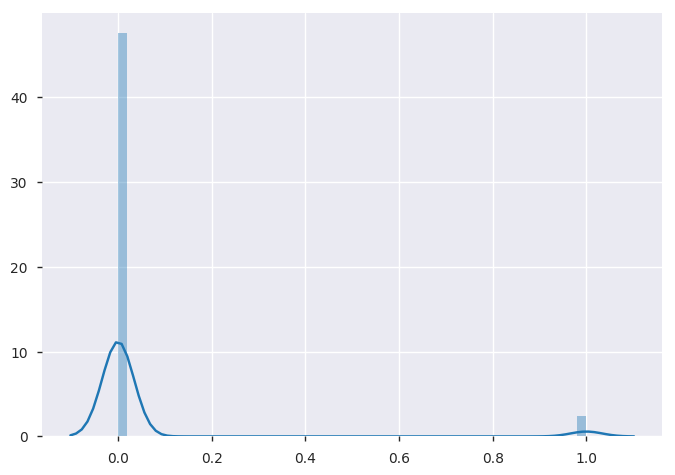

In [857]:
#check scores distribution
sns.distplot(fin_model.predict(train[final_predictors]))

In [859]:
#saving model as pickle file
save_to_pickle(fin_model, 'model_20180417.pkl')

In [862]:
pd.concat([    
    pd.Series(
        fin_model.predict_proba(dataset[final_predictors])[:, 1],
        index = dataset.index,
        name = 'predict_score'
    ),
    dataset[final_predictors]
], axis=1).head()

predict_score  billing address,length  billing address,length digits  \
0       0.328356                       7                              3   
1       0.253589                       5                              5   
2       0.026936                       5                              5   
3       0.412595                       5                              5   
4       0.402028                       4                              4   

   billing first name,length  billing first name,length consonants  \
0                          7                                     4   
1                          8                                     4   
2                          6                                     4   
3                          8                                     4   
4                          4                                     2   

   billing first name,length vowels  billing last name,length  \
0                                 3                         6   
1                                 4                         7   
2                                 2                         7   
3                                 4                         5   
4                                 2                         3   

   billing last name,length consonants  billing last name,length vowels  \
0                                    3                                3   
1                                    4                                3   
2                                    4                                3   
3                                    3                                2   
4                                    1                                2   

   billing zip,length  billing zip,length characters  \
0                   7                              3   
1                   5                              0   
2                   5                              0   
3                   5                              0   
4                   4                              0   

   billing zip,length digits  card last4  email,length  \
0                          3        2695            20   
1                          5        3704            18   
2                          5         776            23   
3                          5        5797            20   
4                          4        7749            19   

   email,length consonants  email,length digits  email,length vowels  \
0                       11                    0                    7   
1                        8                    2                    6   
2                       13                    0                    8   
3                        8                    0                   10   
4                        8                    0                    9   

   expiration month  expiration year  phone,length  \
0                11             2020             9   
1                 4             2018             0   
2                 8             2019             0   
3                 5             2018             8   
4                 3             2018             8   

   transaction timestamp,day of month  transaction timestamp,day of week  \
0                                  15                                  6   
1                                  15                                  6   
2                                  15                                  6   
3                                  15                                  6   
4                                  15                                  6   

   transaction timestamp,hours  transaction timestamp,minutes  \
0                            0                              0   
1                            0                              2   
2                            0                              2   
3                            0                              6   
4                            0                              8  

In [868]:
pd.concat([    
    pd.Series(
        fin_model.predict_proba(dataset[final_predictors])[:, 1],
        index = dataset.index,
        name = 'predict_score'
    ),
    dataset[final_predictors]
], axis=1).to_csv('model_scores_20180417.csv', index=False)